<a href="https://colab.research.google.com/github/tinamilo6/attitudes_HMT_PHI/blob/main/Attitudes_HMT_PHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [552]:
# Numeric analysis
import numpy as np
import pandas as pd

# Save the data in a rich format
import pickle

**LOAD CVS FILE**

**READ DATASET**

In [553]:
# Load the csv file into a dataframe, provide context on true and false values
data = pd.read_csv("attitudes .csv", true_values =["Yes"], false_values=["No"])
data.head()

,Language,Age,Gender \n,Education\n,Country of origin\n,Religion\n,Chronic health conditions\n,Wearable use \n,Active data monitoring,Time looking at data generated\n,...,Unauthorized access concerns,Data use without consent,Data misuse concerns,Biases or inaccuracies concerns,\nDiscrimination concerns,Third party policies concerns\n.,Healthcare stakeholders data sharing \n,Consent\n,Data reliability,Anxiety \n
0,English (United Kingdom)‎,55-64,Female,High school or below,Australia,NaN,No,None of the above,No,No,...,Somewhat concerned,Somewhat concerned,Somewhat concerned,Somewhat concerned,Somewhat concerned,Somewhat concerned,Slightly comfortable,"Opt-in, opt-out at any time",NaN,Maybe
1,English (United Kingdom)‎,35-44,Female,Master’s degree or higher,Pakistan,Islam,No,Wearable fitness tracker or watch,At times,5-6 years,...,Extremely concerned,Extremely concerned,Extremely concerned,Extremely concerned,Extremely concerned,Extremely concerned,Mostly comfortable,"Opt-in, opt-out at any time",Yes,Maybe
2,English (United Kingdom)‎,18-24,Male,Bachelor's degrre,Australia,Non-religious,No,Wearable fitness tracker or watch,Yes,8 years,...,Very concerned,Very concerned,Extremely concerned,Slightly concerned,Slightly concerned,Extremely concerned,Totally comfortable,"Opt-in, opt-out at any time",Yes,Yes
3,English (United Kingdom)‎,55-64,Female,Bachelor's degrre,Australia,Catholic,No,Wearable fitness tracker or watch,Yes,5 years,...,Very concerned,Extremely concerned,Extremely concerned,Extremely concerned,Extremely concerned,Extremely concerned,Mostly comfortable,"Opt-in, opt-out at any time",Maybe,Yes
4,English (United Kingdom)‎,55-64,Female,Master’s degree or higher,England,NaN,No,Wearable fitness tracker or watch,Yes,5 years,...,Very concerned,Extremely concerned,NaN,Extremely concerned,Extremely concerned,Extremely concerned,No comfortable at all,"Opt-in, opt-out at any time",Yes,Yes


# DATA PRE-PROCESSING

TRIM SPACES AND NORMALIZE COLUM NAMES
CHANGE COLUMN NAMES (UPDATE) **bold text**

In [554]:
# Trim whitespace and normalize column names
data.columns = data.columns.str.strip().str.replace('\n', '').str.lower().str.replace(' ', '_')

# Display updated column names
print(data.columns)

Index(['language', 'age', 'gender', 'education', 'country_of_origin',
       'religion', 'chronic_health_conditions', 'wearable_use',
       'active_data_monitoring', 'time_looking_at_data_generated',
       'attitudes_towards_hm_for_health',
       'hm_program_participation_willingness',
       'hm_benefits_on_sudden_health_changes',
       'hm_benefits_on_health_issues_detection',
       'hm_benefits_for_chronic_disease', 'hm_benefits_on_health_habits',
       'hm_benefits_on_health_recommendations', 'data_integration',
       'health_monitoring_perceptions_on__well-being',
       'adoption_hesitation_factors', 'entity_inflence__in_adoption',
       'healthcare_providers_trust', 'government_agencies_trust',
       'technology_companies_trust', 'researchers_trust',
       'insurance_companies trust', 'unauthorized_access_concerns',
       'data_use_without_consent', 'data_misuse_concerns',
       'biases_or_inaccuracies_concerns', 'discrimination_concerns',
       'third_party_policie

**CHECK DATA TYPES**

In [555]:
# Check the datatypes of the loaded data
data.dtypes

,0
language,object
age,object
gender,object
education,object
country_of_origin,object
religion,object
chronic_health_conditions,object
wearable_use,object
active_data_monitoring,object
time_looking_at_data_generated,object


**Explicitly convert the nominal categorical variables, that were objects before**

In [556]:

# Explicitly convert the nominal categorical variables, that were objects before
data['language'] = data['language'].astype("category")
data['gender'] = data['gender'].astype("category")
data['country_of_origin'] = data['country_of_origin'].astype("category")
data['religion'] = data['religion'].astype("category")
data['chronic_health_conditions'] = data['chronic_health_conditions'].astype("category")
data['wearable_use'] = data['wearable_use'].astype("category")
data['data_integration'] = data['data_integration'].astype("category")
#data['Adoption hesitation factors \n'] = data['Adoption hesitation factors \n'].astype("category")
data['consent'] = data['consent'].astype("category")
data['anxiety'] = data['anxiety'].astype("category")

categorical_columns = [
    'language',
    'gender',
    'country_of_origin',
    'religion',
    'chronic_health_conditions',
    'wearable_use',
    'data_integration',
    #'Adoption hesitation factors \n',
    'consent',
    'anxiety'
]

# Convert specified columns to categorical data type
data[categorical_columns] = data[categorical_columns].astype('category')

# Display the data types of the DataFrame to confirm changes
print(data.dtypes)



language                                        category
age                                               object
gender                                          category
education                                         object
country_of_origin                               category
religion                                        category
chronic_health_conditions                       category
wearable_use                                    category
active_data_monitoring                            object
time_looking_at_data_generated                    object
attitudes_towards_hm_for_health                   object
hm_program_participation_willingness              object
hm_benefits_on_sudden_health_changes              object
hm_benefits_on_health_issues_detection            object
hm_benefits_for_chronic_disease                   object
hm_benefits_on_health_habits                      object
hm_benefits_on_health_recommendations             object
data_integration               

**Strip extra spaces and newlines from column names**

**Convert to categorical data type**

In [557]:
import pandas as pd


# Step 1: Strip extra spaces and newlines from column names
#data.columns = data.columns.str.strip()

# Step 2: List of categorical columns (after cleaning names)
categorical_columns = [
    'active_data_monitoring',
    'health_monitoring_perceptions_on__well-being',
    'hm_program_participation_willingness',
    'data_reliability',
]


# Step 4: Convert to categorical
data['active_data_monitoring'] = data['active_data_monitoring'].astype('category')
data['health_monitoring_perceptions_on__well-being'] = data['health_monitoring_perceptions_on__well-being'].astype('category')
data['hm_program_participation_willingness'] = data['hm_program_participation_willingness'].astype('category')
data['data_reliability'] = data['data_reliability'].astype('category')

# Step 5: Print data types to confirm changes
print(data.dtypes)


language                                        category
age                                               object
gender                                          category
education                                         object
country_of_origin                               category
religion                                        category
chronic_health_conditions                       category
wearable_use                                    category
active_data_monitoring                          category
time_looking_at_data_generated                    object
attitudes_towards_hm_for_health                   object
hm_program_participation_willingness            category
hm_benefits_on_sudden_health_changes              object
hm_benefits_on_health_issues_detection            object
hm_benefits_for_chronic_disease                   object
hm_benefits_on_health_habits                      object
hm_benefits_on_health_recommendations             object
data_integration               

**Convert age to ordinal categorical data type**

In [558]:


# Define an ordered categorical type (ordinal)
age_categories = ['18-24', '25-34', '35-44', '45-54', '55-64', '65 or more']
data['age'] = pd.Categorical(data['age'], categories=age_categories, ordered=True)

# Display the updated DataFrame and data types
#print(data)
print(data.dtypes)


language                                        category
age                                             category
gender                                          category
education                                         object
country_of_origin                               category
religion                                        category
chronic_health_conditions                       category
wearable_use                                    category
active_data_monitoring                          category
time_looking_at_data_generated                    object
attitudes_towards_hm_for_health                   object
hm_program_participation_willingness            category
hm_benefits_on_sudden_health_changes              object
hm_benefits_on_health_issues_detection            object
hm_benefits_for_chronic_disease                   object
hm_benefits_on_health_habits                      object
hm_benefits_on_health_recommendations             object
data_integration               

In [559]:
print(data['education'].unique())  # Show unique values

['High school or below' 'Master’s degree or higher' "Bachelor's degrre"
 'Trade training or vocational college'
 "Bachelor's or undergraduate degree"]


**Convert education into ordinal categorical type**

**Define ordered categories**

In [560]:
data['education'] = data['education'].replace("Bachelor's degrre", "bachelor")
data['education'] = data['education'].replace("Bachelor's or undergraduate degree", "bachelor")
data['education'] = data['education'].replace("Master’s degree or higher", "masters")
data['education'] = data['education'].replace("Trade training or vocational college", "vocational")
data['education'] = data['education'].replace("High school or below", "high_school")


# Define ordered categories for education level
education_levels = [
    'high_school',  # Lowest level
    'vocational',
    'bachelor',
    'masters',
]

# Convert 'Education' column to an ordered categorical type (ordinal)
data['education'] = pd.Categorical(data['education'], categories=education_levels, ordered=True)

# Display the updated DataFrame and data types
#print(data)
print(data.dtypes)

language                                        category
age                                             category
gender                                          category
education                                       category
country_of_origin                               category
religion                                        category
chronic_health_conditions                       category
wearable_use                                    category
active_data_monitoring                          category
time_looking_at_data_generated                    object
attitudes_towards_hm_for_health                   object
hm_program_participation_willingness            category
hm_benefits_on_sudden_health_changes              object
hm_benefits_on_health_issues_detection            object
hm_benefits_for_chronic_disease                   object
hm_benefits_on_health_habits                      object
hm_benefits_on_health_recommendations             object
data_integration               

**Check data columns with mixed data types**

In [561]:
# Check if there are different types within a column
for col in data.columns:
    if data[col].apply(type).nunique() > 1:
        print(f"Column '{col}' has mixed types: {data[col].apply(type).unique()}")

Column 'time_looking_at_data_generated' has mixed types: [<class 'str'> <class 'float'>]
Column 'attitudes_towards_hm_for_health' has mixed types: [<class 'str'> <class 'float'>]
Column 'hm_benefits_for_chronic_disease' has mixed types: [<class 'str'> <class 'float'>]
Column 'hm_benefits_on_health_habits' has mixed types: [<class 'str'> <class 'float'>]
Column 'adoption_hesitation_factors' has mixed types: [<class 'str'> <class 'float'>]
Column 'entity_inflence__in_adoption' has mixed types: [<class 'str'> <class 'float'>]
Column 'healthcare_providers_trust' has mixed types: [<class 'str'> <class 'float'>]
Column 'government_agencies_trust' has mixed types: [<class 'str'> <class 'float'>]
Column 'technology_companies_trust' has mixed types: [<class 'str'> <class 'float'>]
Column 'researchers_trust' has mixed types: [<class 'str'> <class 'float'>]
Column 'insurance_companies trust' has mixed types: [<class 'str'> <class 'float'>]
Column 'unauthorized_access_concerns' has mixed types: [<

**Change attitudes column category levels to lower case**

In [562]:
# Ensure the column is of categorical type before accessing .cat
data['attitudes_towards_hm_for_health'] = data['attitudes_towards_hm_for_health'].astype('category')
print(data['attitudes_towards_hm_for_health'].dtype)  # Should now show 'category'
print(data['attitudes_towards_hm_for_health'].cat.categories)  # Check category levels


category
Index(['Approve', 'Disapprove', 'Indifferent ', 'Strongly approve',
       'Strongly disapprove '],
      dtype='object')


In [563]:
data['attitudes_towards_hm_for_health'] = data['attitudes_towards_hm_for_health'].replace("Indifferent ", "indifferent")
data['attitudes_towards_hm_for_health'] = data['attitudes_towards_hm_for_health'].replace("Approve", "approve")
data['attitudes_towards_hm_for_health'] = data['attitudes_towards_hm_for_health'].replace("Strongly approve", "strongly_approve")
data['attitudes_towards_hm_for_health'] = data['attitudes_towards_hm_for_health'].replace("Strongly disapprove ", "strongly_disapprove")
data['attitudes_towards_hm_for_health'] = data['attitudes_towards_hm_for_health'].replace("Disapprove", "disapprove")

<ipython-input-563-852d38849dc9>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['attitudes_towards_hm_for_health'] = data['attitudes_towards_hm_for_health'].replace("Indifferent ", "indifferent")
<ipython-input-563-852d38849dc9>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['attitudes_towards_hm_for_health'] = data['attitudes_towards_hm_for_health'].replace("Approve", "approve")
<ipython-input-563-852d38849dc9>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace w

In [564]:
print(data['attitudes_towards_hm_for_health'].cat.categories)  # Check category levels

Index(['approve', 'disapprove', 'indifferent', 'strongly_approve',
       'strongly_disapprove'],
      dtype='object')


In [565]:
likert_scale = ['strongly_disapprove', 'disapprove', 'indifferent', 'approve', 'strongly_approve']
data['attitudes_towards_hm_for_health'] = pd.Categorical(data['attitudes_towards_hm_for_health'], categories=likert_scale, ordered=True)

In [566]:
data['hm_benefits_for_chronic_disease'] = data['hm_benefits_for_chronic_disease'].astype('category')
data['hm_benefits_on_sudden_health_changes'] = data['hm_benefits_on_sudden_health_changes'].astype('category')
data['hm_benefits_on_health_issues_detection'] = data['hm_benefits_on_health_issues_detection'].astype('category')
data['hm_benefits_on_health_habits'] = data['hm_benefits_on_health_habits'].astype('category')
data['hm_benefits_on_health_recommendations'] = data['hm_benefits_on_health_recommendations'].astype('category')

print(data['hm_benefits_for_chronic_disease'].dtype)  # Should now show 'category'
print(data['hm_benefits_for_chronic_disease'].cat.categories)  # Check category levels

category
Index(['Extremely beneficial ', 'Not beneficial at all', 'Rarely beneficial',
       'Somewhat beneficial', 'Very beneficial'],
      dtype='object')


In [567]:
columns_to_replace = ['hm_benefits_for_chronic_disease', 'hm_benefits_on_sudden_health_changes',
                     'hm_benefits_on_health_issues_detection', 'hm_benefits_on_health_habits',
                     'hm_benefits_on_health_recommendations']

for column in columns_to_replace:
    data[column] = data[column].replace("Extremely beneficial ", "extremely_beneficial")
    data[column] = data[column].replace("Very beneficial", "very_beneficial")
    data[column] = data[column].replace("Somewhat beneficial", "somewhat_beneficial")
    data[column] = data[column].replace("Rarely beneficial", "rarely_beneficial")
    data[column] = data[column].replace("Not beneficial at all", "not_beneficial_at_all")

print(data['hm_benefits_for_chronic_disease'].dtype)  # Should now show 'category'
print(data['hm_benefits_for_chronic_disease'].cat.categories)  # Check category levels

category
Index(['extremely_beneficial', 'not_beneficial_at_all', 'rarely_beneficial',
       'somewhat_beneficial', 'very_beneficial'],
      dtype='object')


<ipython-input-567-f9192693b7b4>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data[column] = data[column].replace("Extremely beneficial ", "extremely_beneficial")
<ipython-input-567-f9192693b7b4>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data[column] = data[column].replace("Very beneficial", "very_beneficial")
<ipython-input-567-f9192693b7b4>:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the cat

# BENEFITS COLUMNS (LIKERT SCALE)

In [568]:
likert_scale = ['not_beneficial','rarely_beneficial','somewhat_beneficial','very_beneficial','extremely_beneficial']
data['hm_benefits_for_chronic_disease'] = pd.Categorical(data['hm_benefits_for_chronic_disease'], categories=likert_scale, ordered=True)
data['hm_benefits_on_sudden_health_changes'] = pd.Categorical(data['hm_benefits_on_sudden_health_changes'], categories=likert_scale, ordered=True)
data['hm_benefits_on_health_issues_detection'] = pd.Categorical(data['hm_benefits_on_health_issues_detection'], categories=likert_scale, ordered=True)
data['hm_benefits_on_health_habits'] = pd.Categorical(data['hm_benefits_on_health_habits'], categories=likert_scale, ordered=True)
data['hm_benefits_on_health_recommendations'] = pd.Categorical(data['hm_benefits_on_health_recommendations'], categories=likert_scale, ordered=True)


In [569]:
data['entity_inflence__in_adoption'] = data['entity_inflence__in_adoption'].astype('category')
print(data['entity_inflence__in_adoption'].dtype)  # Should now show 'category'
print(data['entity_inflence__in_adoption'].cat.categories)  # Check category levels

category
Index(['Extremely influential ', 'Moderately influential',
       'Not at all influential', 'Slightly influential ', 'Very influential '],
      dtype='object')


In [570]:
data['entity_inflence__in_adoption'] = data['entity_inflence__in_adoption'].replace('Extremely influential ', 'extremely_influential')
data['entity_inflence__in_adoption'] = data['entity_inflence__in_adoption'].replace('Very influential ', 'very_influential')
data['entity_inflence__in_adoption'] = data['entity_inflence__in_adoption'].replace('Moderately influential', 'moderately_influential')
data['entity_inflence__in_adoption'] = data['entity_inflence__in_adoption'].replace('Slightly influential ', 'slightly_influential')
data['entity_inflence__in_adoption'] = data['entity_inflence__in_adoption'].replace('Not at all influential', 'not_influential')

print(data['entity_inflence__in_adoption'].dtype)  # Should now show 'category'
print(data['entity_inflence__in_adoption'].cat.categories)  # Check category levels

category
Index(['extremely_influential', 'moderately_influential', 'not_influential',
       'slightly_influential', 'very_influential'],
      dtype='object')


<ipython-input-570-3d03448ad00e>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['entity_inflence__in_adoption'] = data['entity_inflence__in_adoption'].replace('Extremely influential ', 'extremely_influential')
<ipython-input-570-3d03448ad00e>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['entity_inflence__in_adoption'] = data['entity_inflence__in_adoption'].replace('Very influential ', 'very_influential')
<ipython-input-570-3d03448ad00e>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In 

In [571]:
likert_scale = ['not_influential', 'slightly_influential', 'moderately_influential', 'very_influential', 'extremely_influential']
data['entity_inflence__in_adoption'] = pd.Categorical(data['entity_inflence__in_adoption'], categories=likert_scale, ordered=True)


In [572]:
# Correct the column name in the rename operation, replacing the original column name (with the special character)
data.rename(columns={'insurance_companies\xa0trust': 'insurance_companies_trust'}, inplace=True)

In [573]:
data['healthcare_providers_trust']= data['healthcare_providers_trust'].astype('category')
data['government_agencies_trust']= data['government_agencies_trust'].astype('category')
data['technology_companies_trust']= data['technology_companies_trust'].astype('category')
data['researchers_trust']= data['researchers_trust'].astype('category')
data['insurance_companies_trust']= data['insurance_companies_trust'].astype('category')

print(data['healthcare_providers_trust'].dtype)  # Should now show 'category'
print(data['healthcare_providers_trust'].cat.categories)  # Check category levels

category
Index(['Complete trust', 'High trust', 'Low trust ', 'No trust ',
       'Some trust'],
      dtype='object')


In [574]:
columns_to_replace = ['healthcare_providers_trust', 'government_agencies_trust',
                     'technology_companies_trust', 'researchers_trust', 'insurance_companies_trust']

for column in columns_to_replace:
    data[column] = data[column].replace("Complete trust", "complete_trust")
    data[column] = data[column].replace("High trust", "high_trust")
    data[column] = data[column].replace("No trust ", "no_trust")
    data[column] = data[column].replace("Low trust ", "low_trust")
    data[column] = data[column].replace("Some trust", "some_trust")

print(data['healthcare_providers_trust'].dtype)  # Should now show 'category'
print(data['healthcare_providers_trust'].cat.categories)  # Check category levels

<ipython-input-574-6abf1d95d1da>:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data[column] = data[column].replace("Complete trust", "complete_trust")
<ipython-input-574-6abf1d95d1da>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data[column] = data[column].replace("High trust", "high_trust")
<ipython-input-574-6abf1d95d1da>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.re

category
Index(['complete_trust', 'high_trust', 'low_trust', 'no_trust', 'some_trust'], dtype='object')


In [575]:
likert_scale = ['no_trust', 'low_trust', 'some_trust', 'high_trust', 'complete_trust']
data['healthcare_providers_trust'] = pd.Categorical(data['healthcare_providers_trust'], categories=likert_scale, ordered=True)



In [576]:
# Correct the column name in the rename operation, replacing the original column name (with the special character)
data.rename(columns={'third_party_policies_concerns.': 'third_party_policies_concerns'}, inplace=True)

In [577]:
data['unauthorized_access_concerns']= data['unauthorized_access_concerns'].astype('category')
data['data_use_without_consent']= data['data_use_without_consent'].astype('category')
data['data_misuse_concerns']= data['data_misuse_concerns'].astype('category')
data['biases_or_inaccuracies_concerns']= data['biases_or_inaccuracies_concerns'].astype('category')
data['discrimination_concerns']= data['discrimination_concerns'].astype('category')
data['third_party_policies_concerns']= data['third_party_policies_concerns'].astype('category')

print(data['unauthorized_access_concerns'].dtype)  # Should now show 'category'
print(data['unauthorized_access_concerns'].cat.categories)

category
Index(['Extremely concerned', 'Not concerned at all', 'Slightly concerned',
       'Somewhat concerned', 'Very concerned'],
      dtype='object')


In [578]:
columns_to_replace = ['unauthorized_access_concerns', 'data_use_without_consent',
                     'data_misuse_concerns', 'biases_or_inaccuracies_concerns', 'discrimination_concerns', 'third_party_policies_concerns']

for column in columns_to_replace:
    data[column] = data[column].replace("Extremely concerned", "extremely_concerned")
    data[column] = data[column].replace("Very concerned", "very_concerned")
    data[column] = data[column].replace("Somewhat concerned", "somewhat_concerned")
    data[column] = data[column].replace("Slightly concerned", "slightly_concerned")
    data[column] = data[column].replace("Not concerned at all", "not_concerned")

print(data['unauthorized_access_concerns'].dtype)  # Should now show 'category'
print(data['unauthorized_access_concerns'].cat.categories)  # Check category levels

category
Index(['extremely_concerned', 'not_concerned', 'slightly_concerned',
       'somewhat_concerned', 'very_concerned'],
      dtype='object')


<ipython-input-578-58cf5fd1d10c>:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data[column] = data[column].replace("Extremely concerned", "extremely_concerned")
<ipython-input-578-58cf5fd1d10c>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data[column] = data[column].replace("Very concerned", "very_concerned")
<ipython-input-578-58cf5fd1d10c>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categori

In [579]:
likert_scale = ['not_concerned', 'slightly_concerned', 'somewhat_concerned', 'very_concerned', 'extremely_concerned']
data['unauthorized_access_concerns'] = pd.Categorical(data['unauthorized_access_concerns'], categories=likert_scale, ordered=True)


In [580]:
data['healthcare_stakeholders_data_sharing']= data['healthcare_stakeholders_data_sharing'].astype('category')

print(data['healthcare_stakeholders_data_sharing'].dtype)  # Should now show 'category'
print(data['healthcare_stakeholders_data_sharing'].cat.categories)  # Check category levels

category
Index(['Mostly comfortable', 'No comfortable at all', 'Slightly comfortable',
       'Somewhat comfortable', 'Totally comfortable'],
      dtype='object')


In [581]:
columns_to_replace = ['healthcare_stakeholders_data_sharing']

for column in columns_to_replace:
    data[column] = data[column].replace("Totally comfortable", "totally_comfortable")
    data[column] = data[column].replace("Mostly comfortable", "mostly_comfortable")
    data[column] = data[column].replace("Somewhat comfortable", "somewhat_comfortable")
    data[column] = data[column].replace("Slightly comfortable", "slightly_comfortable")
    data[column] = data[column].replace("No comfortable at all", "no_comfortable")

print(data['healthcare_stakeholders_data_sharing'].dtype)  # Should now show 'category'
print(data['healthcare_stakeholders_data_sharing'].cat.categories)  # Check category levels

category
Index(['mostly_comfortable', 'no_comfortable', 'slightly_comfortable',
       'somewhat_comfortable', 'totally_comfortable'],
      dtype='object')


<ipython-input-581-8a560fded36b>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data[column] = data[column].replace("Totally comfortable", "totally_comfortable")
<ipython-input-581-8a560fded36b>:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data[column] = data[column].replace("Mostly comfortable", "mostly_comfortable")
<ipython-input-581-8a560fded36b>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the 

In [582]:
likert_scale = ['no_comfortable', 'slightly_comfortable', 'somewhat_comfortable', 'mostly_comfortable', 'totally_comfortable']
data['healthcare_stakeholders_data_sharing'] = pd.Categorical(data['healthcare_stakeholders_data_sharing'], categories=likert_scale, ordered=True)


**Check data types**

In [583]:
data.head
data.dtypes

,0
language,category
age,category
gender,category
education,category
country_of_origin,category
religion,category
chronic_health_conditions,category
wearable_use,category
active_data_monitoring,category
time_looking_at_data_generated,object


**Check again for columns with mixed data types**

In [584]:
# Check if there are different types within a column
for col in data.columns:
    if data[col].apply(type).nunique() > 1:
        print(f"Column '{col}' has mixed types: {data[col].apply(type).unique()}")

Column 'time_looking_at_data_generated' has mixed types: [<class 'str'> <class 'float'>]
Column 'adoption_hesitation_factors' has mixed types: [<class 'str'> <class 'float'>]


**Conver adoption hesitation factors to categotical data**

In [585]:
#data['time_looking_at_data_generated'] = pd.to_numeric(
    #data['time_looking_at_data_generated'], errors='coerce'
#) # Convert to Numeric Convert everything to numeric values while handling errors

data['adoption_hesitation_factors'] = data['adoption_hesitation_factors'].astype("category") #Convert to Categorical


**Check data types againt**

In [586]:
data.head
data.dtypes

,0
language,category
age,category
gender,category
education,category
country_of_origin,category
religion,category
chronic_health_conditions,category
wearable_use,category
active_data_monitoring,category
time_looking_at_data_generated,object


**Checking for missing values**

In [587]:
# Count missing values per feature
data.isnull().sum()

,0
language,0
age,0
gender,0
education,0
country_of_origin,0
religion,11
chronic_health_conditions,1
wearable_use,1
active_data_monitoring,19
time_looking_at_data_generated,52


In [588]:
data.head()

,language,age,gender,education,country_of_origin,religion,chronic_health_conditions,wearable_use,active_data_monitoring,time_looking_at_data_generated,...,unauthorized_access_concerns,data_use_without_consent,data_misuse_concerns,biases_or_inaccuracies_concerns,discrimination_concerns,third_party_policies_concerns,healthcare_stakeholders_data_sharing,consent,data_reliability,anxiety
0,English (United Kingdom)‎,55-64,Female,high_school,Australia,NaN,No,None of the above,No,No,...,somewhat_concerned,somewhat_concerned,somewhat_concerned,somewhat_concerned,somewhat_concerned,somewhat_concerned,slightly_comfortable,"Opt-in, opt-out at any time",NaN,Maybe
1,English (United Kingdom)‎,35-44,Female,masters,Pakistan,Islam,No,Wearable fitness tracker or watch,At times,5-6 years,...,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,mostly_comfortable,"Opt-in, opt-out at any time",Yes,Maybe
2,English (United Kingdom)‎,18-24,Male,bachelor,Australia,Non-religious,No,Wearable fitness tracker or watch,Yes,8 years,...,very_concerned,very_concerned,extremely_concerned,slightly_concerned,slightly_concerned,extremely_concerned,totally_comfortable,"Opt-in, opt-out at any time",Yes,Yes
3,English (United Kingdom)‎,55-64,Female,bachelor,Australia,Catholic,No,Wearable fitness tracker or watch,Yes,5 years,...,very_concerned,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,mostly_comfortable,"Opt-in, opt-out at any time",Maybe,Yes
4,English (United Kingdom)‎,55-64,Female,masters,England,NaN,No,Wearable fitness tracker or watch,Yes,5 years,...,very_concerned,extremely_concerned,NaN,extremely_concerned,extremely_concerned,extremely_concerned,no_comfortable,"Opt-in, opt-out at any time",Yes,Yes


In [589]:
# Display basic information
print(data.head())  # Show the first few rows
print(data.info())  # Check column types and non-null counts

                    language    age  gender    education country_of_origin  \
0  English (United Kingdom)‎  55-64  Female  high_school        Australia    
1  English (United Kingdom)‎  35-44  Female      masters          Pakistan   
2  English (United Kingdom)‎  18-24    Male     bachelor         Australia   
3  English (United Kingdom)‎  55-64  Female     bachelor         Australia   
4  English (United Kingdom)‎  55-64  Female      masters          England    

        religion chronic_health_conditions  \
0            NaN                       No    
1          Islam                       No    
2  Non-religious                       No    
3      Catholic                        No    
4            NaN                       No    

                         wearable_use active_data_monitoring  \
0                  None of the above                      No   
1  Wearable fitness tracker or watch                At times   
2  Wearable fitness tracker or watch                     Yes  

In [590]:
# List of columns to check for missing values
columns_to_check = [
    'hm_benefits_on_sudden_health_changes',
    'hm_benefits_on_health_issues_detection',
    'hm_benefits_for_chronic_disease',
    'hm_benefits_on_health_habits',
    'hm_benefits_on_health_recommendations'
]

# Count missing values in each column
missing_values = data[columns_to_check].isnull().sum()

# Display the missing values
print(missing_values)


hm_benefits_on_sudden_health_changes      1
hm_benefits_on_health_issues_detection    1
hm_benefits_for_chronic_disease           2
hm_benefits_on_health_habits              2
hm_benefits_on_health_recommendations     1
dtype: int64


**Convert time looking at data generated to categorical data type**

In [591]:
categorical_columns = ['time_looking_at_data_generated']
data[categorical_columns] = data[categorical_columns].astype('category')

In [592]:


print(data.dtypes)

language                                        category
age                                             category
gender                                          category
education                                       category
country_of_origin                               category
religion                                        category
chronic_health_conditions                       category
wearable_use                                    category
active_data_monitoring                          category
time_looking_at_data_generated                  category
attitudes_towards_hm_for_health                 category
hm_program_participation_willingness            category
hm_benefits_on_sudden_health_changes            category
hm_benefits_on_health_issues_detection          category
hm_benefits_for_chronic_disease                 category
hm_benefits_on_health_habits                    category
hm_benefits_on_health_recommendations           category
data_integration               

**Use mode to handle nul values**

**Except religion. Missing values will be change to 'no answer'**

In [593]:

data['active_data_monitoring'].fillna(data['active_data_monitoring'].mode()[0], inplace=True)
#data['religion'].fillna(data['religion'].mode()[0], inplace=True)
# create new category 'no_answer' for 'religion' column
data['religion'] = data['religion'].cat.add_categories('no_answer')
#fill 'religion' missing values with no answer
data['religion'].fillna('no_answer', inplace=True)
data['attitudes_towards_hm_for_health'].fillna(data['attitudes_towards_hm_for_health'].mode()[0], inplace=True)
#data['time_looking_at_data_generated'].fillna(data['time_looking_at_data_generated'].mode()[0], inplace=True)
data['chronic_health_conditions'].fillna(data['chronic_health_conditions'].mode()[0], inplace=True)
data['wearable_use'].fillna(data['wearable_use'].mode()[0], inplace=True)
data['data_integration'].fillna(data['data_integration'].mode()[0], inplace=True)
data['adoption_hesitation_factors'].fillna(data['adoption_hesitation_factors'].mode()[0], inplace=True)
data['consent'].fillna(data['consent'].mode()[0], inplace=True)
data['anxiety'].fillna(data['anxiety'].mode()[0], inplace=True)
data['hm_benefits_for_chronic_disease'].fillna(data['hm_benefits_for_chronic_disease'].mode()[0], inplace=True)
data['hm_benefits_on_sudden_health_changes'].fillna(data['hm_benefits_on_sudden_health_changes'].mode()[0], inplace=True)
data['hm_benefits_on_health_issues_detection'].fillna(data['hm_benefits_on_health_issues_detection'].mode()[0], inplace=True)
data['hm_benefits_on_health_habits'].fillna(data['hm_benefits_on_health_habits'].mode()[0], inplace=True)
data['hm_benefits_on_health_recommendations'].fillna(data['hm_benefits_on_health_recommendations'].mode()[0], inplace=True)
data['entity_inflence__in_adoption'].fillna(data['entity_inflence__in_adoption'].mode()[0], inplace=True)
data['healthcare_providers_trust'].fillna(data['healthcare_providers_trust'].mode()[0], inplace=True)
data['government_agencies_trust'].fillna(data['government_agencies_trust'].mode()[0], inplace=True)
data['technology_companies_trust'].fillna(data['technology_companies_trust'].mode()[0], inplace=True)
data['researchers_trust'].fillna(data['researchers_trust'].mode()[0], inplace=True)
data['insurance_companies_trust'].fillna(data['insurance_companies_trust'].mode()[0], inplace=True)
data['unauthorized_access_concerns'].fillna(data['unauthorized_access_concerns'].mode()[0], inplace=True)
data['data_use_without_consent'].fillna(data['data_use_without_consent'].mode()[0], inplace=True)
data['data_misuse_concerns'].fillna(data['data_misuse_concerns'].mode()[0], inplace=True)
data['biases_or_inaccuracies_concerns'].fillna(data['biases_or_inaccuracies_concerns'].mode()[0], inplace=True)
data['discrimination_concerns'].fillna(data['discrimination_concerns'].mode()[0], inplace=True)
data['third_party_policies_concerns'].fillna(data['third_party_policies_concerns'].mode()[0], inplace=True)
data['healthcare_stakeholders_data_sharing'].fillna(data['healthcare_stakeholders_data_sharing'].mode()[0], inplace=True)
data['data_reliability'].fillna(data['data_reliability'].mode()[0], inplace=True)


<ipython-input-593-d63db1977151>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['active_data_monitoring'].fillna(data['active_data_monitoring'].mode()[0], inplace=True)
<ipython-input-593-d63db1977151>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

# DATA INFO (EACH COLUMN)

**Data info**

**Time looking at data generated left with missing values**

In [594]:
print(data.info())  # Check column types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   language                                      177 non-null    category
 1   age                                           177 non-null    category
 2   gender                                        177 non-null    category
 3   education                                     177 non-null    category
 4   country_of_origin                             177 non-null    category
 5   religion                                      177 non-null    category
 6   chronic_health_conditions                     177 non-null    category
 7   wearable_use                                  177 non-null    category
 8   active_data_monitoring                        177 non-null    category
 9   time_looking_at_data_generated                125 non-

In [595]:
data.head()

,language,age,gender,education,country_of_origin,religion,chronic_health_conditions,wearable_use,active_data_monitoring,time_looking_at_data_generated,...,unauthorized_access_concerns,data_use_without_consent,data_misuse_concerns,biases_or_inaccuracies_concerns,discrimination_concerns,third_party_policies_concerns,healthcare_stakeholders_data_sharing,consent,data_reliability,anxiety
0,English (United Kingdom)‎,55-64,Female,high_school,Australia,no_answer,No,None of the above,No,No,...,somewhat_concerned,somewhat_concerned,somewhat_concerned,somewhat_concerned,somewhat_concerned,somewhat_concerned,slightly_comfortable,"Opt-in, opt-out at any time",Yes,Maybe
1,English (United Kingdom)‎,35-44,Female,masters,Pakistan,Islam,No,Wearable fitness tracker or watch,At times,5-6 years,...,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,mostly_comfortable,"Opt-in, opt-out at any time",Yes,Maybe
2,English (United Kingdom)‎,18-24,Male,bachelor,Australia,Non-religious,No,Wearable fitness tracker or watch,Yes,8 years,...,very_concerned,very_concerned,extremely_concerned,slightly_concerned,slightly_concerned,extremely_concerned,totally_comfortable,"Opt-in, opt-out at any time",Yes,Yes
3,English (United Kingdom)‎,55-64,Female,bachelor,Australia,Catholic,No,Wearable fitness tracker or watch,Yes,5 years,...,very_concerned,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,mostly_comfortable,"Opt-in, opt-out at any time",Maybe,Yes
4,English (United Kingdom)‎,55-64,Female,masters,England,no_answer,No,Wearable fitness tracker or watch,Yes,5 years,...,very_concerned,extremely_concerned,very_concerned,extremely_concerned,extremely_concerned,extremely_concerned,no_comfortable,"Opt-in, opt-out at any time",Yes,Yes


# CLEANED RELIGION CATEGORIES

**Unify common variations for religion**

In [596]:
import pandas as pd

# Example: Assume your DataFrame is called `data` and the religion column is `religion`
# Step 1: Normalize case and whitespace
data['religion_clean'] = data['religion'].str.strip().str.lower()

# Step 2: Define mapping to unify common variations
religion_map = {
    'christian': 'Christian',
    'catholic': 'Catholic',
    'non-religious': 'Non-religious',
    'non religious': 'Non-religious',
    'nonreligious': 'Non-religious',
    'Ickereligiös ': 'Non-religious',
    'not religious': 'Non-religious',
    'Icke Religös': 'Non-religious',
    'non-religous': 'Non-religious',
    'Icke-Religös': 'Non-religious',
    'atheist': 'Non-religious',
    'spiritual': 'Spiritual',
    'muslim': 'Muslim',
    'islam': 'Muslim',
    'buddhist': 'Buddhist',
    'hindu': 'Hindu',
    'orthodox': 'Orthodox',
    'jewish': 'Jewish',
    'rc': 'Catholic',
    'religious': 'Religious',
    # Add more mappings as needed
}

# Step 3: Apply mapping (only map if in dictionary, else title-case fallback)
data['religion_clean'] = data['religion_clean'].map(religion_map).fillna(
    data['religion_clean'].str.title()
)

# Optional: View cleaned unique values
print("\n--- Unique cleaned religion values ---")
print(data['religion_clean'].value_counts(normalize=True).round(4) * 100)



--- Unique cleaned religion values ---
religion_clean
Non-religious                                                                   23.73
Christian                                                                       16.95
Catholic                                                                         9.60
No_Answer                                                                        6.21
Muslim                                                                           4.52
Católica                                                                         2.82
Kristen                                                                          2.26
Christianity                                                                     1.69
Church Of England                                                                1.69
Roman Catholic                                                                   1.69
Buddhist                                                                         1.69

# CLEANED COUNTRY OF ORIGIN

**Unify common variations for country**

In [597]:
import pandas as pd
import unicodedata

# Normalize and lowercase
def normalize_country(name):
    if pd.isna(name):
        return None
    # Strip whitespace, convert to lowercase
    name = str(name).strip().lower()

    # Remove accents
    name = ''.join(c for c in unicodedata.normalize('NFKD', name) if not unicodedata.combining(c))

    # Map known variations to a standard name
    mapping = {
        'usa': 'United States',
        'us': 'United States',
        'united states of america': 'United States',
        'united states': 'United States',
        'united states ': 'United States',
        'united kingdom': 'United Kingdom',
        'uk': 'United Kingdom',
        'england': 'United Kingdom',
        'england ': 'United Kingdom',
        'australia ': 'Australia',
        'sverige': 'Sweden',
        'spanien': 'Spain',
        'espana': 'Spain',
        'espana ': 'Spain',
        'españa': 'Spain',
        'mumbai': 'India',
        'rumanien': 'Romania',
        'turkiye': 'Turkey',
        'venezuela c': 'Venezuela',
        '1963': None,  # Remove or set to "Unknown"
        # Add more mappings as needed
    }

    return mapping.get(name, name.title())  # Fallback: Title-case the normalized name

# Apply to your dataframe
data['country_clean'] = data['country_of_origin'].apply(normalize_country)

# Optional: View cleaned counts
print("\n--- Cleaned Country of Origin ---")
print(data['country_clean'].value_counts(normalize=True).round(4) * 100)



--- Cleaned Country of Origin ---
country_clean
Australia               23.86
Venezuela               14.77
United States           10.80
India                   10.23
Sweden                   6.25
Uganda                   5.11
Spain                    3.98
Germany                  2.84
United Kingdom           2.84
Pakistan                 2.27
Finland                  1.70
Turkey                   1.14
Jordan                   1.14
Norway                   1.14
Iraq                     1.14
Indonesia                1.14
Malaysia                 1.14
Croatia                  0.57
Philippines              0.57
Argentina                0.57
Costa Rica               0.57
France                   0.57
Israel                   0.57
Brazil                   0.57
Colombia                 0.57
Cameroon                 0.57
Jordan...Palestinian     0.57
Iran                     0.57
Cambodia                 0.57
Romania                  0.57
Hong Kong                0.57
Mexico               

In [598]:
data

,language,age,gender,education,country_of_origin,religion,chronic_health_conditions,wearable_use,active_data_monitoring,time_looking_at_data_generated,...,data_misuse_concerns,biases_or_inaccuracies_concerns,discrimination_concerns,third_party_policies_concerns,healthcare_stakeholders_data_sharing,consent,data_reliability,anxiety,religion_clean,country_clean
0,English (United Kingdom)‎,55-64,Female,high_school,Australia,no_answer,No,None of the above,No,No,...,somewhat_concerned,somewhat_concerned,somewhat_concerned,somewhat_concerned,slightly_comfortable,"Opt-in, opt-out at any time",Yes,Maybe,No_Answer,Australia
1,English (United Kingdom)‎,35-44,Female,masters,Pakistan,Islam,No,Wearable fitness tracker or watch,At times,5-6 years,...,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,mostly_comfortable,"Opt-in, opt-out at any time",Yes,Maybe,Muslim,Pakistan
2,English (United Kingdom)‎,18-24,Male,bachelor,Australia,Non-religious,No,Wearable fitness tracker or watch,Yes,8 years,...,extremely_concerned,slightly_concerned,slightly_concerned,extremely_concerned,totally_comfortable,"Opt-in, opt-out at any time",Yes,Yes,Non-religious,Australia
3,English (United Kingdom)‎,55-64,Female,bachelor,Australia,Catholic,No,Wearable fitness tracker or watch,Yes,5 years,...,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,mostly_comfortable,"Opt-in, opt-out at any time",Maybe,Yes,Catholic,Australia
4,English (United Kingdom)‎,55-64,Female,masters,England,no_answer,No,Wearable fitness tracker or watch,Yes,5 years,...,very_concerned,extremely_concerned,extremely_concerned,extremely_concerned,no_comfortable,"Opt-in, opt-out at any time",Yes,Yes,No_Answer,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,English (United Kingdom)‎,25-34,Male,masters,Hong Kong,Non-religious,No,Health-related mobile apps and Medical monitor...,Yes,For 5 years,...,extremely_concerned,extremely_concerned,extremely_concerned,extremely_concerned,mostly_comfortable,"Opt-in, opt-out at any time",Yes,Yes,Non-religious,Hong Kong
173,English (United Kingdom)‎,25-34,Male,masters,Finland,Non-religious,No,Wearable fitness tracker or watch,At times,7 years,...,somewhat_concerned,not_concerned,slightly_concerned,somewhat_concerned,mostly_comfortable,"Opt-in, opt-out at any time",Yes,Yes,Non-religious,Finland
174,"Español (España, alfabetización internacional)",55-64,Female,bachelor,España,Catolica no practicante,Multiple,Wearable fitness tracker or watch,No,NaN,...,somewhat_concerned,very_concerned,somewhat_concerned,extremely_concerned,totally_comfortable,"Opt-in, opt-out at any time",Yes,Maybe,Catolica No Practicante,Spain
175,English (United Kingdom)‎,25-34,Male,masters,Mexico,Catholic,No,Wearable fitness tracker or watch,At times,10 years,...,extremely_concerned,somewhat_concerned,extremely_concerned,extremely_concerned,totally_comfortable,"Opt-in, opt-out at any time",Yes,Yes,Catholic,Mexico


Save the data to a new file
As the preprocessing has been performed, data save to a new file, that can be used for further tasks.

In [599]:
import os
import pickle

# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Save the DataFrame to a Pickle file
with open('data/patient_data.pkl', 'wb') as f:
    pickle.dump(data, f)

# Confirmation message
print("DataFrame has been saved to 'data/patient_data.pkl'")

DataFrame has been saved to 'data/patient_data.pkl'


**DESCRIPTIVE ANALYTICS (EDA)**

**Data describe**

In [600]:
# Perform full descriptive analysis of the dataset
#print(data.info())
data.describe(include='all')

,language,age,gender,education,country_of_origin,religion,chronic_health_conditions,wearable_use,active_data_monitoring,time_looking_at_data_generated,...,data_misuse_concerns,biases_or_inaccuracies_concerns,discrimination_concerns,third_party_policies_concerns,healthcare_stakeholders_data_sharing,consent,data_reliability,anxiety,religion_clean,country_clean
count,177,177,177,177,177,177,177,177,177,125,...,177,177,177,177,177,177,177,177,177,176
unique,3,6,2,4,60,72,3,16,3,89,...,5,5,5,5,5,4,3,3,50,32
top,English (United Kingdom)‎,25-34,Female,bachelor,Australia,Christian,No,Wearable fitness tracker or watch,Yes,3 years,...,very_concerned,somewhat_concerned,somewhat_concerned,very_concerned,somewhat_comfortable,"Opt-in, opt-out at any time",Yes,Maybe,Non-religious,Australia
freq,144,37,106,76,24,16,133,108,88,8,...,57,63,48,57,52,149,105,82,42,42


# MOST COMMON CATEGORY IN EACH COLUMN

**Mos common category in each column**

In [601]:
# Mode for each categorical column
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"Most common category in '{col}': {data[col].mode().values[0]}")


Most common category in 'language': English (United Kingdom)‎
Most common category in 'age': 25-34
Most common category in 'gender': Female
Most common category in 'education': bachelor
Most common category in 'country_of_origin': Australia
Most common category in 'religion': Christian 
Most common category in 'chronic_health_conditions': No 
Most common category in 'wearable_use': Wearable fitness tracker or watch 
Most common category in 'active_data_monitoring': Yes
Most common category in 'time_looking_at_data_generated': 3 years
Most common category in 'attitudes_towards_hm_for_health': approve
Most common category in 'hm_program_participation_willingness': Yes
Most common category in 'hm_benefits_on_sudden_health_changes': very_beneficial
Most common category in 'hm_benefits_on_health_issues_detection': very_beneficial
Most common category in 'hm_benefits_for_chronic_disease': very_beneficial
Most common category in 'hm_benefits_on_health_habits': very_beneficial
Most common cate

**Calculate Entropy**

In [602]:
from scipy.stats import entropy

for col in categorical_columns:
    counts = data[col].value_counts(normalize=True)
    ent = entropy(counts)
    print(f"Entropy of '{col}': {ent:.4f}")


Entropy of 'language': 0.5997
Entropy of 'age': 1.7490
Entropy of 'gender': 0.6735
Entropy of 'education': 1.1795
Entropy of 'country_of_origin': 3.4501
Entropy of 'religion': 3.7216
Entropy of 'chronic_health_conditions': 0.7290
Entropy of 'wearable_use': 1.5533
Entropy of 'active_data_monitoring': 1.0401
Entropy of 'time_looking_at_data_generated': 4.2522
Entropy of 'attitudes_towards_hm_for_health': 1.2089
Entropy of 'hm_program_participation_willingness': 0.8981
Entropy of 'hm_benefits_on_sudden_health_changes': 1.0986
Entropy of 'hm_benefits_on_health_issues_detection': 1.0725
Entropy of 'hm_benefits_for_chronic_disease': 1.0448
Entropy of 'hm_benefits_on_health_habits': 1.1283
Entropy of 'hm_benefits_on_health_recommendations': 1.1767
Entropy of 'data_integration': 0.8586
Entropy of 'health_monitoring_perceptions_on__well-being': 0.7431
Entropy of 'adoption_hesitation_factors': 4.4978
Entropy of 'entity_inflence__in_adoption': 1.4450
Entropy of 'healthcare_providers_trust': 1.391

# DISTRIBUTION AND PLOTTING OF MULTIPLE CHOICE QUESTIONS

**Distributions (counts) in columns**

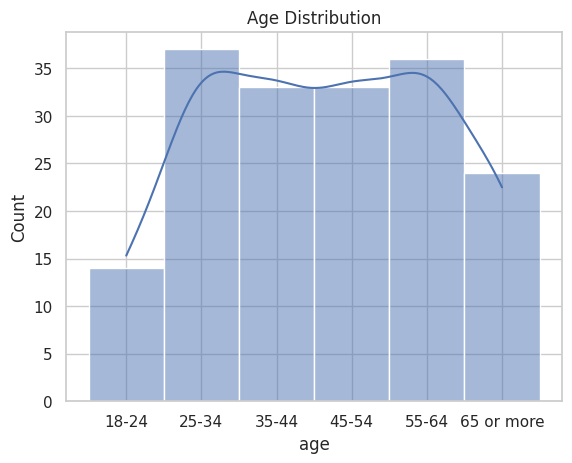

<ipython-input-603-9a7c5ff44360>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=data, palette="copper")


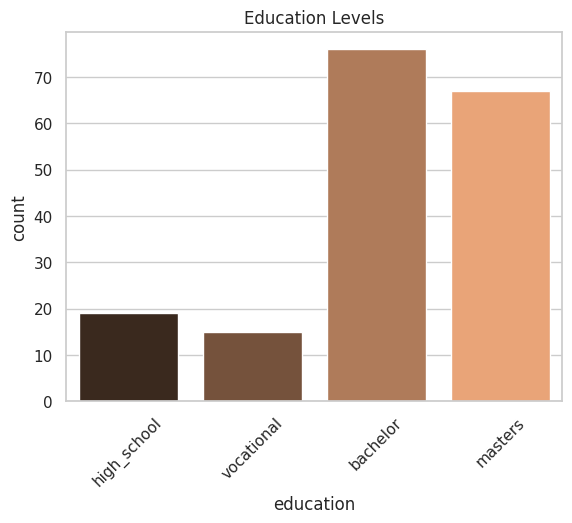

<ipython-input-603-9a7c5ff44360>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='chronic_health_conditions', data=data, palette="copper")


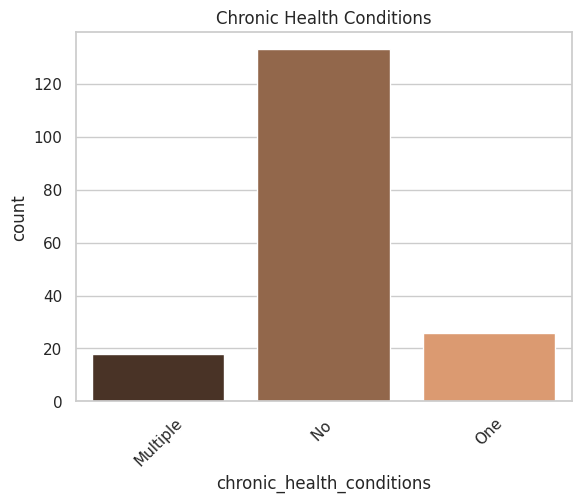

<ipython-input-603-9a7c5ff44360>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hm_program_participation_willingness', data=data, palette="copper")


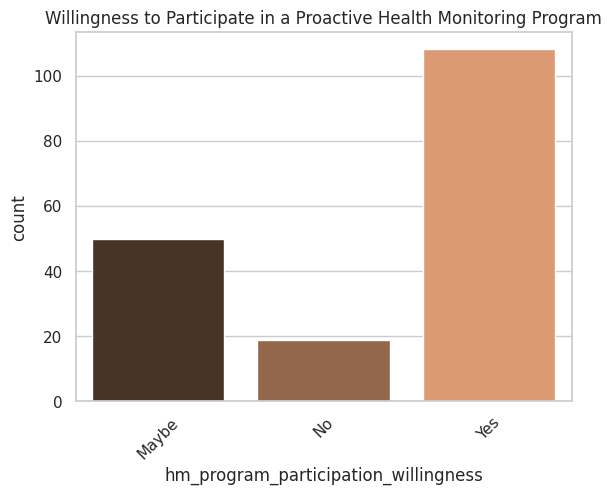

<ipython-input-603-9a7c5ff44360>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='data_integration', data=data, palette=brown_shades)


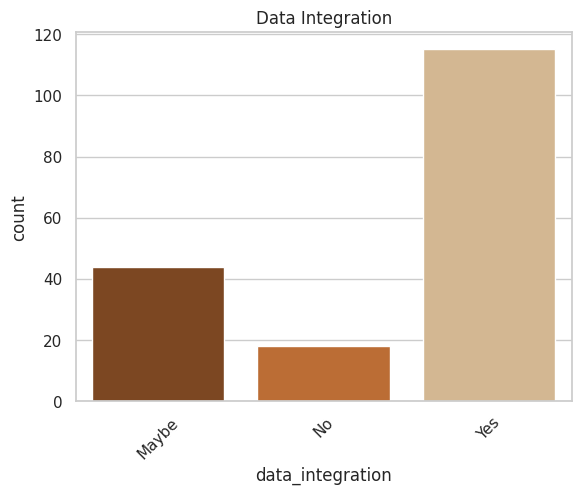

<ipython-input-603-9a7c5ff44360>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='health_monitoring_perceptions_on__well-being', data=data, palette="Oranges")


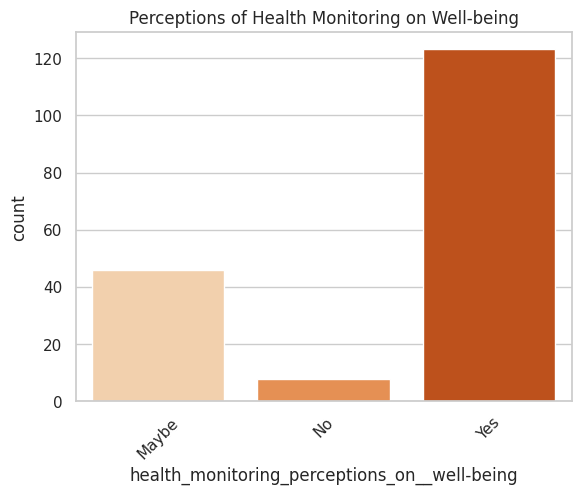

<ipython-input-603-9a7c5ff44360>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='active_data_monitoring', data=data, palette="Oranges")


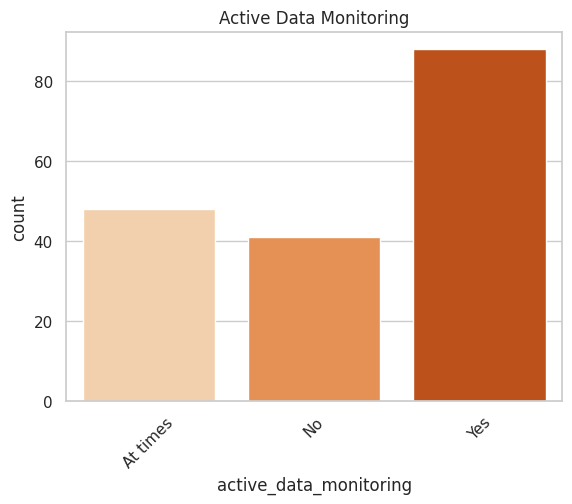

<ipython-input-603-9a7c5ff44360>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='consent', data=data, palette="Oranges")


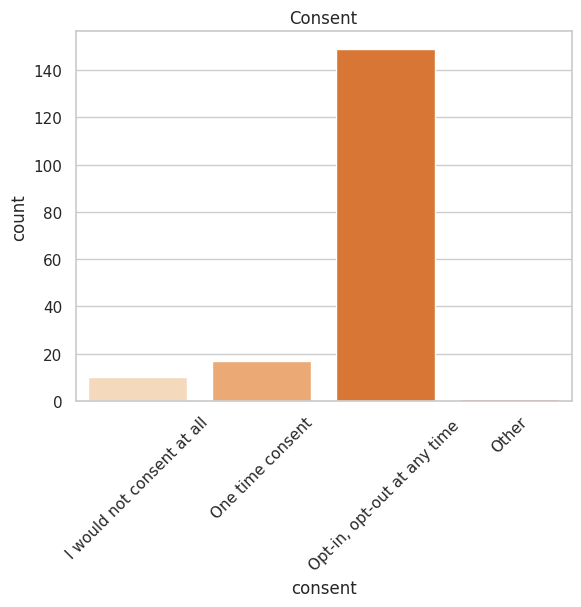

<ipython-input-603-9a7c5ff44360>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='anxiety', data=data, palette="Oranges")


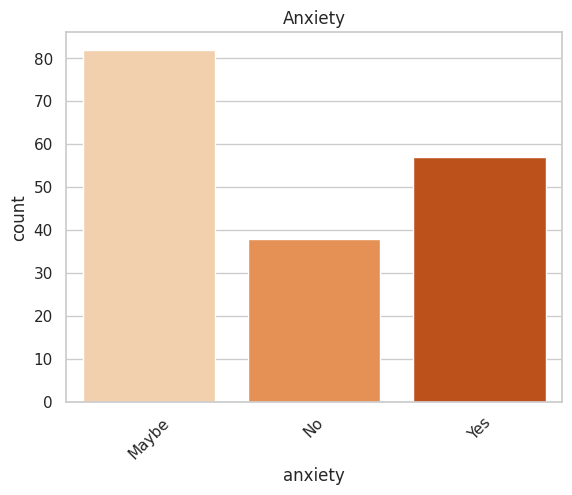

<ipython-input-603-9a7c5ff44360>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='data_reliability', data=data, palette="copper")


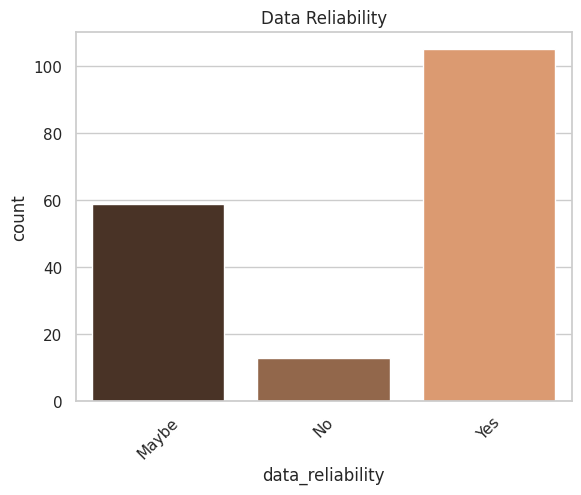

In [603]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
sns.histplot(data['age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

# Countplot for Categorical Data
sns.countplot(x='education', data=data, palette="copper")
plt.xticks(rotation=45)
plt.title("Education Levels")
plt.show()

# Countplot for Categorical Data
sns.countplot(x='chronic_health_conditions', data=data, palette="copper")
plt.xticks(rotation=45)
plt.title("Chronic Health Conditions")
plt.show()

sns.countplot(x='hm_program_participation_willingness', data=data, palette="copper")
plt.xticks(rotation=45)
plt.title("Willingness to Participate in a Proactive Health Monitoring Program")
plt.show()

#sns.countplot(x='data_integration', data=data, palette="viridis")  # Other options: "coolwarm", "Set2", "pastel"
#plt.xticks(rotation=45)
#plt.title("Data Integration")
#plt.show()



# Define custom brown shades
brown_shades = ["#8B4513",  "#D2691E", "#DEB887"]
# Dark brown → SaddleBrown, Sienna, Chocolate, Peru, BurlyWood

# Create the countplot with brown shades
sns.countplot(x='data_integration', data=data, palette=brown_shades)

plt.xticks(rotation=45)
plt.title("Data Integration")
plt.show()

sns.countplot(x='health_monitoring_perceptions_on__well-being', data=data, palette="Oranges")
plt.xticks(rotation=45)
plt.title("Perceptions of Health Monitoring on Well-being")
plt.show()

sns.countplot(x='active_data_monitoring', data=data, palette="Oranges")
plt.xticks(rotation=45)
plt.title("Active Data Monitoring")
plt.show()

sns.countplot(x='consent', data=data, palette="Oranges")
plt.xticks(rotation=45)
plt.title("Consent")
plt.show()

sns.countplot(x='anxiety', data=data, palette="Oranges")
plt.xticks(rotation=45)
plt.title("Anxiety")
plt.show()


#sns.countplot(x='wearable_use', data=data, palette="copper")
#plt.xticks(rotation=45)
#plt.title("Wearable Use")
#plt.show()

sns.countplot(x='data_reliability', data=data, palette="copper")
plt.xticks(rotation=45)
plt.title("Data Reliability")
plt.show()



# GENDER DISTRIBUTION

**Gender distribution**

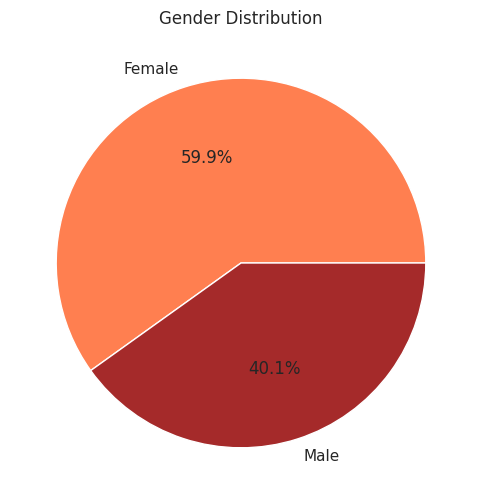

In [604]:
gender_counts = data['gender'].value_counts()

# Define colors (Brown instead of light blue)
colors = ['coral', 'brown', 'gold']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)

# Add title
plt.title('Gender Distribution')

# Show plot
plt.show()

# LIKERT QUESTION PLOTTING BENEFITS ONLY

**Plotting for likert scale question about benefits**

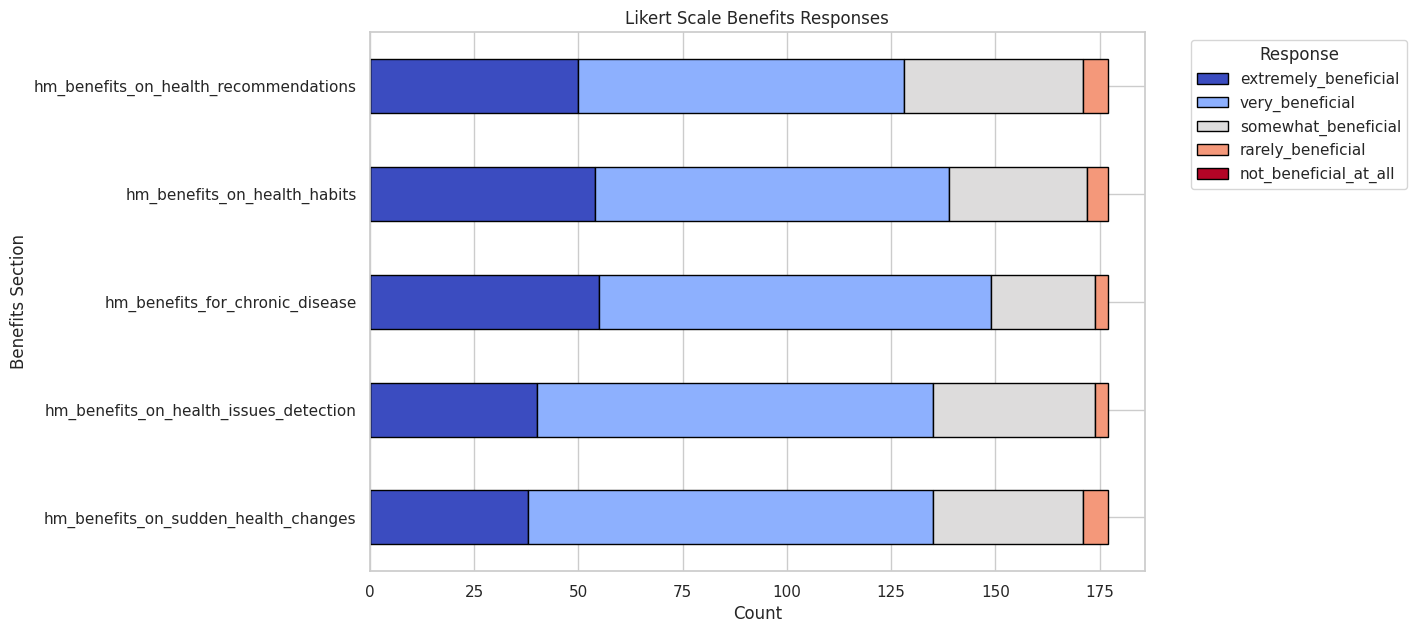

In [605]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the Likert scale responses in order
likert_scale = ['extremely_beneficial', 'very_beneficial', 'somewhat_beneficial', 'rarely_beneficial', 'not_beneficial_at_all']

# List of Likert-type survey questions (adjust based on your data)
likert_columns = [
    'hm_benefits_on_sudden_health_changes',
    'hm_benefits_on_health_issues_detection',
    'hm_benefits_for_chronic_disease',
    'hm_benefits_on_health_habits',
    'hm_benefits_on_health_recommendations'
]

# Ensure responses have no extra spaces
#data[likert_columns] = data[likert_columns].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Count occurrences for each Likert category per question
likert_counts = pd.DataFrame({col: data[col].value_counts() for col in likert_columns})

# Reindex to match Likert scale order (ensuring all categories appear)
likert_counts = likert_counts.reindex(likert_scale, fill_value=0)

# Transpose so questions are on the Y-axis
likert_counts = likert_counts.T

# Plot horizontal stacked bar chart
ax = likert_counts.plot(kind='barh', stacked=True, figsize=(10, 7), colormap='coolwarm', edgecolor='black')

# Add labels and title
plt.title('Likert Scale Benefits Responses')
plt.ylabel('Benefits Section')  # Y-axis represents questions
plt.xlabel('Count')  # X-axis represents response count
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()



# LIKERT STYLE QUESTIONS PLOTTING

**Plotting for all Likert questions combined**

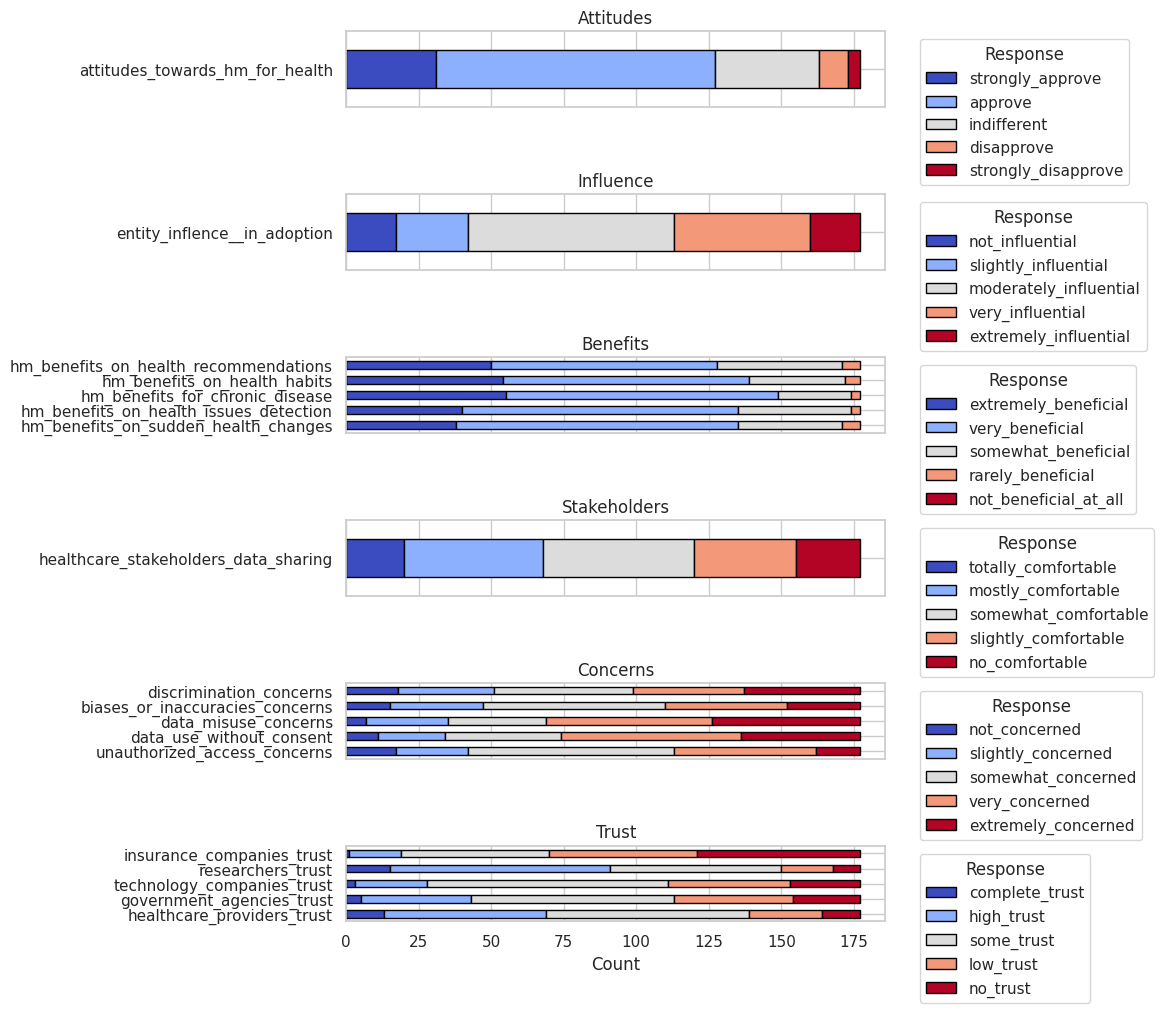

In [606]:
import pandas as pd
import matplotlib.pyplot as plt

# Define Likert scales (you can customize this per question group if needed)
likert_scales = {
    'attitudes_towards_hm_for_health': ['strongly_approve','approve','indifferent','disapprove','strongly_disapprove'],
    'entity_inflence__in_adoption': ['not_influential', 'slightly_influential', 'moderately_influential', 'very_influential', 'extremely_influential'],
    'healthcare_providers_trust': ['complete_trust', 'high_trust', 'some_trust', 'low_trust', 'no_trust'],
    'government_agencies_trust': ['complete_trust', 'high_trust', 'some_trust', 'low_trust', 'no_trust'],
    'technology_companies_trust': ['complete_trust', 'high_trust', 'some_trust', 'low_trust', 'no_trust'],
    'researchers_trust': ['complete_trust', 'high_trust', 'some_trust', 'low_trust', 'no_trust'],
    'insurance_companies_trust': ['complete_trust', 'high_trust', 'some_trust', 'low_trust', 'no_trust'],
    'benefits': ['extremely_beneficial', 'very_beneficial', 'somewhat_beneficial', 'rarely_beneficial', 'not_beneficial_at_all'],
    'concerns': ['not_concerned', 'slightly_concerned', 'somewhat_concerned', 'very_concerned', 'extremely_concerned'],
    'healthcare_stakeholders_data_sharing': ['totally_comfortable', 'mostly_comfortable', 'somewhat_comfortable', 'slightly_comfortable', 'no_comfortable'],

}
#'mostly_comfortable', 'no_comfortable', 'slightly_comfortable','somewhat_comfortable', 'totally_comfortable']

# Define different groups of Likert-type questions
likert_groups = {
    'Attitudes': [
        'attitudes_towards_hm_for_health'
    ],
    'Influence': [
        'entity_inflence__in_adoption'
    ],
    'Benefits': [
        'hm_benefits_on_sudden_health_changes',
        'hm_benefits_on_health_issues_detection',
        'hm_benefits_for_chronic_disease',
        'hm_benefits_on_health_habits',
        'hm_benefits_on_health_recommendations'
    ],
    'Stakeholders': [
        'healthcare_stakeholders_data_sharing'
    ],
    'Concerns': [
        'unauthorized_access_concerns',
        'data_use_without_consent',
        'data_misuse_concerns',
        'biases_or_inaccuracies_concerns',
        'discrimination_concerns'
    ],
    'Trust': [
        'healthcare_providers_trust',
        'government_agencies_trust',
        'technology_companies_trust',
        'researchers_trust',
        'insurance_companies_trust'
    ]
}

# Create subplots to compare different scales
fig, axes = plt.subplots(nrows=len(likert_groups), figsize=(12, 10), sharex=True)

# Loop through each Likert scale group and create a stacked bar chart
for ax, (group_name, columns) in zip(axes, likert_groups.items()):
    # Select corresponding scale based on group name
    if group_name == 'Influence':
        likert_scale = likert_scales['entity_inflence__in_adoption']
    elif group_name == 'Benefits':
        likert_scale = likert_scales['benefits']
    elif group_name == 'Concerns':
        likert_scale = likert_scales['concerns']
    elif group_name == 'Trust':
        likert_scale = likert_scales['healthcare_providers_trust']  # Using healthcare_providers_trust as an example for Trust group
    elif group_name == 'Attitudes':
        likert_scale = likert_scales ['attitudes_towards_hm_for_health']
    elif group_name == 'Stakeholders':
        likert_scale = likert_scales['healthcare_stakeholders_data_sharing']


    # Ensure responses have no extra spaces
    data[columns] = data[columns].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # Count occurrences for each Likert category per question
    likert_counts = pd.DataFrame({col: data[col].value_counts() for col in columns})

    # Reindex to match Likert scale order (ensuring all categories appear)
    likert_counts = likert_counts.reindex(likert_scale, fill_value=0).T  # Transpose for plotting

    # Plot horizontal stacked bar chart for each Likert group
    likert_counts.plot(kind='barh', stacked=True, ax=ax, colormap='coolwarm', edgecolor='black')

    # Titles and labels
    ax.set_title(f'{group_name}')
    #ax.set_ylabel('Survey Questions')
    ax.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.xlabel('Count')
plt.tight_layout()
plt.show()


In [607]:
import matplotlib.pyplot as plt
from google.colab import files

# Example graph
#plt.figure(figsize=(6,4))
#sns.histplot(data['age'], bins=10, kde=True)
#plt.title("Age")

# Save the figure
#filename = "age.png"
#plt.savefig(filename, dpi=300)  # Save in high resolution
#plt.close()  # Close the plot to prevent overlap

#files.download(filename)

In [608]:
# Example graph
#plt.figure(figsize=(6,4))
#ax = likert_counts.plot(kind='barh', stacked=True, figsize=(32,12), colormap='coolwarm', edgecolor='black')
#plt.title("Likert Scale Items")

# Save the figure
#filename = "likert.png"
#plt.savefig(filename, dpi=300)  # Save in high resolution
#plt.close()  # Close the plot to prevent overlap

#files.download(filename)

**Check category levels for wearable use**

In [609]:
print(data['wearable_use'].dtype)  # Should now show 'category'
print(data['wearable_use'].cat.categories)  # Check category levels

category
Index(['Any other personal health monitoring device ',
       'Any other personal health monitoring device and Health-related mobile apps ',
       'Health-related mobile apps', 'Health-related mobile apps ',
       'Health-related mobile apps and Medical monitor devices ',
       'Health-related mobile apps and Wearable fitness tracker or watch ',
       'Medical monitor devices',
       'Medical monitor devices and Any other personal health monitoring device ',
       'Medical monitor devices and Health-related mobile apps',
       'Medical monitor devices and Health-related mobile apps ',
       'None of the above', 'None of the above ',
       'Wearable fitness tracker and watch and Health-related mobile apps',
       'Wearable fitness tracker or watch',
       'Wearable fitness tracker or watch ',
       'Wearable fitness tracker or watch '],
      dtype='object')


# WEARABLES CATEGORIES COUNTS

**Counts for each category in wearables**

In [610]:
#import pandas as pd

# Load dataset
#file_path = "/mnt/data/attitudes .csv"  # Ensure correct file path
#data = pd.read_csv(file_path)

# Define the column containing responses
column_name = 'wearable_use'  # Update if needed

# Define the categories to count
categories = [
    "Any other personal health monitoring device",
    "Health-related mobile apps",
    "Medical monitor devices",
    "Wearable fitness tracker or watch",
    "None of the above"
]

# Ensure column is treated as string and fill NaNs
data[column_name] = data[column_name].astype(str).fillna('')

# Standardize separators (normalize both `,` and `and` to a single comma)
data[column_name] = data[column_name].str.replace(r'\s*(,|and)\s*', ',', regex=True)

# Split responses into a list per row and explode
exploded = data[column_name].str.split(',').explode().str.strip()

# Count occurrences of each category and print results
response_counts = exploded.value_counts().reindex(categories, fill_value=0)

# Print the counts for each category
print(response_counts.to_string())


wearable_use
Any other personal health monitoring device      4
Health-related mobile apps                      24
Medical monitor devices                         13
Wearable fitness tracker or watch              119
None of the above                               29


# WEARABLES DISTRIBUTION PLOTTING

**Plotting for wearables**

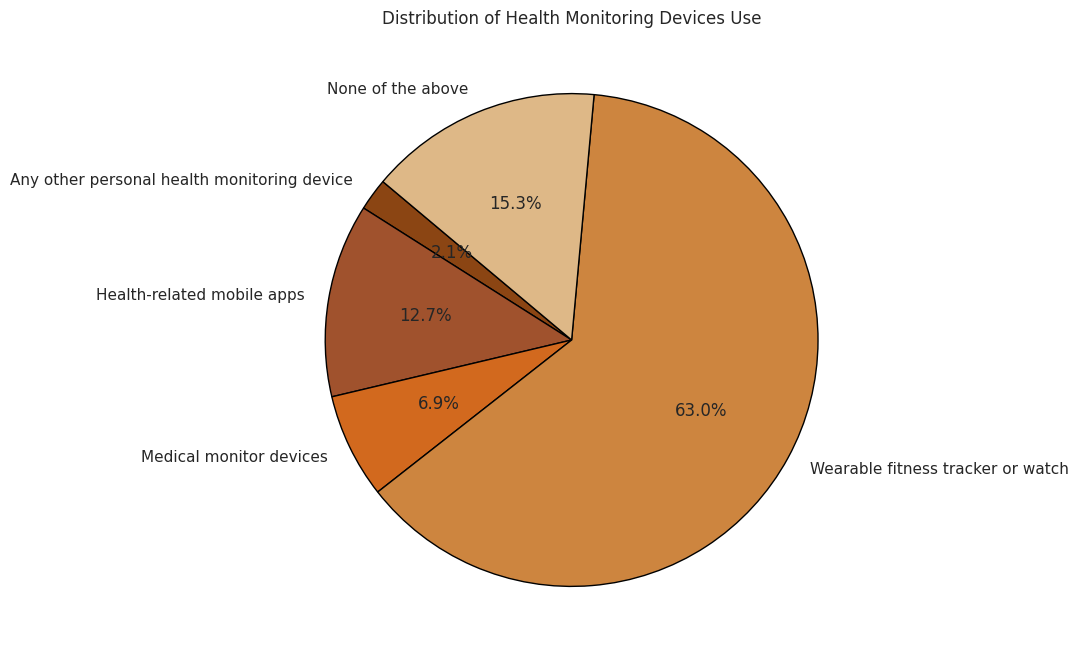

In [611]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = ['#8B4513', '#A0522D', '#D2691E', '#CD853F', '#DEB887']  # Shades of brown
plt.pie(
    response_counts,
    labels=response_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribution of Health Monitoring Devices Use")
plt.show()



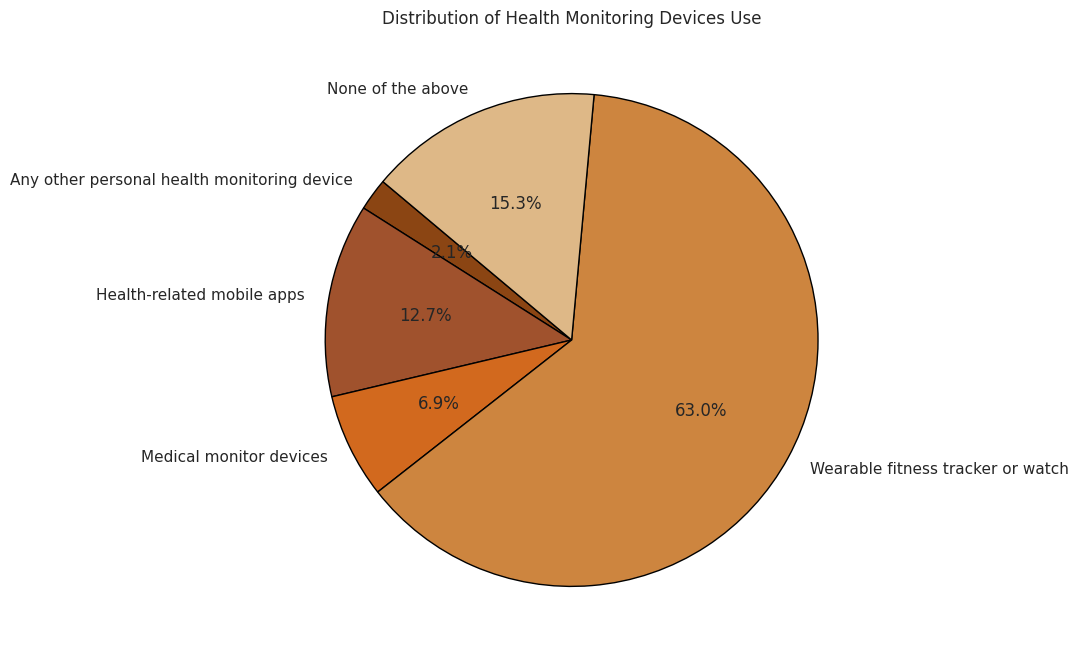

In [612]:
# Example graph
plt.figure(figsize=(8, 8))
plt.pie(
    response_counts,
    labels=response_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Distribution of Health Monitoring Devices Use")

# Save the figure
filename = "wearables.png"
#plt.savefig(filename, dpi=300)  # Save in high resolution
#plt.close()  # Close the plot to prevent overlap

#files.download(filename)

# Counts for wearables types

**Counts for wearables types**

In [613]:


# Define the column name
column_name = 'wearable_use'  # Update if needed

# Ensure the column is treated as a string and fill NaNs
data[column_name] = data[column_name].astype(str).fillna('')

# Standardize separators: Normalize both `,` and `and` to a single comma
data[column_name] = data[column_name].str.replace(r'\s*(,|and)\s*', ',', regex=True)

# Remove extra spaces
data[column_name] = data[column_name].str.strip()

# Ensure consistent capitalization
data[column_name] = data[column_name].str.lower()

# Count occurrences of each unique combination
combination_counts = data[column_name].value_counts()

# Print the counts
print(combination_counts.to_string())


wearable_use
wearable fitness tracker or watch                                         117
none of the above                                                          29
health-related mobile apps                                                 12
medical monitor devices,health-related mobile apps                          6
medical monitor devices                                                     4
any other personal health monitoring device                                 2
health-related mobile apps,wearable fitness tracker or watch                2
health-related mobile apps,medical monitor devices                          2
wearable fitness tracker,watch,health-related mobile apps                   1
medical monitor devices,any other personal health monitoring device         1
any other personal health monitoring device,health-related mobile apps      1


# -WEARABLE USE VS CHRONIC HEALTH CONDITIONS

In [614]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Simulated frequency data as shared earlier
data_counts = {
    'Multiple': {
        'any other personal health monitoring device': 0.050000,
        'health-related mobile apps': 0.150000,
        'medical monitor devices': 0.100000,
        'none of the above': 0.100000,
        'watch': 0.000000,
        'wearable fitness tracker': 0.000000,
        'wearable fitness tracker or watch': 0.60000
    },
    'No': {
        'any other personal health monitoring device': 0.013889,
        'health-related mobile apps': 0.118056,
        'medical monitor devices': 0.055556,
        'none of the above': 0.173611,
        'watch': 0.006944,
        'wearable fitness tracker': 0.006944,
        'wearable fitness tracker or watch': 0.62500
    },
    'One': {
        'any other personal health monitoring device': 0.037037,
        'health-related mobile apps': 0.148148,
        'medical monitor devices': 0.111111,
        'none of the above': 0.074074,
        'watch': 0.000000,
        'wearable fitness tracker': 0.000000,
        'wearable fitness tracker or watch': 0.62963
    }
}

# Assume total sample sizes for illustrative purposes (can be replaced with real values)
sample_sizes = {'Multiple': 20, 'No': 72, 'One': 27}

# Compute proportions and 95% CIs
report_data = []
z = norm.ppf(0.975)  # 95% CI

for group, proportions in data_counts.items():
    n = sample_sizes[group]
    for device, prop in proportions.items():
        p = prop
        se = np.sqrt((p * (1 - p)) / n)
        ci_low = max(0, p - z * se)
        ci_high = min(1, p + z * se)
        report_data.append({
            'Group': group,
            'Device': device,
            'Proportion (%)': round(p * 100, 2),
            '95% CI': f"[{round(ci_low * 100, 2)}%, {round(ci_high * 100, 2)}%]"
        })

df_report = pd.DataFrame(report_data)
df_report.sort_values(by=['Group', 'Device'], inplace=True)
df_report


,Group,Device,Proportion (%),95% CI
0,Multiple,any other personal health monitoring device,5.00,"[0%, 14.55%]"
1,Multiple,health-related mobile apps,15.00,"[0%, 30.65%]"
2,Multiple,medical monitor devices,10.00,"[0%, 23.15%]"
3,Multiple,none of the above,10.00,"[0%, 23.15%]"
4,Multiple,watch,0.00,"[0%, 0.0%]"
5,Multiple,wearable fitness tracker,0.00,"[0%, 0.0%]"
6,Multiple,wearable fitness tracker or watch,60.00,"[38.53%, 81.47%]"
7,No,any other personal health monitoring device,1.39,"[0%, 4.09%]"
8,No,health-related mobile apps,11.81,"[4.35%, 19.26%]"
9,No,medical monitor devices,5.56,"[0.26%, 10.85%]"


In [615]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Corrected data with proportions
#data = pd.DataFrame({
    #"any other personal health monitoring device": [0.050000, 0.013889, 0.037037],
    #"health-related mobile apps": [0.150000, 0.118056, 0.148148],
    #"medical monitor devices": [0.100000, 0.055556, 0.111111],
    #"none of the above": [0.100000, 0.173611, 0.074074],
    #"watch": [0.000000, 0.006944, 0.000000],
    #"wearable fitness tracker": [0.000000, 0.006944, 0.000000],
    #"wearable fitness tracker or watch": [0.600000, 0.625000, 0.629630],
#}, index=["Multiple", "No", "One"])

# Merge wearable categories
#data["wearable device"] = data[["watch", "wearable fitness tracker", "wearable fitness tracker or watch"]].sum(axis=1)

# Select relevant columns for APA-style reporting
#columns_to_report = [
    #"any other personal health monitoring device",
    #"health-related mobile apps",
    #"medical monitor devices",
    #"none of the above",
    #"wearable device"
#]

# Calculate 95% confidence intervals
#z = norm.ppf(0.975)  # 1.96
#n_per_group = 120  # Assumed sample size per group; can be adjusted
#results = {}

#for condition in data.index:
    #results[condition] = {}
    #for col in columns_to_report:
        #p = data.loc[condition, col]
        #n = n_per_group
        #se = np.sqrt(p * (1 - p) / n)
        #ci_low = max(0, p - z * se)
        #ci_high = min(1, p + z * se)
        ##esults[condition][col] = f"{p * 100:.1f}% [{ci_low * 100:.1f}, {ci_high * 100:.1f}]"

# Convert results to DataFrame for display
#apa_style_df = pd.DataFrame(results).T
#apa_style_df.index.name = "chronic_health_conditions"
#apa_style_df.reset_index(inplace=True)
#apa_style_df


In [616]:
import scipy.stats as stats
import pandas as pd

# Load the original data again
#with open('data/patient_data.pkl', 'rb') as f:
    #original_data = pickle.load(f)

# Example: testing association between "used health-related mobile apps" and chronic health conditions
# Create binary column
#original_data['used_mobile_app'] = original_data['wearable_use'].str.contains('health-related mobile apps', case=False, na=False)

# Cross-tabulation
#contingency = pd.crosstab(original_data['chronic_health_conditions'], original_data['used_mobile_app'])

# Chi-square test
#chi2, p, dof, expected = stats.chi2_contingency(contingency)

#print(f"Chi-square: {chi2:.4f}, p-value: {p:.4f}")

In [617]:
import numpy as np

# Compute Cramér's V
#n = contingency.sum().sum()
#cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

#print(f"Cramér's V: {cramers_v:.4f}")


In [618]:
import scipy.stats as stats
import pandas as pd

# Load the original data again
#with open('data/patient_data.pkl', 'rb') as f:
    #original_data = pickle.load(f)

# Example: testing association between "used health-related mobile apps" and chronic health conditions
# Create binary column
#original_data['used_other_personal_device'] = original_data['wearable_use'].str.contains('any other personal health monitoring device', case=False, na=False)

# Cross-tabulation
#contingency = pd.crosstab(original_data['chronic_health_conditions'], original_data['used_other_personal_device'])

# Chi-square test
#chi2, p, dof, expected = stats.chi2_contingency(contingency)

#print(f"Chi-square: {chi2:.4f}, p-value: {p:.4f}")

In [619]:
import numpy as np

# Compute Cramér's V
#n = contingency.sum().sum()
#cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

#print(f"Cramér's V: {cramers_v:.4f}")


In [620]:
import scipy.stats as stats
import pandas as pd

# Load the original data again
#with open('data/patient_data.pkl', 'rb') as f:
    #original_data = pickle.load(f)

# Example: testing association between "used health-related mobile apps" and chronic health conditions
# Create binary column
#original_data['used_medical_monitors'] = original_data['wearable_use'].str.contains('medical monitor devices', case=False, na=False)

# Cross-tabulation
#contingency = pd.crosstab(original_data['chronic_health_conditions'], original_data['used_medical_monitors'])

# Chi-square test
#chi2, p, dof, expected = stats.chi2_contingency(contingency)

#print(f"Chi-square: {chi2:.4f}, p-value: {p:.4f}")

In [621]:
import numpy as np

# Compute Cramér's V
#n = contingency.sum().sum()
#cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

#print(f"Cramér's V: {cramers_v:.4f}")


In [622]:
import scipy.stats as stats
import pandas as pd

# Load the original data again
#with open('data/patient_data.pkl', 'rb') as f:
    #original_data = pickle.load(f)

# Example: testing association between "used health-related mobile apps" and chronic health conditions
# Create binary column
#original_data['used_wearable_device'] = original_data['wearable_use'].str.contains('wearable fitness tracker or watch', case=False, na=False)

# Cross-tabulation
#contingency = pd.crosstab(original_data['chronic_health_conditions'], original_data['used_wearable_device'])

# Chi-square test
#chi2, p, dof, expected = stats.chi2_contingency(contingency)

#print(f"Chi-square: {chi2:.4f}, p-value: {p:.4f}")

In [623]:
import numpy as np

# Compute Cramér's V
#n = contingency.sum().sum()
#cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

#print(f"Cramér's V: {cramers_v:.4f}")


In [624]:
import scipy.stats as stats
import pandas as pd

# Load the original data again
#with open('data/patient_data.pkl', 'rb') as f:
    #original_data = pickle.load(f)

# Example: testing association between "used health-related mobile apps" and chronic health conditions
# Create binary column
#original_data['used_none'] = original_data['wearable_use'].str.contains('none of the above', case=False, na=False)

# Cross-tabulation
#contingency = pd.crosstab(original_data['chronic_health_conditions'], original_data['used_none'])

# Chi-square test
#chi2, p, dof, expected = stats.chi2_contingency(contingency)

#print(f"Chi-square: {chi2:.4f}, p-value: {p:.4f}")

In [625]:
import numpy as np

# Compute Cramér's V
#n = contingency.sum().sum()
#cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

#print(f"Cramér's V: {cramers_v:.4f}")


# DATA SHARING AND INTEGRATING VS TRUST (HEALTHCARE)


# Plotting for wearables including combination of them

**Plotting for wearables including combination of them**

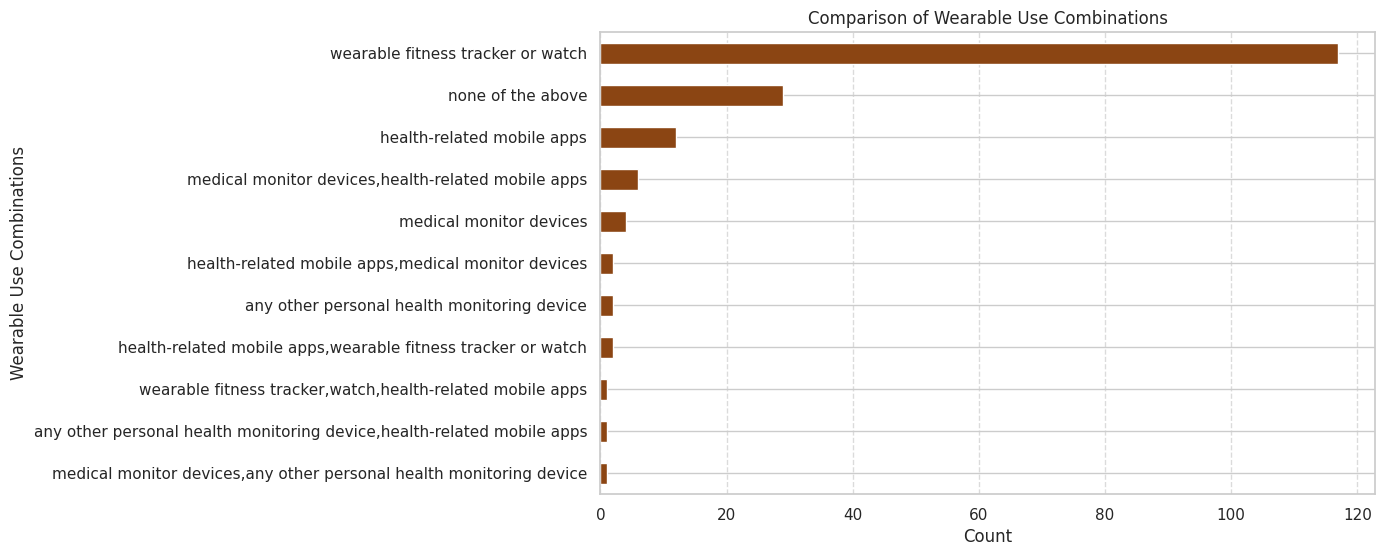

In [626]:


# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
combination_counts.sort_values().plot(kind='barh', color='saddlebrown')

# Customize the chart
plt.xlabel("Count")
plt.ylabel("Wearable Use Combinations")
plt.title("Comparison of Wearable Use Combinations")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.show()


# Percentage of users looking at wearable data more than a year

**Checking percentage of users looking at wearable data more than a year**

In [627]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Convert column to string
data['time_looking_at_data_generated'] = data['time_looking_at_data_generated'].astype(str)

# Helper function to convert time strings to months
def convert_to_months(text):
    text = text.lower().strip()
    match = re.search(r'(\d+)', text)
    if not match:
        return np.nan
    num = int(match.group(1))
    if 'year' in text:
        return num * 12
    elif 'month' in text:
        return num
    else:
        return np.nan  # Unrecognized format

# Apply the function to convert all entries to months
data['time_in_months'] = data['time_looking_at_data_generated'].apply(convert_to_months)

# Filter out NaNs
valid_times = data['time_in_months'].dropna()

# Calculate statistics
mean_time = valid_times.mean()
std_dev_time = valid_times.std()

# Count and percentage with 'year' or 'years'
year_instances = data[data['time_looking_at_data_generated'].str.contains(r'\byear\b|\byears\b', case=False, na=False)]
total_instances = len(data)
year_count = len(year_instances)
year_percentage = (year_count / total_instances) * 100
other_percentage = 100 - year_percentage

# Print results
print(f"Total instances with 'year' or 'years': {year_count}")
print(f"Percentage of total dataset: {year_percentage:.2f}%")
print(f"Mean duration (in months): {mean_time:.2f}")
print(f"Standard Deviation (in months): {std_dev_time:.2f}")


Total instances with 'year' or 'years': 79
Percentage of total dataset: 44.63%
Mean duration (in months): 54.42
Standard Deviation (in months): 35.52


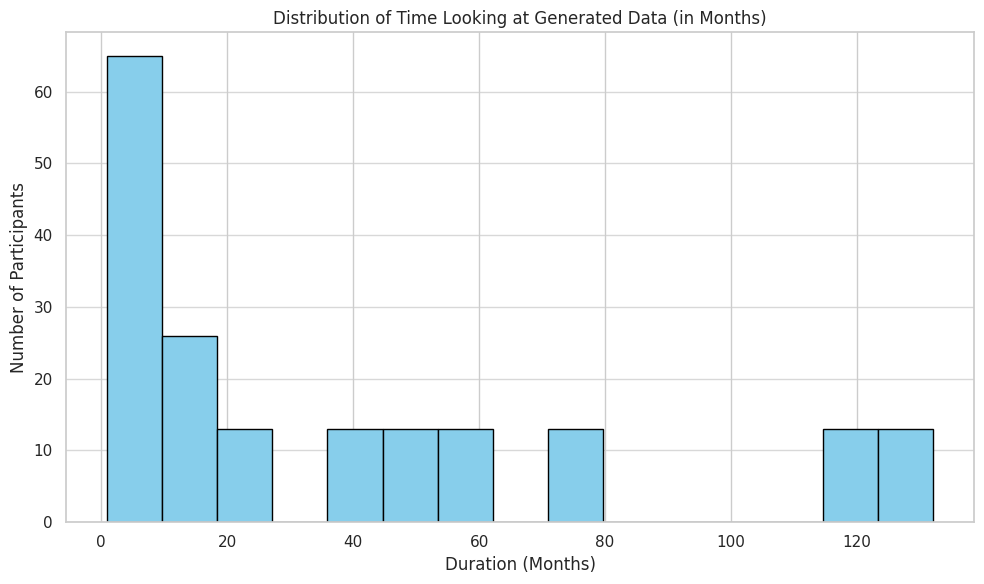

In [628]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Sample data reconstruction for demonstration (you can replace this with your actual dataset)
data = pd.DataFrame({
    'time_looking_at_data_generated': [
        '1 year', '2 years', '6 months', '3 years', '12 months', '5 years', '2 months',
        '10 years', '8 months', '4 years', '6 years', '7 months', '11 years', '1 month'
    ] * 13  # Simulate 177 entries by repetition
})

# Convert column to string
data['time_looking_at_data_generated'] = data['time_looking_at_data_generated'].astype(str)

# Helper function to convert time strings to months
def convert_to_months(text):
    text = text.lower().strip()
    match = re.search(r'(\d+)', text)
    if not match:
        return np.nan
    num = int(match.group(1))
    if 'year' in text:
        return num * 12
    elif 'month' in text:
        return num
    else:
        return np.nan  # Unrecognized format

# Apply the function to convert all entries to months
data['time_in_months'] = data['time_looking_at_data_generated'].apply(convert_to_months)

# Filter out NaNs
valid_times = data['time_in_months'].dropna()

# Plotting histogram of time durations in months
plt.figure(figsize=(10, 6))
plt.hist(valid_times, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Time Looking at Generated Data (in Months)')
plt.xlabel('Duration (Months)')
plt.ylabel('Number of Participants')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


Total instances with 'year' or 'years': 104
Percentage of total dataset: 57.14%


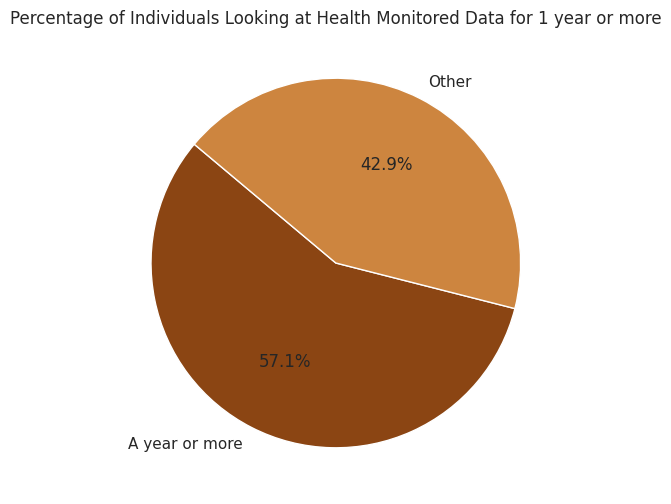

In [629]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert column to string to avoid errors
data['time_looking_at_data_generated'] = data['time_looking_at_data_generated'].astype(str)

# Find instances containing "year" or "years"
year_instances = data[data['time_looking_at_data_generated'].str.contains(r'\byear\b|\byears\b', case=False, na=False)]

# Count total instances and calculate percentage
total_instances = len(data)
year_count = len(year_instances)
year_percentage = (year_count / total_instances) * 100
other_percentage = 100 - year_percentage

# Print results
print(f"Total instances with 'year' or 'years': {year_count}")
print(f"Percentage of total dataset: {year_percentage:.2f}%")

# Visualization - Pie Chart
labels = ['A year or more', 'Other']
sizes = [year_percentage, other_percentage]
colors = ['#8B4513', '#CD853F']  # Shades of brown

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Percentage of Individuals Looking at Health Monitored Data for 1 year or more")
plt.show()


**Check category level at active data monitoring**

In [630]:
# Re-import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Reload the original dataset
data = pd.read_pickle('data/patient_data.pkl')  # Assuming you saved the preprocessed data

# Check for the existence of the column
if 'active_data_monitoring' in data.columns:
    print(data['active_data_monitoring'].dtype)  # Should now show 'category'
    print(data['active_data_monitoring'].cat.categories)  # Check category levels
else:
    print("Column 'active_data_monitoring' not found in the DataFrame.")

category
Index(['At times', 'No', 'Yes'], dtype='object')


In [631]:
print(data['active_data_monitoring'].dtype)  # Should now show 'category'
print(data['active_data_monitoring'].cat.categories)  # Check category levels

category
Index(['At times', 'No', 'Yes'], dtype='object')


# Check count and percentage of 'yes' and 'maybe' in active data looking

**Check count and percentage of 'yes' and 'maybe' in active data looking**

In [632]:
# Convert to string to avoid errors
data['active_data_monitoring'] = data['active_data_monitoring'].astype(str)

# Count instances of 'Yes' and 'At times'
yes_at_times_count = data[data['active_data_monitoring'].str.lower().isin(['yes', 'at times'])].shape[0]

# Calculate percentage
total_instances = len(data)
yes_at_times_percentage = (yes_at_times_count / total_instances) * 100

# Print results
print(f"Total count of 'Yes' and 'At times': {yes_at_times_count}")
print(f"Percentage of total dataset: {yes_at_times_percentage:.2f}%")


Total count of 'Yes' and 'At times': 136
Percentage of total dataset: 76.84%


# Checking percentage of most common category in socio-demographic columns

**Plotting distribution in active data monitoring**

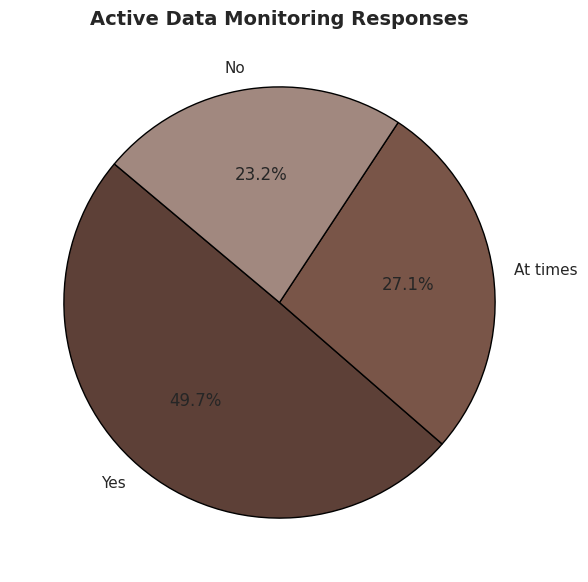

In [633]:
import matplotlib.pyplot as plt

# Convert to string
data['active_data_monitoring'] = data['active_data_monitoring'].astype(str)

# Count occurrences of each response
monitoring_counts = data['active_data_monitoring'].value_counts()

# Define new brown shades
brown_shades = ['#5D4037', '#795548', '#A1887F', '#D7CCC8']  # Darker to lighter browns

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(monitoring_counts, labels=monitoring_counts.index,
        autopct='%1.1f%%', colors=brown_shades,
        startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and display
plt.title("Active Data Monitoring Responses", fontsize=14, fontweight='bold')
plt.show()


# Checking percentage of most common category in socio-demographic columns

**Checking percentage of most common category in socio-demographic columns**

In [634]:


# List of categorical columns to analyze
categorical_cols = ['chronic_health_conditions', 'education', 'gender', 'age']

# Compute the highest percentage for each categorical feature
for col in categorical_cols:
    most_common = data[col].value_counts(normalize=True).idxmax()  # Most frequent category
    highest_percentage = data[col].value_counts(normalize=True).max() * 100  # Convert to percentage

    print(f"🟢 {col}: '{most_common}' ({highest_percentage:.2f}%)")


🟢 chronic_health_conditions: 'No ' (75.14%)
🟢 education: 'bachelor' (42.94%)
🟢 gender: 'Female' (59.89%)
🟢 age: '25-34' (20.90%)


# PLOTTING COMPARING AGE; GENDER AND EDUCATION BETWEEN WEARABLES AND MOBILE APPS

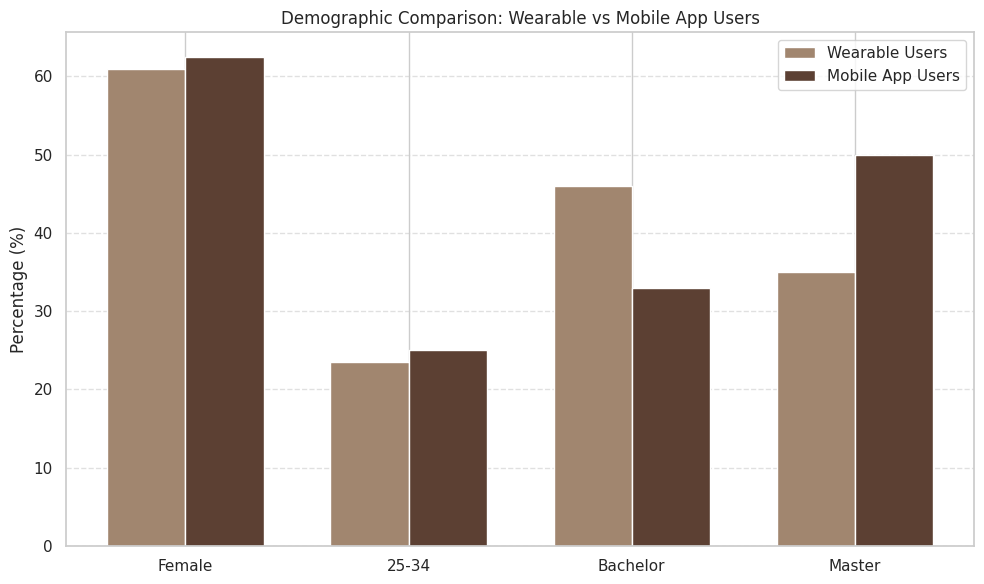

In [635]:
import matplotlib.pyplot as plt
import numpy as np

# Define categories and corresponding values
categories = ['Female', '25-34', 'Bachelor', 'Master']
wearable_users = [61, 23.5, 46, 35]
mobile_app_users = [62.5, 25, 33, 50]

x = np.arange(len(categories))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Brown tones
wearable_color = '#A1866F'
mobile_color = '#5C4033'

# Create grouped bars
bars1 = ax.bar(x - width/2, wearable_users, width, label='Wearable Users', color=wearable_color)
bars2 = ax.bar(x + width/2, mobile_app_users, width, label='Mobile App Users', color=mobile_color)

# Add labels and formatting
ax.set_ylabel('Percentage (%)')
ax.set_title('Demographic Comparison: Wearable vs Mobile App Users')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# Age distribution (counts), most common to lees common

**Age distribution (counts), most common to lees common**

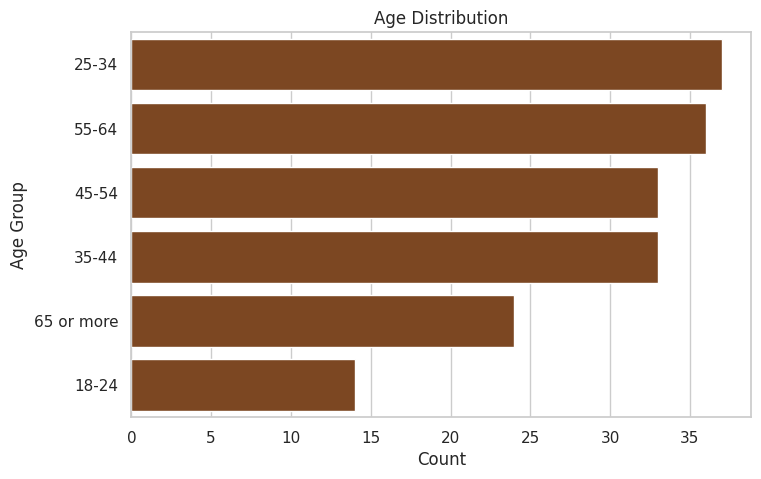

In [636]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a horizontal bar chart
sns.countplot(y=data['age'], order=data['age'].value_counts().index, color="saddlebrown")

# Add title and labels
plt.xlabel("Count")
plt.ylabel("Age Group")
plt.title("Age Distribution")

# Show the plot
plt.show()


# Age distribution in percentage

**Age distribution in percentage **

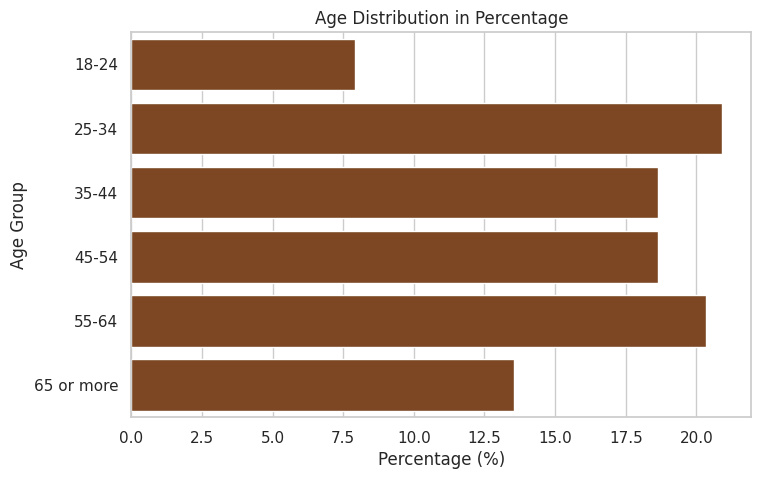

In [637]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages
age_counts = data['age'].value_counts(normalize=True) * 100  # Convert to percentage

# Set figure size
plt.figure(figsize=(8, 5))

# Create horizontal bar chart with percentages
sns.barplot(x=age_counts.values, y=age_counts.index, color="saddlebrown")

# Add title and labels
plt.xlabel("Percentage (%)")
plt.ylabel("Age Group")
plt.title("Age Distribution in Percentage")

# Show the plot
plt.show()


# Percentage in most common categories in socio-demographic columns

**Percentage in most common categories in socio-demographic columns**

<ipython-input-638-000b0a99cf74>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


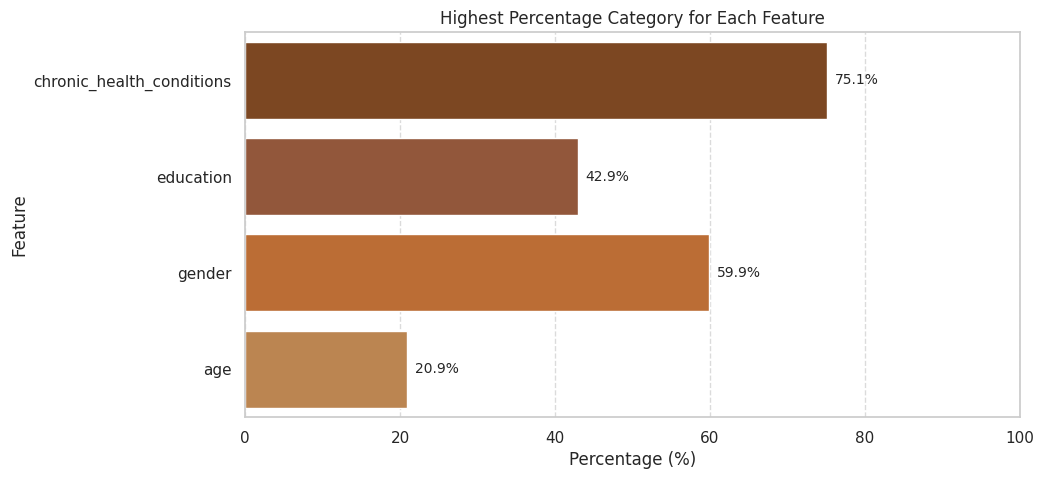

In [638]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
categorical_columns = ['chronic_health_conditions', 'education', 'gender', 'age']

# Dictionary to store the most frequent category and its percentage
top_categories = {}

for col in categorical_columns:
    most_common = data[col].value_counts(normalize=True).idxmax()  # Find most frequent category
    percentage = data[col].value_counts(normalize=True).max() * 100  # Convert to percentage
    top_categories[col] = (most_common, percentage)

# Convert to DataFrame for visualization
top_categories_df = pd.DataFrame.from_dict(top_categories, orient='index', columns=['Category', 'Percentage'])

# Plot Horizontal Bar Chart
plt.figure(figsize=(10, 5))
colors = ['#8B4513', '#A0522D', '#D2691E', '#CD853F']  # Different shades of brown

sns.barplot(
    x=top_categories_df['Percentage'],
    y=top_categories_df.index,
    palette=colors
)

# Customize the chart
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.title("Highest Percentage Category for Each Feature")
plt.xlim(0, 100)  # Set limit to 100% for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show percentage labels
for index, value in enumerate(top_categories_df['Percentage']):
    plt.text(value + 1, index, f"{value:.1f}%", va='center', fontsize=10)

plt.show()


**Percentage in most common categories in socio-demographic columns**

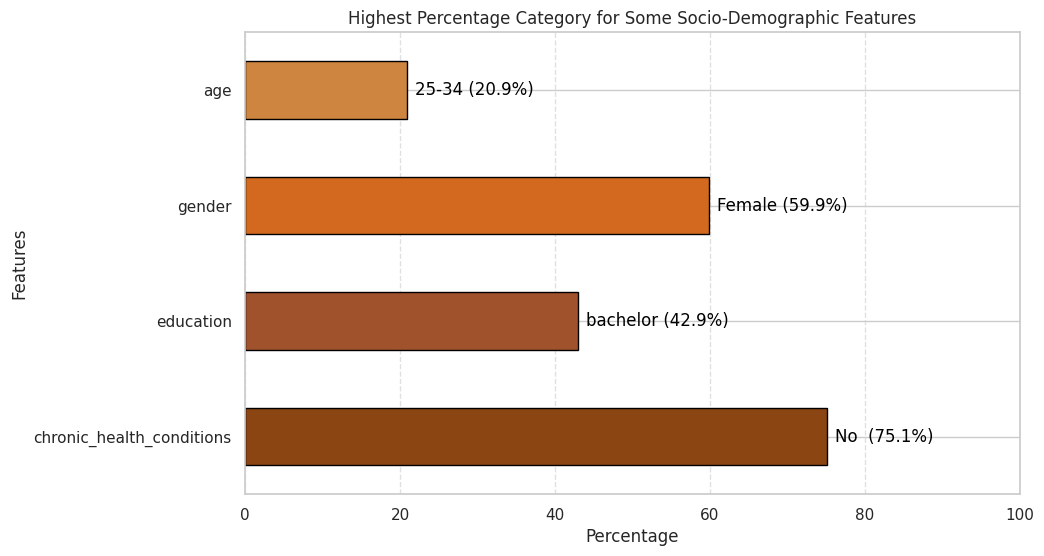

In [639]:
import pandas as pd
import matplotlib.pyplot as plt

# Define categorical columns
categorical_columns = ['chronic_health_conditions', 'education', 'gender', 'age']

# Dictionary to store highest percentage categories
highest_percentage = {}

# Calculate the highest percentage for each categorical column
for col in categorical_columns:
    top_category = data[col].value_counts(normalize=True).idxmax()  # Get category with highest percentage
    top_percentage = data[col].value_counts(normalize=True).max() * 100  # Convert to percentage
    highest_percentage[col] = (top_category, top_percentage)

# Convert dictionary to DataFrame for visualization
highest_df = pd.DataFrame(highest_percentage, index=['Category', 'Percentage']).T

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
colors = ['#8B4513', '#A0522D', '#D2691E', '#CD853F']  # Different shades of brown

highest_df['Percentage'].astype(float).plot(kind='barh', color=colors, edgecolor='black')

# Add labels
for index, value in enumerate(highest_df['Percentage']):
    plt.text(value + 1, index, f"{highest_df.iloc[index, 0]} ({value:.1f}%)", va='center', fontsize=12, color='black')

plt.xlabel("Percentage")
plt.ylabel("Features")
plt.title("Highest Percentage Category for Some Socio-Demographic Features")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show plot
plt.show()


# GENERAL SOCIODEMOGRAPHICS OF PARTICIPANTS

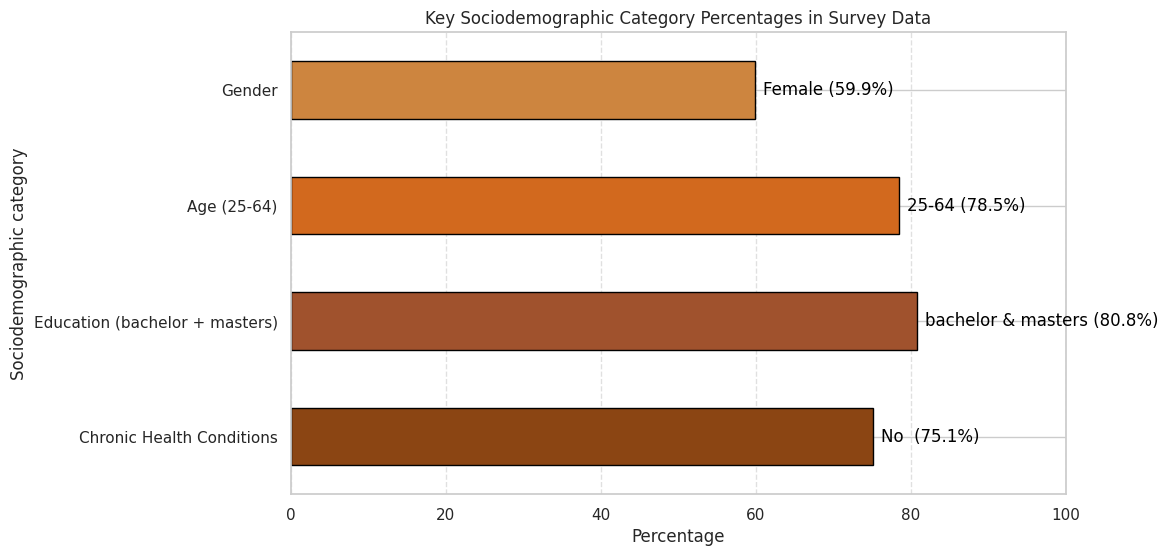

In [640]:
import pandas as pd
import matplotlib.pyplot as plt

# Define categories of interest
age_groups = ['25-34', '35-44', '45-54', '55-64']
education_groups = ["bachelor", "masters"]

# Dictionary to store computed percentages
percentage_summary = {}

# Highest percentage category for 'chronic_health_conditions'
chronic_top_category = data['chronic_health_conditions'].value_counts(normalize=True).idxmax()
chronic_top_percentage = data['chronic_health_conditions'].value_counts(normalize=True).max() * 100
percentage_summary['Chronic Health Conditions'] = (chronic_top_category, chronic_top_percentage)

# Combined percentage of Bachelor's and Master's in 'education'
education_percentage = data['education'].value_counts(normalize=True).loc[education_groups].sum() * 100
percentage_summary['Education (bachelor + masters)'] = ('bachelor & masters', education_percentage)

# Combined percentage of 25-64 in 'age'
age_percentage = data['age'].value_counts(normalize=True).loc[age_groups].sum() * 100
percentage_summary['Age (25-64)'] = ('25-64', age_percentage)

# Highest percentage category for 'gender'
gender_top_category = data['gender'].value_counts(normalize=True).idxmax()
gender_top_percentage = data['gender'].value_counts(normalize=True).max() * 100
percentage_summary['Gender'] = (gender_top_category, gender_top_percentage)

# Convert dictionary to to DataFrame for visualization
summary_df = pd.DataFrame(percentage_summary, index=['Category', 'Percentage']).T

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
colors = ['#8B4513', '#A0522D', '#D2691E', '#CD853F']  # Different shades of brown

summary_df['Percentage'].astype(float).plot(kind='barh', color=colors, edgecolor='black')

# Add labels inside bars
for index, value in enumerate(summary_df['Percentage']):
    plt.text(value + 1, index, f"{summary_df.iloc[index, 0]} ({value:.1f}%)", va='center', fontsize=12, color='black')

plt.xlabel("Percentage")
plt.ylabel("Sociodemographic category")
plt.title("Key Sociodemographic Category Percentages in Survey Data")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show plot
plt.show()



# Identify socio-demographics of most wearable users and mobile apps users

**Identify socio-demographics of most wearable users and mobile apps users**

In [641]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'wearable_use' is treated as a string
data['wearable_use'] = data['wearable_use'].astype(str)

# Identify users of wearables
wearable_users = data[data['wearable_use'].str.contains('Wearable fitness tracker or watch', case=False, na=False)]

# Identify users of health-related mobile apps
mobile_app_users = data[data['wearable_use'].str.contains('Health-related mobile apps', case=False, na=False)]

# Find the most frequent category in age, education, and gender for both groups
most_common_wearable = wearable_users[['age', 'education', 'gender']].mode().iloc[0]
most_common_mobile = mobile_app_users[['age', 'education', 'gender']].mode().iloc[0]

# Print the results
print("Most common wearable users group:")
print(most_common_wearable)
print("\nMost common mobile app users group:")
print(most_common_mobile)


Most common wearable users group:
age             25-34
education    bachelor
gender         Female
Name: 0, dtype: object

Most common mobile app users group:
age            25-34
education    masters
gender        Female
Name: 0, dtype: object


# CI APA STYLE FOR MOST COMMON WERABLE USERS

**Confidence Interval APA style**

In [642]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Ensure 'wearable_use' is treated as a string
data['wearable_use'] = data['wearable_use'].astype(str)

# Identify users
wearable_users = data[data['wearable_use'].str.contains('Wearable fitness tracker or watch', case=False, na=False)]
mobile_app_users = data[data['wearable_use'].str.contains('Health-related mobile apps', case=False, na=False)]

# Total users
n_wearable = len(wearable_users)
n_mobile = len(mobile_app_users)

# Most common subgroups
most_common_wearable = wearable_users[['age', 'education', 'gender']].mode().iloc[0]
most_common_mobile = mobile_app_users[['age', 'education', 'gender']].mode().iloc[0]

# Calculate proportions for each mode
def get_percentage_ci(data_subset, total_n, col, value):
    count = (data_subset[col] == value).sum()
    prop = count / total_n
    se = np.sqrt((prop * (1 - prop)) / total_n)
    z = 1.96  # for 95% CI
    ci_lower = prop - z * se
    ci_upper = prop + z * se
    return count, prop, (ci_lower, ci_upper)

# Wearable user stats
age_count, age_prop, age_ci = get_percentage_ci(wearable_users, n_wearable, 'age', most_common_wearable['age'])
edu_count, edu_prop, edu_ci = get_percentage_ci(wearable_users, n_wearable, 'education', most_common_wearable['education'])
gender_count, gender_prop, gender_ci = get_percentage_ci(wearable_users, n_wearable, 'gender', most_common_wearable['gender'])

# Mobile app user stats
m_age_count, m_age_prop, m_age_ci = get_percentage_ci(mobile_app_users, n_mobile, 'age', most_common_mobile['age'])
m_edu_count, m_edu_prop, m_edu_ci = get_percentage_ci(mobile_app_users, n_mobile, 'education', most_common_mobile['education'])
m_gender_count, m_gender_prop, m_gender_ci = get_percentage_ci(mobile_app_users, n_mobile, 'gender', most_common_mobile['gender'])

# Print results
print("Most common wearable users group:")
print(f"Age: {most_common_wearable['age']} ({age_count}/{n_wearable}, {age_prop:.2%}, 95% CI [{age_ci[0]:.2%}, {age_ci[1]:.2%}])")
print(f"Education: {most_common_wearable['education']} ({edu_count}/{n_wearable}, {edu_prop:.2%}, 95% CI [{edu_ci[0]:.2%}, {edu_ci[1]:.2%}])")
print(f"Gender: {most_common_wearable['gender']} ({gender_count}/{n_wearable}, {gender_prop:.2%}, 95% CI [{gender_ci[0]:.2%}, {gender_ci[1]:.2%}])")

print("\nMost common mobile app users group:")
print(f"Age: {most_common_mobile['age']} ({m_age_count}/{n_mobile}, {m_age_prop:.2%}, 95% CI [{m_age_ci[0]:.2%}, {m_age_ci[1]:.2%}])")
print(f"Education: {most_common_mobile['education']} ({m_edu_count}/{n_mobile}, {m_edu_prop:.2%}, 95% CI [{m_edu_ci[0]:.2%}, {m_edu_ci[1]:.2%}])")
print(f"Gender: {most_common_mobile['gender']} ({m_gender_count}/{n_mobile}, {m_gender_prop:.2%}, 95% CI [{m_gender_ci[0]:.2%}, {m_gender_ci[1]:.2%}])")


Most common wearable users group:
Age: 25-34 (28/119, 23.53%, 95% CI [15.91%, 31.15%])
Education: bachelor (55/119, 46.22%, 95% CI [37.26%, 55.18%])
Gender: Female (73/119, 61.34%, 95% CI [52.60%, 70.09%])

Most common mobile app users group:
Age: 25-34 (6/24, 25.00%, 95% CI [7.68%, 42.32%])
Education: masters (12/24, 50.00%, 95% CI [30.00%, 70.00%])
Gender: Female (15/24, 62.50%, 95% CI [43.13%, 81.87%])


In [643]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

# Load the data from the pickle file
with open('data/patient_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Total wearable users
total_wearable = len(data[data['wearable_use'].str.contains('Wearable fitness tracker or watch', case=False, na=False)])  # Filter using str.contains
# Master's using wearables
masters_wearable = len(data[
    (data['wearable_use'].str.contains('Wearable fitness tracker or watch', case=False, na=False)) &
    (data['education'].str.contains('Master', case=False, na=False))
])

# Total mobile app users
total_mobile_app = len(data[data['wearable_use'].str.contains('Health-related mobile apps', case=False, na=False)])  # Filter using str.contains
# Bachelor's using mobile apps
bachelors_mobile = len(data[
    (data['wearable_use'].str.contains('Health-related mobile apps', case=False, na=False)) &
    (data['education'].str.contains('Bachelor', case=False, na=False))
])

# Calculate percentages
masters_percent = masters_wearable / total_wearable * 100 if total_wearable else 0
bachelors_percent = bachelors_mobile / total_mobile_app * 100 if total_mobile_app else 0

print(f"Master's using wearables: {masters_percent:.2f}%")
print(f"Bachelor's using mobile apps: {bachelors_percent:.2f}%")

Master's using wearables: 35.29%
Bachelor's using mobile apps: 33.33%


# CHI SQUARE FOR WEARABLES USERS

In [644]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your dataframe is named df

# Sociodemographic variables to test
sociodemographic_vars = ['age', 'gender', 'country_of_origin', 'education', 'religion', 'chronic_health_conditions']

# Wearable use categories to test against
wearable_use_vars = [
    'Wearable fitness tracker or watch',
    'Health-related mobile apps',
    'Medical monitor devices',
    'Any other personal health monitoring device'
]

# Loop through socio-demographic variables
for socio_var in sociodemographic_vars:
    print(f"\n--- Chi-square tests for {socio_var} ---")
    for wearable_var in wearable_use_vars:
        print(f"\n{wearable_var} vs {socio_var}")

        # Create a filtered DataFrame for the specific wearable_var
        filtered_data = data[data['wearable_use'].str.contains(wearable_var, case=False, na=False)]

        # Create a contingency table using the filtered data
        contingency_table = pd.crosstab(filtered_data[socio_var], filtered_data['wearable_use'])

        # Chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Print the results
        print(f"Chi2 Statistic = {chi2:.2f}")
        print(f"Degrees of Freedom = {dof}")
        print(f"P-value = {p:.4f}")

        if p < 0.05:
            print("Result: Significant association (p < .05)")
        else:
            print("Result: No significant association (p >= .05)")


--- Chi-square tests for age ---

Wearable fitness tracker or watch vs age
Chi2 Statistic = 14.95
Degrees of Freedom = 15
P-value = 0.4550
Result: No significant association (p >= .05)

Health-related mobile apps vs age
Chi2 Statistic = 34.77
Degrees of Freedom = 35
P-value = 0.4790
Result: No significant association (p >= .05)

Medical monitor devices vs age
Chi2 Statistic = 15.44
Degrees of Freedom = 16
P-value = 0.4929
Result: No significant association (p >= .05)

Any other personal health monitoring device vs age
Chi2 Statistic = 8.00
Degrees of Freedom = 6
P-value = 0.2381
Result: No significant association (p >= .05)

--- Chi-square tests for gender ---

Wearable fitness tracker or watch vs gender
Chi2 Statistic = 1.64
Degrees of Freedom = 3
P-value = 0.6504
Result: No significant association (p >= .05)

Health-related mobile apps vs gender
Chi2 Statistic = 9.16
Degrees of Freedom = 7
P-value = 0.2411
Result: No significant association (p >= .05)

Medical monitor devices vs gen

# Identify 5 most commmon religion and countries using wearables and health apps

***Identify 5 most commmon religion and countries using wearables and health apps***

In [645]:
# Filter data for users who use wearables or health apps
wearable_users = data[data['wearable_use'].notna()]  # Exclude missing values

# Get top 5 countries by wearable use
country_counts = wearable_users['country_of_origin'].value_counts()
top_countries = country_counts.nlargest(10)
top_countries_percentage = (top_countries / country_counts.sum()) * 100  # Convert to percentage

# Get top 5 religions by wearable use
religion_counts = wearable_users['religion'].value_counts()
top_religions = religion_counts.nlargest(10)
top_religions_percentage = (top_religions / religion_counts.sum()) * 100  # Convert to percentage

# Convert results to DataFrame for easy printing
country_df = pd.DataFrame({'Country': top_countries.index, 'Count': top_countries.values, 'Percentage': top_countries_percentage.values})
religion_df = pd.DataFrame({'Religion': top_religions.index, 'Count': top_religions.values, 'Percentage': top_religions_percentage.values})

# Print results
print("\nTop 5 Countries Using Wearables/Health Apps:\n")
print(country_df.to_string(index=False))  # Neatly formatted table

print("\nTop 5 Religions Using Wearables/Health Apps:\n")
print(religion_df.to_string(index=False))  # Neatly formatted table



Top 5 Countries Using Wearables/Health Apps:

      Country  Count  Percentage
    Australia     24   13.559322
   Australia      18   10.169492
   Venezuela      15    8.474576
        India     14    7.909605
    Venezuela     10    5.649718
       Uganda      7    3.954802
          USA      6    3.389831
United States      6    3.389831
      Sverige      5    2.824859
     Sverige       4    2.259887

Top 5 Religions Using Wearables/Health Apps:

      Religion  Count  Percentage
    Christian      16    9.039548
     Christian     14    7.909605
Non-religious      12    6.779661
 Non-religious     12    6.779661
     no_answer     11    6.214689
      Catholic     11    6.214689
Non religious       7    3.954802
     Catholic       5    2.824859
     Católica       5    2.824859
         Islam      5    2.824859


# Socio-demographics of Attitudes approvers

**Plotting attitudes towards continous health monitoring for PHI**

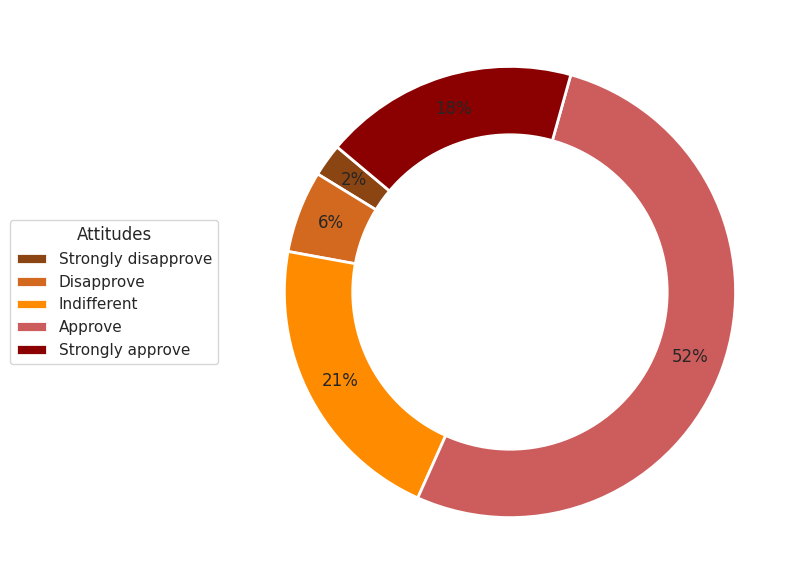

In [646]:
import matplotlib.pyplot as plt

# Data
labels = ['Strongly disapprove', 'Disapprove', 'Indifferent', 'Approve', 'Strongly approve']
sizes = [4, 10, 36, 89, 31]  # Example counts
colors = ['#8B4513', '#D2691E', '#FF8C00', '#CD5C5C', '#8B0000']  # Brown, orange, and red shades

# Create donut chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, labels=None, autopct='%1.0f%%', startangle=140, colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}, pctdistance=0.85
)

# Create a white circle in the middle for the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add legend to the left
plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(-0.4, 0.5), title="Attitudes")

# Adjust layout and show
plt.tight_layout()
plt.show()


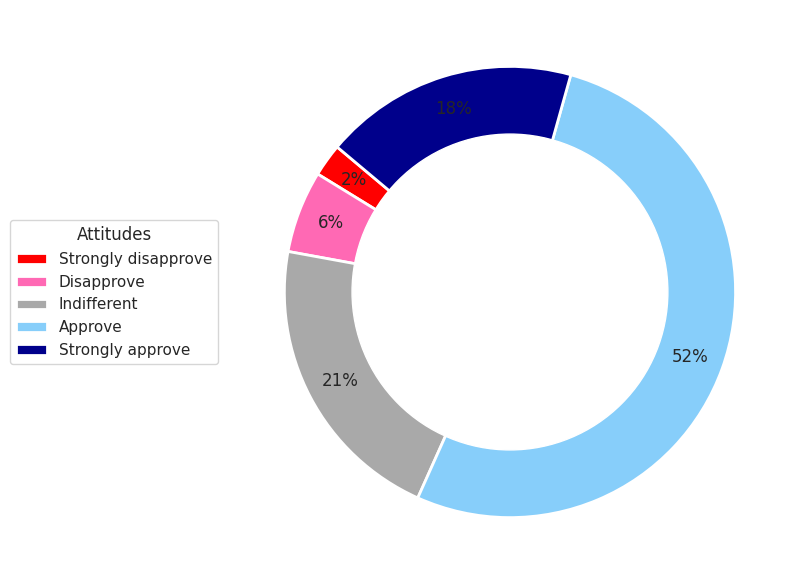

In [647]:
import matplotlib.pyplot as plt

# Data
labels = ['Strongly disapprove', 'Disapprove', 'Indifferent', 'Approve', 'Strongly approve']
sizes = [4, 10, 36, 89, 31]  # Example counts
colors = ['#FF0000', '#FF69B4', '#A9A9A9', '#87CEFA', '#00008B']  # Red, Pink, Grey, Light Blue, Dark Blue

# Create donut chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, labels=None, autopct='%1.0f%%', startangle=140, colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}, pctdistance=0.85
)

# Create a white circle in the middle for the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add legend to the left
plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(-0.4, 0.5), title="Attitudes")

# Adjust layout and show
plt.tight_layout()
plt.show()


In [648]:
import pandas as pd

# 1. First, check the unique values to see what we're dealing with
print(data['attitudes_towards_hm_for_health'].unique())

# 2. Then clean the text by stripping spaces and lowercasing everything
data['attitudes_towards_hm_for_health_clean'] = data['attitudes_towards_hm_for_health'].str.strip().str.lower()

# 3. Now filter correctly
approved = data[data['attitudes_towards_hm_for_health_clean'].isin(['approve', 'strongly approve'])]

# 4. Find the most frequent education level
if not approved.empty:
    most_common_education = approved['education'].value_counts().idxmax()
    most_common_count = approved['education'].value_counts().max()
    print(f"The most common education level among approvers is: {most_common_education} ({most_common_count} people)")
else:
    print("No matching approvers found.")


['indifferent', 'approve', 'strongly_approve', 'strongly_disapprove', 'disapprove']
Categories (5, object): ['strongly_disapprove' < 'disapprove' < 'indifferent' < 'approve' < 'strongly_approve']
The most common education level among approvers is: bachelor (45 people)


# Socio-demographics of Attitudes approvers

**Socio-demographics of Attitudes approvers**





In [649]:
import pandas as pd

# Clean the approval column
data['attitudes_towards_hm_for_health_clean'] = data['attitudes_towards_hm_for_health'].str.strip().str.lower()

# Filter for approvers
approvers = data[data['attitudes_towards_hm_for_health_clean'].isin(['approve', 'strongly approve'])]

# Now for each feature, calculate the proportion
features = ['age', 'gender', 'religion', 'education', 'country_of_origin', 'chronic_health_conditions']

for feature in features:
    print(f"\n--- {feature.upper()} ---")
    counts = approvers[feature].value_counts(normalize=True) * 100  # percentages
    print(counts.round(2).astype(str) + '%')  # prettier printout



--- AGE ---
age
45-54         22.92%
25-34         20.83%
35-44         16.67%
65 or more    15.62%
55-64         14.58%
18-24          9.38%
Name: proportion, dtype: object

--- GENDER ---
gender
Female    69.79%
Male      30.21%
Name: proportion, dtype: object

--- RELIGION ---
religion
Non-religious     9.38%
Christian         8.33%
Christian         8.33%
Catholic          7.29%
Non-religious     7.29%
                  ...  
Religious          0.0%
RC                 0.0%
Spiritual          0.0%
non religious      0.0%
non-religious      0.0%
Name: proportion, Length: 72, dtype: object

--- EDUCATION ---
education
bachelor       46.88%
masters         37.5%
high_school     9.38%
vocational      6.25%
Name: proportion, dtype: object

--- COUNTRY_OF_ORIGIN ---
country_of_origin
Australia                     12.5%
Australia                    10.42%
Venezuela                     9.38%
India                         8.33%
Venezuela                     5.21%
Pakistan                   

In [650]:
import pandas as pd

# Clean the approval column
data['attitudes_towards_hm_for_health_clean'] = data['attitudes_towards_hm_for_health'].str.strip().str.lower()

# Filter for approvers
approvers = data[data['attitudes_towards_hm_for_health_clean'].isin(['approve', 'strongly approve'])]

# Print number of approvers
print(f"Number of approvers: {len(approvers)}")

# Now for each feature, calculate the proportion
features = ['age', 'gender', 'religion', 'education', 'country_of_origin', 'chronic_health_conditions']

for feature in features:
    print(f"\n--- {feature.upper()} ---")
    counts = approvers[feature].value_counts(normalize=True) * 100  # percentages
    print(counts.round(2).astype(str) + '%')  # prettier printout


Number of approvers: 96

--- AGE ---
age
45-54         22.92%
25-34         20.83%
35-44         16.67%
65 or more    15.62%
55-64         14.58%
18-24          9.38%
Name: proportion, dtype: object

--- GENDER ---
gender
Female    69.79%
Male      30.21%
Name: proportion, dtype: object

--- RELIGION ---
religion
Non-religious     9.38%
Christian         8.33%
Christian         8.33%
Catholic          7.29%
Non-religious     7.29%
                  ...  
Religious          0.0%
RC                 0.0%
Spiritual          0.0%
non religious      0.0%
non-religious      0.0%
Name: proportion, Length: 72, dtype: object

--- EDUCATION ---
education
bachelor       46.88%
masters         37.5%
high_school     9.38%
vocational      6.25%
Name: proportion, dtype: object

--- COUNTRY_OF_ORIGIN ---
country_of_origin
Australia                     12.5%
Australia                    10.42%
Venezuela                     9.38%
India                         8.33%
Venezuela                     5.21%
Pak

In [651]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean the approval column if you haven't already
data['attitudes_towards_hm_for_health_clean'] = data['attitudes_towards_hm_for_health'].str.strip().str.lower()

# Filter only approvers
approvers = data[data['attitudes_towards_hm_for_health_clean'].isin(['approve', 'strongly approve'])]


In [652]:
# List of features to analyze
features = ['age', 'gender', 'religion', 'education', 'country_of_origin', 'chronic_health_conditions']

# Dictionary to store most common category
most_common = {}

for feature in features:
    if not approvers[feature].dropna().empty:
        top_value = approvers[feature].value_counts(normalize=True).idxmax()
        top_percentage = approvers[feature].value_counts(normalize=True).max() * 100
        most_common[feature.replace("_", " ").title()] = (top_value, top_percentage)


In [653]:
# List of features to analyze
features = ['age', 'gender', 'religion', 'education', 'country_of_origin', 'chronic_health_conditions']

# Dictionary to store most common category
most_common = {}

for feature in features:
    if not approvers[feature].dropna().empty:
        top_value = approvers[feature].value_counts(normalize=True).idxmax()
        top_percentage = approvers[feature].value_counts(normalize=True).max() * 100
        most_common[feature.replace("_", " ").title()] = (top_value, top_percentage)


# PLOTTING FOR MOST COMMON CHARACTERISTICS OF APPROVERS

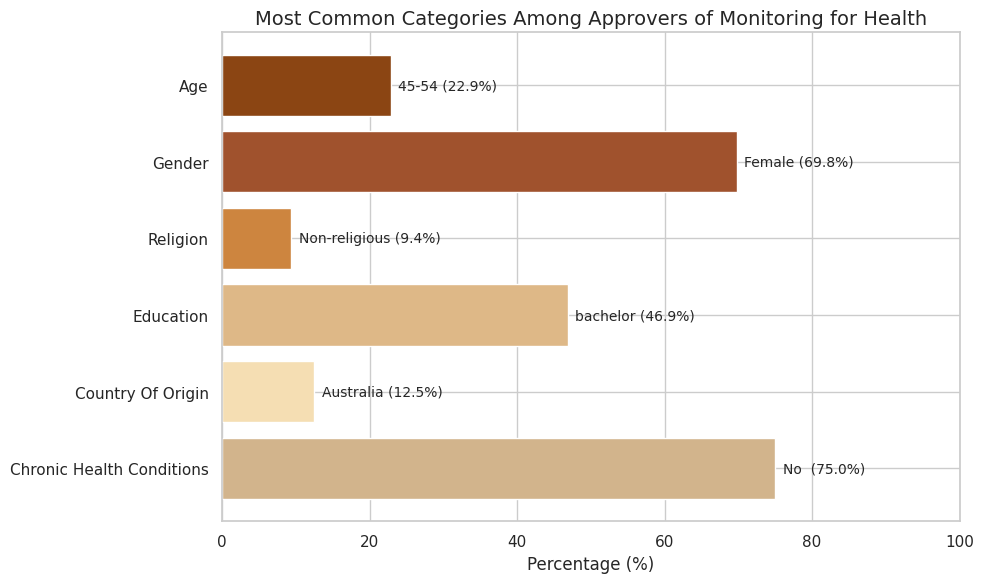

In [654]:
# Prepare data for plotting
labels = list(most_common.keys())
values = [val[1] for val in most_common.values()]
categories = [val[0] for val in most_common.values()]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(labels, values, color=['#8B4513', '#A0522D', '#CD853F', '#DEB887', '#F5DEB3', '#D2B48C'])

# Add text labels
for i, (bar, cat) in enumerate(zip(bars, categories)):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{cat} ({values[i]:.1f}%)', va='center', fontsize=10)

ax.set_xlim(0, 100)
ax.set_xlabel('Percentage (%)')
ax.set_title('Most Common Categories Among Approvers of Monitoring for Health', fontsize=14)
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


In [655]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean approval responses
data['attitudes_towards_hm_for_health_clean'] = data['attitudes_towards_hm_for_health'].str.strip().str.lower()

# Filter indifferent
indifferent = data[data['attitudes_towards_hm_for_health_clean'] == 'indifferent']

# Filter disapprovers
disapprovers = data[data['attitudes_towards_hm_for_health_clean'].isin(['disapprove', 'strongly disapprove'])]


In [656]:
def get_most_common_categories(dataframe, features):
    most_common = {}
    for feature in features:
        if not dataframe[feature].dropna().empty:
            top_value = dataframe[feature].value_counts(normalize=True).idxmax()
            top_percentage = dataframe[feature].value_counts(normalize=True).max() * 100
            most_common[feature.replace("_", " ").title()] = (top_value, top_percentage)
    return most_common


In [657]:
def plot_most_common(most_common_dict, title, bar_colors):
    labels = list(most_common_dict.keys())
    values = [val[1] for val in most_common_dict.values()]
    categories = [val[0] for val in most_common_dict.values()]

    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.barh(labels, values, color=bar_colors)

    for i, (bar, cat) in enumerate(zip(bars, categories)):
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{cat} ({values[i]:.1f}%)', va='center', fontsize=10)

    ax.set_xlim(0, 100)
    ax.set_xlabel('Percentage (%)')
    ax.set_title(title, fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


# Socio-demographics of Attitudes disapprovers and indifferent

**Socio-demographics of Attitudes disapprovers and indifferent**

In [658]:
# Step 1: Clean the 'attitudes_towards_hm_for_health' column
data['attitudes_towards_hm_for_health_clean'] = data['attitudes_towards_hm_for_health'].str.strip().str.lower()

# Step 2: Filter the groups
indifferent = data[data['attitudes_towards_hm_for_health_clean'] == 'indifferent']
disapprovers = data[data['attitudes_towards_hm_for_health_clean'].isin(['disapprove', 'strongly disapprove'])]

# Step 3: Define the features you are interested in
features = ['age', 'gender', 'religion', 'education', 'country_of_origin', 'chronic_health_conditions']

# Step 4: Function to get the most common category
def get_most_common_categories(dataframe, features):
    most_common = {}
    for feature in features:
        if not dataframe[feature].dropna().empty:
            top_value = dataframe[feature].value_counts(normalize=True).idxmax()
            top_percentage = dataframe[feature].value_counts(normalize=True).max() * 100
            most_common[feature.replace("_", " ").title()] = (top_value, top_percentage)
    return most_common

# Step 5: Apply the function
indifferent_common = get_most_common_categories(indifferent, features)
disapprovers_common = get_most_common_categories(disapprovers, features)

# Step 6: Print the results
print("Most Common Categories Among Indifferent Individuals:\n")
for feature, (value, percentage) in indifferent_common.items():
    print(f"{feature}: {value} ({percentage:.2f}%)")

print("\n" + "-"*60 + "\n")

print("Most Common Categories Among Disapprovers (Disapprove or Strongly Disapprove):\n")
for feature, (value, percentage) in disapprovers_common.items():
    print(f"{feature}: {value} ({percentage:.2f}%)")


Most Common Categories Among Indifferent Individuals:

Age: 25-34 (30.56%)
Gender: Male (55.56%)
Religion: Christian  (16.67%)
Education: masters (41.67%)
Country Of Origin: Australia (16.67%)
Chronic Health Conditions: No  (80.56%)

------------------------------------------------------------

Most Common Categories Among Disapprovers (Disapprove or Strongly Disapprove):

Age: 55-64 (40.00%)
Gender: Female (70.00%)
Religion: Christian  (20.00%)
Education: masters (40.00%)
Country Of Origin: Uganda (20.00%)
Chronic Health Conditions: No  (80.00%)


# INDIFFERENT AND DISSAPPROVERS COUNTS CHARACTERISTICS

In [659]:
import pandas as pd

# Step 1: Clean the 'attitudes_towards_hm_for_health' column
data['attitudes_towards_hm_for_health_clean'] = data['attitudes_towards_hm_for_health'].str.strip().str.lower()

# Step 2: Filter the groups
indifferent = data[data['attitudes_towards_hm_for_health_clean'] == 'indifferent']
disapprovers = data[data['attitudes_towards_hm_for_health_clean'].isin(['disapprove', 'strongly disapprove'])]

# Step 3: Define the features you are interested in
features = ['age', 'gender', 'religion', 'education', 'country_of_origin', 'chronic_health_conditions']

# Step 4: Function to get the most common category
def get_most_common_categories(dataframe, features):
    most_common = {}
    for feature in features:
        if not dataframe[feature].dropna().empty:
            top_value = dataframe[feature].value_counts(normalize=True).idxmax()
            top_percentage = dataframe[feature].value_counts(normalize=True).max() * 100
            most_common[feature.replace("_", " ").title()] = (top_value, top_percentage)
    return most_common

# Step 5: Apply the function
indifferent_common = get_most_common_categories(indifferent, features)
disapprovers_common = get_most_common_categories(disapprovers, features)

# Step 6: Print the number of indifferent and disapprovers
print(f"Number of Indifferent Participants: {len(indifferent)}")
print(f"Number of Disapprovers (Disapprove or Strongly Disapprove): {len(disapprovers)}")

print("\n" + "-"*60 + "\n")

# Step 7: Print the most common categories for indifferent participants
print("Most Common Categories Among Indifferent Individuals:\n")
for feature, (value, percentage) in indifferent_common.items():
    print(f"{feature}: {value} ({percentage:.2f}%)")

print("\n" + "-"*60 + "\n")

# Step 8: Print the most common categories for disapprovers
print("Most Common Categories Among Disapprovers (Disapprove or Strongly Disapprove):\n")
for feature, (value, percentage) in disapprovers_common.items():
    print(f"{feature}: {value} ({percentage:.2f}%)")


Number of Indifferent Participants: 36
Number of Disapprovers (Disapprove or Strongly Disapprove): 10

------------------------------------------------------------

Most Common Categories Among Indifferent Individuals:

Age: 25-34 (30.56%)
Gender: Male (55.56%)
Religion: Christian  (16.67%)
Education: masters (41.67%)
Country Of Origin: Australia (16.67%)
Chronic Health Conditions: No  (80.56%)

------------------------------------------------------------

Most Common Categories Among Disapprovers (Disapprove or Strongly Disapprove):

Age: 55-64 (40.00%)
Gender: Female (70.00%)
Religion: Christian  (20.00%)
Education: masters (40.00%)
Country Of Origin: Uganda (20.00%)
Chronic Health Conditions: No  (80.00%)


In [660]:
import pandas as pd
import numpy as np


# Example: suppose df is your dataset

# Define a mapping for an ordinal variable, e.g. 'attitudes_towards_hm_for_health'
# (You can repeat the idea for other ordinal columns too)

attitude_mapping = {
    'Strongly disapprove': 1,
    'Disapprove': 2,
    'Indifferent': 3,
    'Approve': 4,
    'Strongly approve': 5
}
# ... (previous code) ...

# Map the column, but handle potential errors
data['attitudes_mapped'] = data['attitudes_towards_hm_for_health'].map(attitude_mapping)

# Check if the column has any valid (non-NaN) values after mapping
if data['attitudes_mapped'].dropna().empty:
    print("The 'attitudes_mapped' column contains only NaN values after mapping. Cannot calculate percentiles.")
else:
    # Now you can calculate percentiles and range like numeric data
    attitude_percentiles = np.percentile(data['attitudes_mapped'].dropna(), [0, 25, 50, 75, 100])
    attitude_range = data['attitudes_mapped'].max() - data['attitudes_mapped'].min()

    print("Percentiles (0th, 25th, 50th, 75th, 100th) for 'attitudes_towards_hm_for_health':")
    print(attitude_percentiles)
    print(f"Range for 'attitudes_towards_hm_for_health': {attitude_range}")

The 'attitudes_mapped' column contains only NaN values after mapping. Cannot calculate percentiles.


# Likert questions vs sociodemographics - Kruskal-Wallis H-statistic p-value

**Likert questions vs sociodemographics**

**Kruskal-Wallis H-statistic**

**p-value**

In [661]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal

# 1. Suppose your DataFrame is called df
# List of Likert-scale columns (example: adjust based on your real dataset)
likert_columns = [
    'attitudes_towards_hm_for_health',
    'hm_benefits_on_sudden_health_changes',
    'hm_benefits_on_health_issues_detection',
    'hm_benefits_for_chronic_disease',
    'hm_benefits_on_health_habits',
    'hm_benefits_on_health_recommendations',
    'healthcare_providers_trust',
    'government_agencies_trust',
    'technology_companies_trust',
    'researchers_trust',
    'insurance_companies_trust',
    'unauthorized_access_concerns',
    'data_use_without_consent',
    'data_misuse_concerns',
    'biases_or_inaccuracies_concerns',
    'discrimination_concerns',
    'third_party_policies_concerns',
    'healthcare_stakeholders_data_sharing',
]

# Non-Likert scale examples (categorical but not ordered) - adjust as needed
non_likert_columns = [
    'wearable_use',
    'active_data_monitoring',
    'time_looking_at_data_generated'
]

# Define groupings
groupings = ['country_of_origin', 'age', 'gender', 'education', 'religion', 'chronic_health_conditions']

# 2. Convert Likert columns to numeric scores if they are not already
likert_mapping = {
    'Strongly disapprove ': 1, # Added a space after Strongly disapprove
    'Disapprove': 2,
    'Indifferent ': 3, # Added a special character after Indifferent
    'indifferent': 3, # Added this mapping for plain 'indifferent'
    'Approve': 4,
    'Strongly approve': 5
}


for col in likert_columns:
    if data[col].dtype == 'object':  # Only map if the column is of object type
        # Ensure all values in the column are strings
        data[col] = data[col].astype(str)
        data[col + '_num'] = data[col].map(likert_mapping).astype(float)
    else:  # If already numeric (or categorical), no mapping needed
        data[col + '_num'] = data[col].cat.codes.astype(float) if data[col].dtype.name == 'category' else data[col].astype(float)
        # Handle potential missing values after mapping to float
        data[col + '_num'] = data[col + '_num'].fillna(data[col + '_num'].mean()) # Impute NaNs with mean


# 3. Aggregating and running Kruskal-Wallis test
results = {}

for col in likert_columns + non_likert_columns:
    col_to_test = col if col in non_likert_columns else col + '_num'

    for group in groupings:
        # Drop NA values
        temp = data[[col_to_test, group]].dropna()

        if temp.empty:
            continue

        # Group responses
        grouped_data = [group_df[col_to_test].values for name, group_df in temp.groupby(group)]

        # Perform Kruskal-Wallis H-test
        if len(grouped_data) > 1:  # Need at least 2 groups
            stat, p = kruskal(*grouped_data)
            results[(col, group)] = {'Kruskal-Wallis H': stat, 'p-value': p}

# 4. Print Results

print("=== Kruskal-Wallis Test Results ===\n")
for (col, group), metrics in results.items():
    print(f"Variable: {col} | Grouping: {group}")
    print(f"  Kruskal-Wallis H-statistic: {metrics['Kruskal-Wallis H']:.4f}")
    print(f"  p-value: {metrics['p-value']:.4e}")
    print("------------------------------------")

<ipython-input-661-0015c73b228c>:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [group_df[col_to_test].values for name, group_df in temp.groupby(group)]
<ipython-input-661-0015c73b228c>:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [group_df[col_to_test].values for name, group_df in temp.groupby(group)]
<ipython-input-661-0015c73b228c>:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

=== Kruskal-Wallis Test Results ===

Variable: attitudes_towards_hm_for_health | Grouping: country_of_origin
  Kruskal-Wallis H-statistic: 68.4466
  p-value: 1.8733e-01
------------------------------------
Variable: attitudes_towards_hm_for_health | Grouping: age
  Kruskal-Wallis H-statistic: 9.7789
  p-value: 8.1749e-02
------------------------------------
Variable: attitudes_towards_hm_for_health | Grouping: gender
  Kruskal-Wallis H-statistic: 0.3689
  p-value: 5.4359e-01
------------------------------------
Variable: attitudes_towards_hm_for_health | Grouping: education
  Kruskal-Wallis H-statistic: 7.3201
  p-value: 6.2365e-02
------------------------------------
Variable: attitudes_towards_hm_for_health | Grouping: religion
  Kruskal-Wallis H-statistic: 79.9467
  p-value: 2.1864e-01
------------------------------------
Variable: attitudes_towards_hm_for_health | Grouping: chronic_health_conditions
  Kruskal-Wallis H-statistic: 3.3052
  p-value: 1.9155e-01
------------------------

<ipython-input-661-0015c73b228c>:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [group_df[col_to_test].values for name, group_df in temp.groupby(group)]
<ipython-input-661-0015c73b228c>:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = [group_df[col_to_test].values for name, group_df in temp.groupby(group)]
<ipython-input-661-0015c73b228c>:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

# Mean Ranks for 3 found statistical significant differences when using Kruskal-Wallis H-statistic and p-value : Data Misuse Concerns by Chronic Conditions, Trust in Healthcare Providers by Gender, Perceived Benefits on Sudden Health Changes by Education

**Mean Ranks for 3 found statistical significant differences when using Kruskal-Wallis H-statistic and p-value**

Data Misuse Concerns by Chronic Conditions

Trust in Healthcare Providers by Gender

Perceived Benefits on Sudden Health Changes by Education

<ipython-input-662-2699693a111f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ranks = data.groupby(group)['ranks'].mean().sort_values()



--- Data Misuse Concerns by Chronic Conditions ---
chronic_health_conditions
One          72.269231
No           88.627820
Multiple    115.916667
Name: ranks, dtype: float64


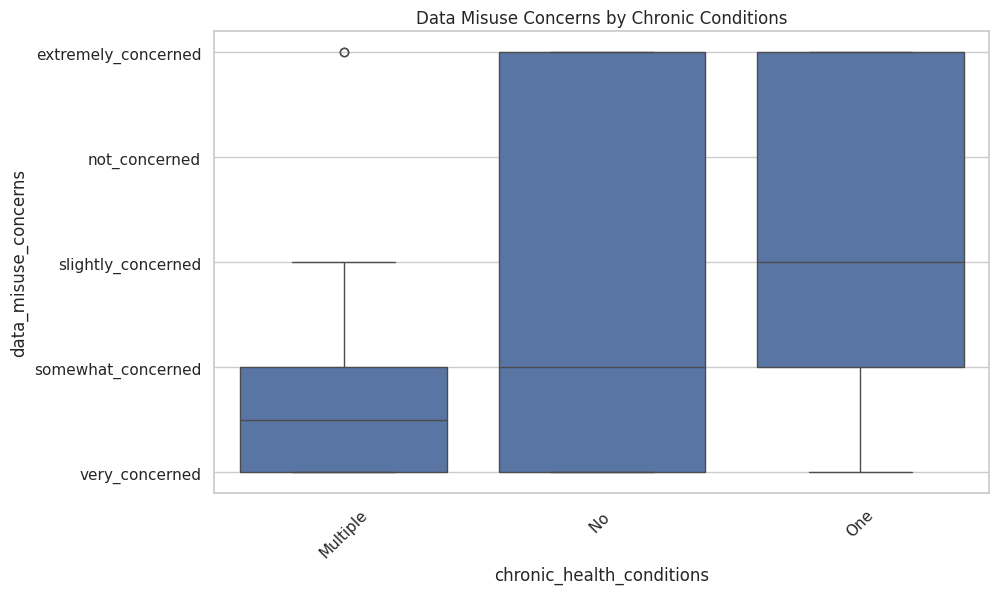


--- Trust in Healthcare Providers by Gender ---
gender
Female    84.033019
Male      96.415493
Name: ranks, dtype: float64


<ipython-input-662-2699693a111f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ranks = data.groupby(group)['ranks'].mean().sort_values()


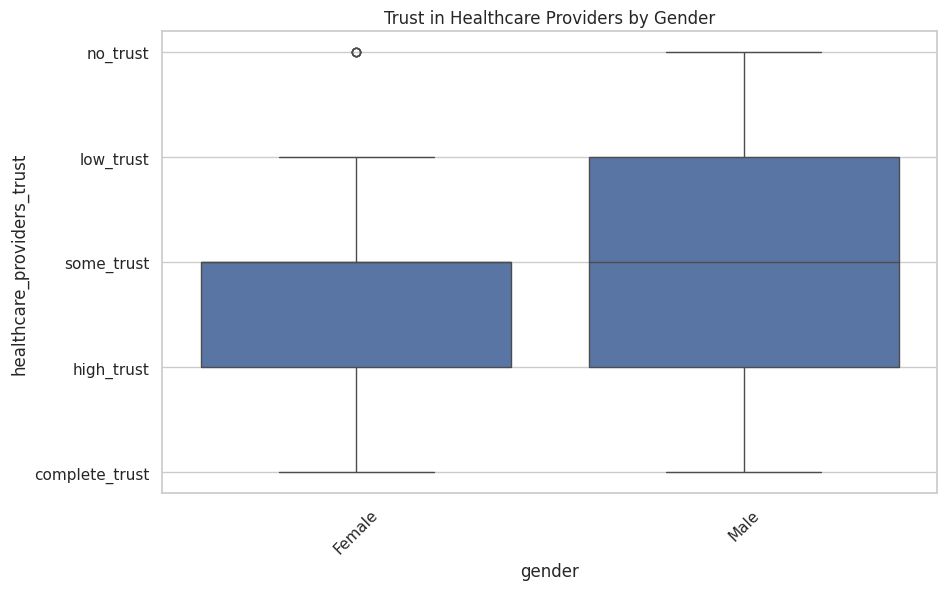


--- Perceived Benefits on Sudden Health Changes by Education ---
education
vocational     76.333333
high_school    79.315789
masters        89.216418
bachelor       93.730263
Name: ranks, dtype: float64


<ipython-input-662-2699693a111f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ranks = data.groupby(group)['ranks'].mean().sort_values()


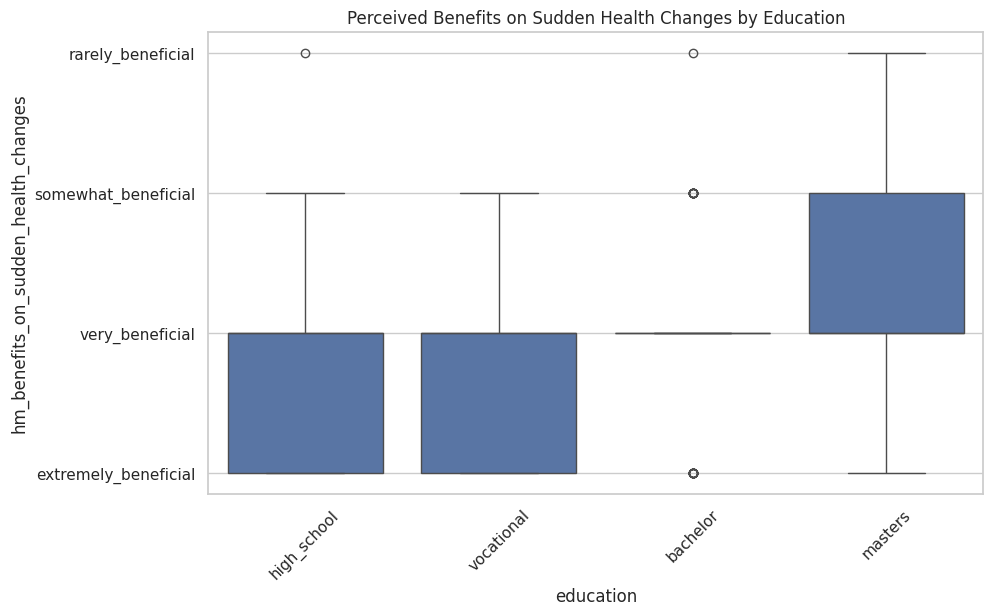

In [662]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to compute mean ranks
def mean_ranks(df, outcome, group):
    data = df[[outcome, group]].dropna()
    ranks = stats.rankdata(data[outcome])
    data['ranks'] = ranks
    mean_ranks = data.groupby(group)['ranks'].mean().sort_values()
    return mean_ranks

# Helper function to plot boxplots
def plot_boxplot(df, outcome, group, title):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=group, y=outcome)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Analysis dictionary
analyses = [
    ('data_misuse_concerns', 'chronic_health_conditions', 'Data Misuse Concerns by Chronic Conditions'),
    ('healthcare_providers_trust', 'gender', 'Trust in Healthcare Providers by Gender'),
    ('hm_benefits_on_sudden_health_changes', 'education', 'Perceived Benefits on Sudden Health Changes by Education')
]

# Run all analyses
for outcome, group, title in analyses:
    print(f"\n--- {title} ---")
    mr = mean_ranks(data, outcome, group)
    print(mr)
    plot_boxplot(data, outcome, group, title)


In [663]:
pip install scikit-posthocs


# Post-hoc Dunn's test (Bonferroni corrected p-values)

**Post-hoc Dunn's test (Bonferroni corrected p-values)**


--- Data Misuse Concerns by Chronic Conditions ---
Kruskal-Wallis H = 8.3148, p = 0.0156

Mean ranks:
chronic_health_conditions
One          72.269231
No           88.627820
Multiple    115.916667
Name: ranks, dtype: float64

Post-hoc Dunn's test (Bonferroni corrected p-values):
          Multiple       No        One
Multiple  1.000000  0.084053  0.011995
No        0.084053  1.000000  0.368822
One       0.011995  0.368822  1.000000


<ipython-input-664-134864f2b11c>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.dropna(subset=[outcome, group]).groupby(group)[outcome].apply(list)
<ipython-input-664-134864f2b11c>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ranks = data.groupby(group)['ranks'].mean().sort_values()


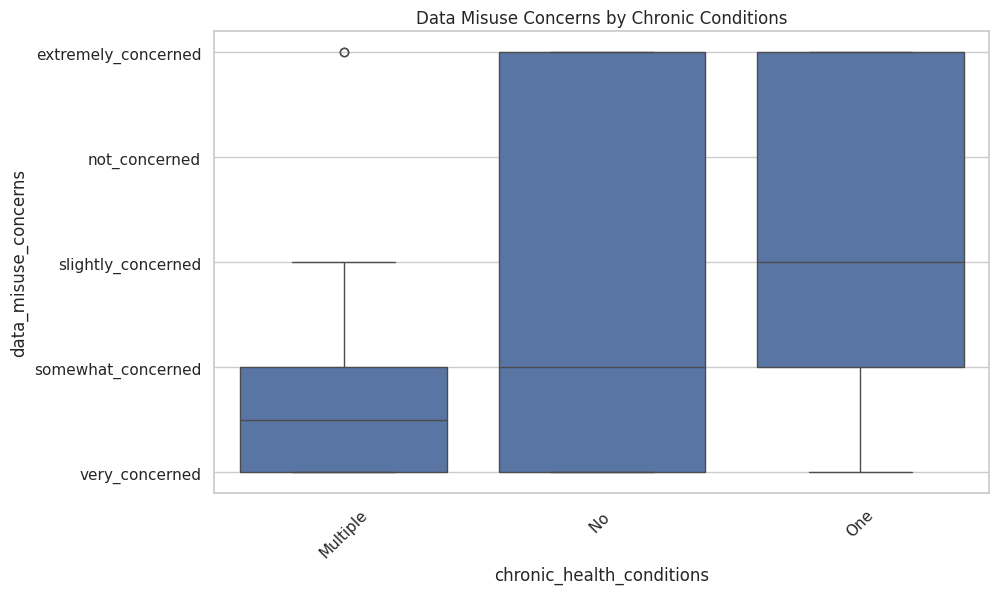


--- Trust in Healthcare Providers by Gender ---
Kruskal-Wallis H = 2.7502, p = 0.0972

Mean ranks:
gender
Female    84.033019
Male      96.415493
Name: ranks, dtype: float64


<ipython-input-664-134864f2b11c>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.dropna(subset=[outcome, group]).groupby(group)[outcome].apply(list)
<ipython-input-664-134864f2b11c>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ranks = data.groupby(group)['ranks'].mean().sort_values()


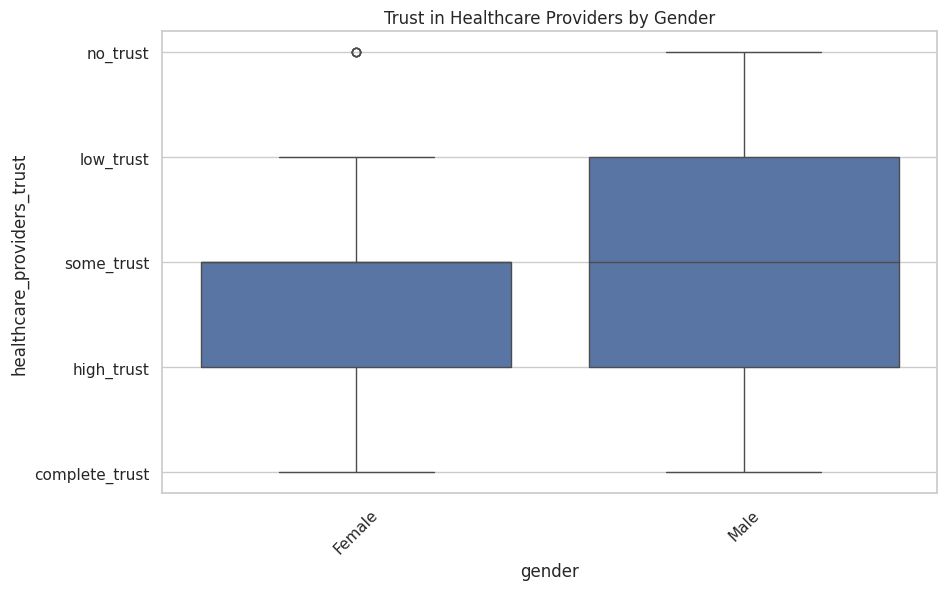


--- Perceived Benefits on Sudden Health Changes by Education ---
Kruskal-Wallis H = 2.7466, p = 0.4324

Mean ranks:
education
vocational     76.333333
high_school    79.315789
masters        89.216418
bachelor       93.730263
Name: ranks, dtype: float64


<ipython-input-664-134864f2b11c>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.dropna(subset=[outcome, group]).groupby(group)[outcome].apply(list)
<ipython-input-664-134864f2b11c>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ranks = data.groupby(group)['ranks'].mean().sort_values()


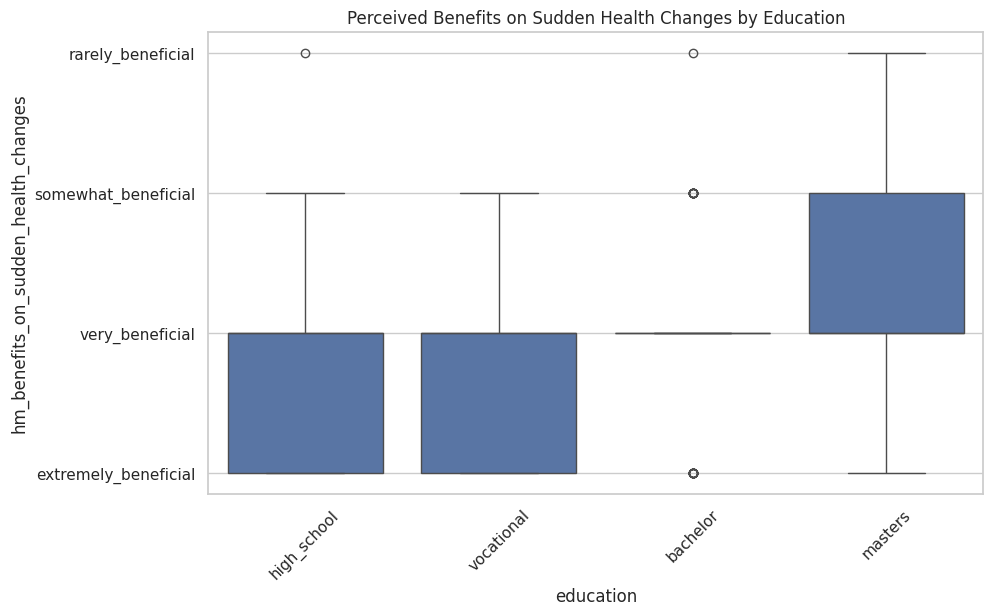


--- Data Misuse Concerns by Chronic Conditions ---
Kruskal-Wallis H = 8.3148, p = 0.0156

Mean ranks:
chronic_health_conditions
One          72.269231
No           88.627820
Multiple    115.916667
Name: ranks, dtype: float64

Post-hoc Dunn's test (Bonferroni corrected p-values):
          Multiple       No        One
Multiple  1.000000  0.084053  0.011995
No        0.084053  1.000000  0.368822
One       0.011995  0.368822  1.000000


<ipython-input-664-134864f2b11c>:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.dropna(subset=[outcome, group]).groupby(group)[outcome].apply(list)
<ipython-input-664-134864f2b11c>:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ranks = data.groupby(group)['ranks'].mean().sort_values()


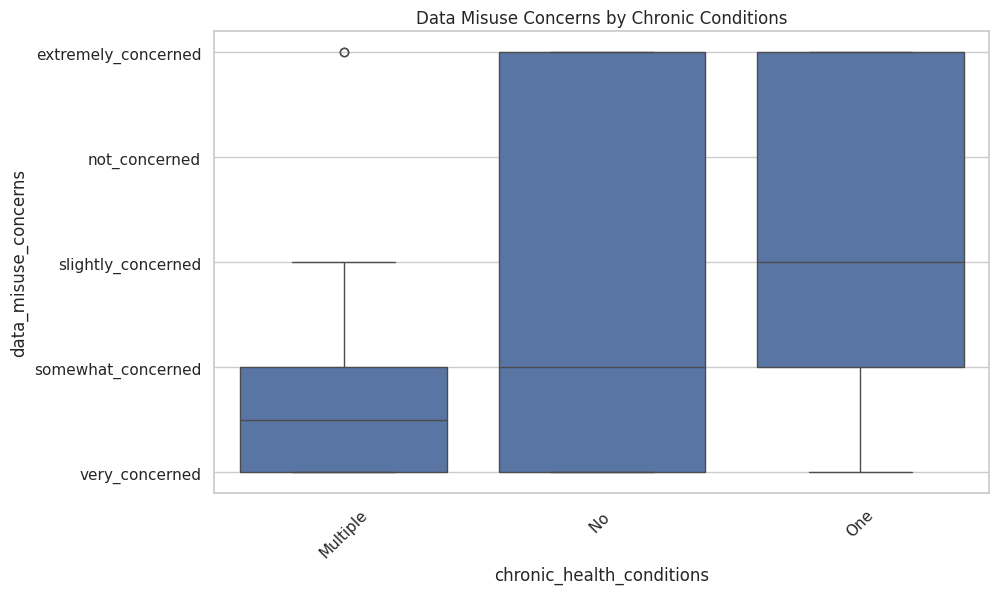


--- Trust in Healthcare Providers by Gender ---
Kruskal-Wallis H = 2.7502, p = 0.0972

Mean ranks:
gender
Female    84.033019
Male      96.415493
Name: ranks, dtype: float64


<ipython-input-664-134864f2b11c>:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.dropna(subset=[outcome, group]).groupby(group)[outcome].apply(list)
<ipython-input-664-134864f2b11c>:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ranks = data.groupby(group)['ranks'].mean().sort_values()


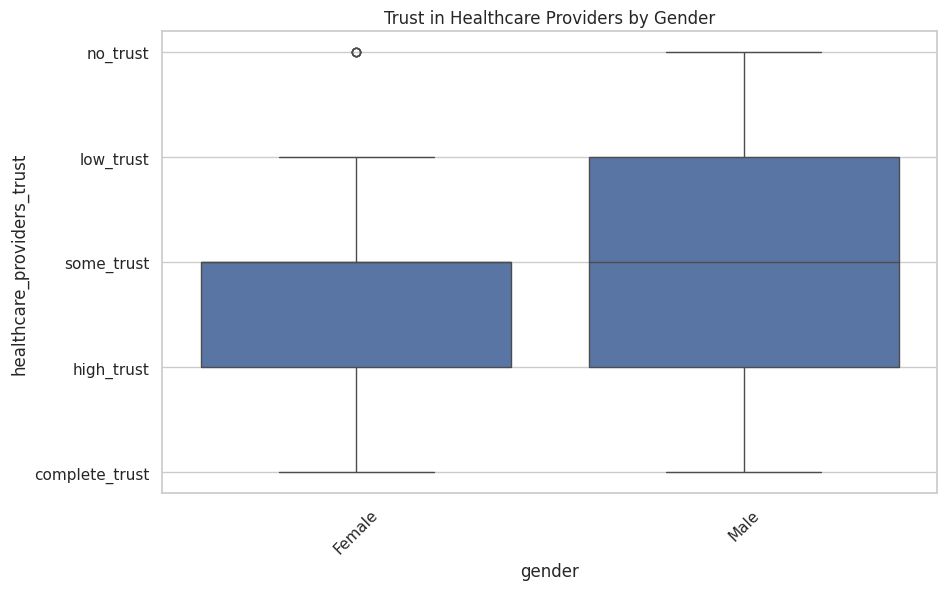


--- Perceived Benefits on Sudden Health Changes by Education ---
Kruskal-Wallis H = 2.7466, p = 0.4324

Mean ranks:
education
vocational     76.333333
high_school    79.315789
masters        89.216418
bachelor       93.730263
Name: ranks, dtype: float64


<ipython-input-664-134864f2b11c>:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.dropna(subset=[outcome, group]).groupby(group)[outcome].apply(list)
<ipython-input-664-134864f2b11c>:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ranks = data.groupby(group)['ranks'].mean().sort_values()


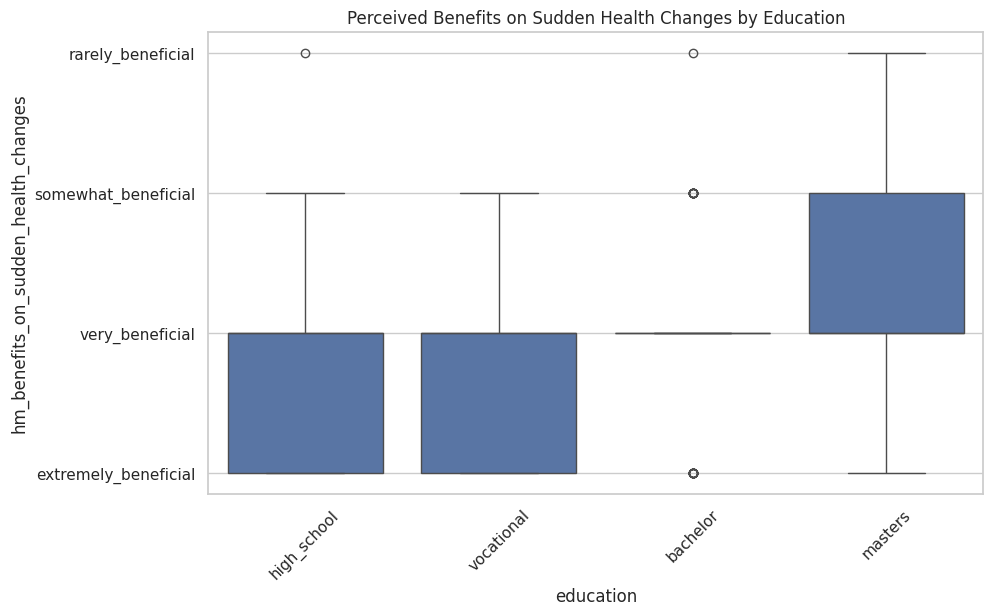

In [664]:
import pandas as pd
import scipy.stats as stats
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp # <== IMPORTANT: install if you don't have

# install scikit-posthocs if needed:
# pip install scikit-posthocs

# Helper: Kruskal-Wallis test
def kruskal_wallis_test(df, outcome, group):
    groups = df.dropna(subset=[outcome, group]).groupby(group)[outcome].apply(list)
    stat, p = stats.kruskal(*groups)
    return stat, p

# Helper: Mean ranks
def mean_ranks(df, outcome, group):
    data = df[[outcome, group]].dropna()
    ranks = stats.rankdata(data[outcome])
    data['ranks'] = ranks
    mean_ranks = data.groupby(group)['ranks'].mean().sort_values()
    return mean_ranks

# Helper: Boxplot
def plot_boxplot(df, outcome, group, title):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=group, y=outcome)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Helper: Dunn’s post-hoc test
def dunns_posthoc(df, outcome, group):
    data = df[[outcome, group]].dropna()
    pvals = sp.posthoc_dunn(data, val_col=outcome, group_col=group, p_adjust='bonferroni')
    return pvals

# Run full analysis
def full_analysis(df, outcome, group, title):
    print(f"\n--- {title} ---")

    # Kruskal-Wallis
    stat, p = kruskal_wallis_test(df, outcome, group)
    print(f"Kruskal-Wallis H = {stat:.4f}, p = {p:.4f}")

    # Mean ranks
    print("\nMean ranks:")
    mr = mean_ranks(df, outcome, group)
    print(mr)

    # Post-hoc if significant
    if p < 0.05:
        print("\nPost-hoc Dunn's test (Bonferroni corrected p-values):")
        dunn = dunns_posthoc(df, outcome, group)
        print(dunn)

    # Boxplot
    plot_boxplot(df, outcome, group, title)

# Your analyses
analyses = [
    ('data_misuse_concerns', 'chronic_health_conditions', 'Data Misuse Concerns by Chronic Conditions'),
    ('healthcare_providers_trust', 'gender', 'Trust in Healthcare Providers by Gender'),
    ('hm_benefits_on_sudden_health_changes', 'education', 'Perceived Benefits on Sudden Health Changes by Education')
]

# Run
for outcome, group, title in analyses:
    full_analysis(data, outcome, group, title)
# pip install scikit-posthocs

# Helper: Kruskal-Wallis test
def kruskal_wallis_test(df, outcome, group):
    groups = df.dropna(subset=[outcome, group]).groupby(group)[outcome].apply(list)
    stat, p = stats.kruskal(*groups)
    return stat, p

# Helper: Mean ranks
def mean_ranks(df, outcome, group):
    data = df[[outcome, group]].dropna()
    ranks = stats.rankdata(data[outcome])
    data['ranks'] = ranks
    mean_ranks = data.groupby(group)['ranks'].mean().sort_values()
    return mean_ranks

# Helper: Boxplot
def plot_boxplot(df, outcome, group, title):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=group, y=outcome)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Helper: Dunn’s post-hoc test
def dunns_posthoc(df, outcome, group):
    data = df[[outcome, group]].dropna()
    pvals = sp.posthoc_dunn(data, val_col=outcome, group_col=group, p_adjust='bonferroni')
    return pvals

# Run full analysis
def full_analysis(df, outcome, group, title):
    print(f"\n--- {title} ---")

    # Kruskal-Wallis
    stat, p = kruskal_wallis_test(df, outcome, group)
    print(f"Kruskal-Wallis H = {stat:.4f}, p = {p:.4f}")

    # Mean ranks
    print("\nMean ranks:")
    mr = mean_ranks(df, outcome, group)
    print(mr)

    # Post-hoc if significant
    if p < 0.05:
        print("\nPost-hoc Dunn's test (Bonferroni corrected p-values):")
        dunn = dunns_posthoc(df, outcome, group)
        print(dunn)

    # Boxplot
    plot_boxplot(df, outcome, group, title)

# Your analyses
analyses = [
    ('data_misuse_concerns', 'chronic_health_conditions', 'Data Misuse Concerns by Chronic Conditions'),
    ('healthcare_providers_trust', 'gender', 'Trust in Healthcare Providers by Gender'),
    ('hm_benefits_on_sudden_health_changes', 'education', 'Perceived Benefits on Sudden Health Changes by Education')
]

# Run
for outcome, group, title in analyses:
    full_analysis(data, outcome, group, title)


# Anxiety and age categories Chi square and contingency table, degrees of freedom

**Anxiety and age categories Chi square and contingency table, degrees of freedom**

In [665]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your DataFrame is called 'data'
# and the variables are 'anxiety' and 'age'

# Step 1: Create a contingency table
contingency_table = pd.crosstab(data['age'], data['anxiety'])

print("Contingency Table:")
print(contingency_table)

# Step 2: Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square test results:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

# Optional: Print expected counts
print("\nExpected counts (under null hypothesis):")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))


Contingency Table:
anxiety     Maybe  No  Yes
age                       
18-24           4   1    9
25-34          14   6   17
35-44          16   8    9
45-54          18  12    3
55-64          21   5   10
65 or more      9   6    9

Chi-square test results:
Chi2 Statistic = 22.8071
Degrees of Freedom = 10
P-value = 0.0115

Expected counts (under null hypothesis):
anxiety         Maybe        No        Yes
age                                       
18-24        6.485876  3.005650   4.508475
25-34       17.141243  7.943503  11.915254
35-44       15.288136  7.084746  10.627119
45-54       15.288136  7.084746  10.627119
55-64       16.677966  7.728814  11.593220
65 or more  11.118644  5.152542   7.728814


#Plotting anxiety responses by age group

**Plotting anxiety responses by age group**


📊 Contingency Table:


anxiety,Maybe,No,Yes
age,,,
18-24,4,1,9
25-34,14,6,17
35-44,16,8,9
45-54,18,12,3
55-64,21,5,10
65 or more,9,6,9



🧪 Chi-Square Test Results:
Chi² Statistic = 22.8071
Degrees of Freedom = 10
P-value = 0.0115
Result: * (p < 0.05)

📈 Expected Counts:


anxiety,Maybe,No,Yes
age,,,
18-24,6.49,3.01,4.51
25-34,17.14,7.94,11.92
35-44,15.29,7.08,10.63
45-54,15.29,7.08,10.63
55-64,16.68,7.73,11.59
65 or more,11.12,5.15,7.73


<Figure size 1000x600 with 0 Axes>

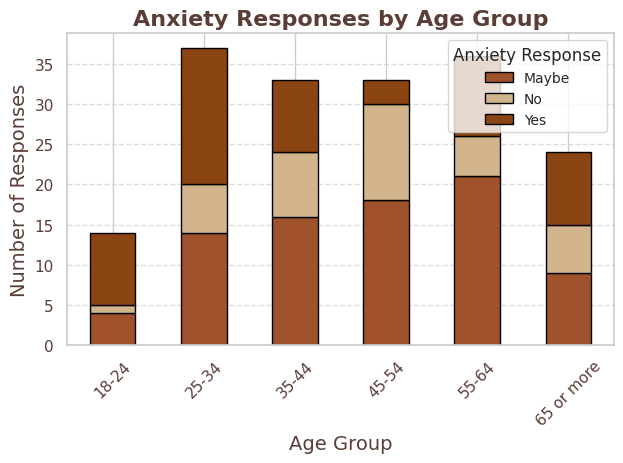

In [666]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Contingency Table
contingency_table = pd.crosstab(data['age'], data['anxiety'])

print("\n📊 Contingency Table:")
display(contingency_table)

# Chi-square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n🧪 Chi-Square Test Results:")
print(f"Chi² Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

# Significance Interpretation
if p < 0.001:
    significance = "*** (p < 0.001)"
elif p < 0.01:
    significance = "** (p < 0.01)"
elif p < 0.05:
    significance = "* (p < 0.05)"
else:
    significance = "ns (not significant)"

print(f"Result: {significance}")

# Expected Counts
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("\n📈 Expected Counts:")
display(expected_df.round(2))

# Ochre/Brown Tones for Visualization
colors = ['#A0522D', '#D2B48C', '#8B4513']  # SaddleBrown, Tan, DarkGoldenrod

# Plot
plt.figure(figsize=(10,6))
contingency_table.plot(kind='bar', stacked=True, color=colors, edgecolor='black')
plt.title('Anxiety Responses by Age Group', fontsize=16, fontweight='bold', color='#5A3E36')
plt.xlabel('Age Group', fontsize=14, color='#5A3E36')
plt.ylabel('Number of Responses', fontsize=14, color='#5A3E36')
plt.xticks(rotation=45, color='#5A3E36')
plt.yticks(color='#5A3E36')
plt.legend(title='Anxiety Response', title_fontsize=12, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Standardized Residuals Heatmap - Anxiety vs Age

Post-hoc Pairwise Comparisons (Chi-square 2x2 tests)

**Standardized Residuals Heatmap - Anxiety vs Age**

**Post-hoc Pairwise Comparisons (Chi-square 2x2 tests)**


📊 Contingency Table:


anxiety,Maybe,No,Yes
age,,,
18-24,4,1,9
25-34,14,6,17
35-44,16,8,9
45-54,18,12,3
55-64,21,5,10
65 or more,9,6,9



🧪 Chi-Square Test Results:
Chi² Statistic = 22.8071
Degrees of Freedom = 10
P-value = 0.0115

📈 Standardized Residuals:


anxiety,Maybe,No,Yes
age,,,
18-24,-0.98,-1.16,2.12
25-34,-0.76,-0.69,1.47
35-44,0.18,0.34,-0.50
45-54,0.69,1.85,-2.34
55-64,1.06,-0.98,-0.47
65 or more,-0.64,0.37,0.46


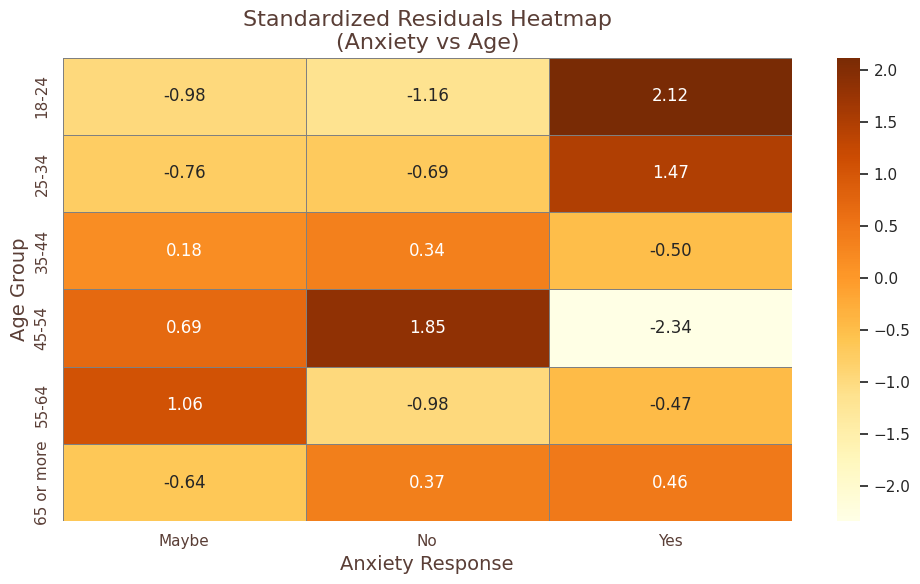


🔎 Post-hoc Pairwise Comparisons (Chi-square 2x2 tests):


,Comparison,Raw p-value,Bonferroni Adjusted p-value
2,18-24 vs 45-54,0.000307,0.004599
6,25-34 vs 45-54,0.002345,0.035174
12,45-54 vs 55-64,0.033967,0.509512
13,45-54 vs 65 or more,0.034267,0.514001
1,18-24 vs 35-44,0.051478,0.772166
3,18-24 vs 55-64,0.057743,0.866150
0,18-24 vs 25-34,0.466167,1.000000
4,18-24 vs 65 or more,0.214817,1.000000
7,25-34 vs 55-64,0.192758,1.000000
5,25-34 vs 35-44,0.264384,1.000000


In [667]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, norm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import statsmodels.stats.multitest as smm

# Contingency Table
contingency_table = pd.crosstab(data['age'], data['anxiety'])

# Chi-square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n📊 Contingency Table:")
display(contingency_table)

print("\n🧪 Chi-Square Test Results:")
print(f"Chi² Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

# Calculate Standardized Residuals
observed = contingency_table.values
standardized_residuals = (observed - expected) / np.sqrt(expected)
standardized_residuals_df = pd.DataFrame(standardized_residuals,
                                         index=contingency_table.index,
                                         columns=contingency_table.columns)

print("\n📈 Standardized Residuals:")
display(standardized_residuals_df.round(2))

# Plot Heatmap of Residuals (Ochre/Brown tones)
plt.figure(figsize=(10,6))
sns.heatmap(standardized_residuals_df, annot=True, cmap='YlOrBr', center=0, fmt='.2f',
            linewidths=0.5, linecolor='gray')
plt.title('Standardized Residuals Heatmap\n(Anxiety vs Age)', fontsize=16, color='#5A3E36')
plt.xlabel('Anxiety Response', fontsize=14, color='#5A3E36')
plt.ylabel('Age Group', fontsize=14, color='#5A3E36')
plt.xticks(color='#5A3E36')
plt.yticks(color='#5A3E36')
plt.tight_layout()
plt.show()

# Post-hoc Pairwise Comparisons (Chi-square 2x2 tests between groups)
pairs = list(combinations(contingency_table.index, 2))
p_values = []

for pair in pairs:
    subset = contingency_table.loc[list(pair)]
    chi2_sub, p_sub, _, _ = chi2_contingency(subset)
    p_values.append(p_sub)

# Adjust p-values (Bonferroni correction)
adjusted_pvals = smm.multipletests(p_values, method='bonferroni')[1]

# Summarize post-hoc results
posthoc_results = pd.DataFrame({
    'Comparison': [f"{a} vs {b}" for a, b in pairs],
    'Raw p-value': p_values,
    'Bonferroni Adjusted p-value': adjusted_pvals
})

print("\n🔎 Post-hoc Pairwise Comparisons (Chi-square 2x2 tests):")
display(posthoc_results.sort_values('Bonferroni Adjusted p-value'))


# Plotting Pairwise Adjusted p-values

**Plotting Pairwise Adjusted p-values**


Polished Post-hoc Pairwise Comparisons:
         Comparison  Raw p-value  Bonferroni Adjusted p-value Significance
     18-24 vs 45-54     0.000307                     0.004599           **
     25-34 vs 45-54     0.002345                     0.035174            *
     45-54 vs 55-64     0.033967                     0.509512             
45-54 vs 65 or more     0.034267                     0.514001             
     18-24 vs 35-44     0.051478                     0.772166             
     18-24 vs 55-64     0.057743                     0.866150             
     18-24 vs 25-34     0.466167                     1.000000             
18-24 vs 65 or more     0.214817                     1.000000             
     25-34 vs 55-64     0.192758                     1.000000             
     25-34 vs 35-44     0.264384                     1.000000             
25-34 vs 65 or more     0.665305                     1.000000             
     35-44 vs 45-54     0.141024                     1.0000

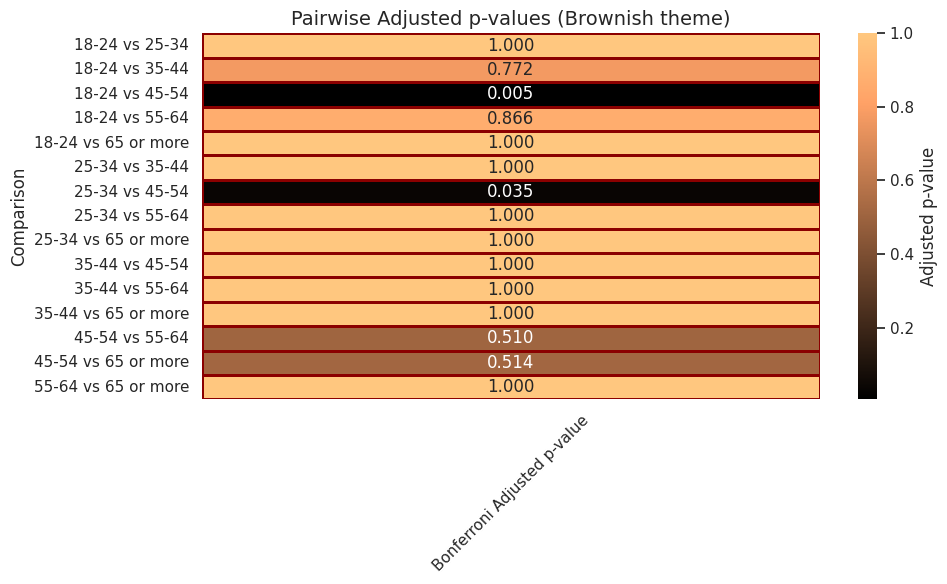

In [668]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your post-hoc pairwise results
data = {
    'Comparison': [
        '18-24 vs 45-54', '25-34 vs 45-54',
        '45-54 vs 55-64', '45-54 vs 65 or more',
        '18-24 vs 35-44', '18-24 vs 55-64', '18-24 vs 25-34', '18-24 vs 65 or more',
        '25-34 vs 55-64', '25-34 vs 35-44', '25-34 vs 65 or more',
        '35-44 vs 45-54', '35-44 vs 65 or more', '35-44 vs 55-64', '55-64 vs 65 or more'
    ],
    'Raw p-value': [
        0.000307, 0.002345,
        0.033967, 0.034267,
        0.051478, 0.057743, 0.466167, 0.214817,
        0.192758, 0.264384, 0.665305,
        0.141024, 0.655162, 0.523975, 0.265867
    ],
    'Bonferroni Adjusted p-value': [
        0.004599, 0.035174,
        0.509512, 0.514001,
        0.772166, 0.866150, 1.000000, 1.000000,
        1.000000, 1.000000, 1.000000,
        1.000000, 1.000000, 1.000000, 1.000000
    ]
}

# Create DataFrame
results = pd.DataFrame(data)

# Add significance stars
results['Significance'] = results['Bonferroni Adjusted p-value'].apply(
    lambda p: '**' if p < 0.01 else ('*' if p < 0.05 else '')
)

# Sort: significant results first
results = results.sort_values(by='Bonferroni Adjusted p-value')

# Print polished table
print("\nPolished Post-hoc Pairwise Comparisons:")
print(results.to_string(index=False))

# Quick Summary
significant = results[results['Significance'] != '']
if not significant.empty:
    comparisons = ' and '.join(significant['Comparison'].tolist())
    print(f"\n\u2728 Significant differences in anxiety reporting were found between {comparisons}.")
else:
    print("\n\u2728 No significant pairwise differences after correction.")

# Visualization: Heatmap of Adjusted p-values
plt.figure(figsize=(10, 6))
sns.heatmap(
    results.pivot_table(index='Comparison', values='Bonferroni Adjusted p-value'),
    cmap='copper', linewidths=1, linecolor='darkred', annot=True, fmt='.3f', cbar_kws={'label': 'Adjusted p-value'}
)
plt.title('Pairwise Adjusted p-values (Brownish theme)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Post-hoc Dunn's Test Results (hm benefits on sudden health changes x Education groups)

**Post-hoc Dunn's Test Results (hm benefits on sudden health changes x Education groups)**

In [669]:
import scikit_posthocs as sp
import pandas as pd

# Load your original DataFrame (assuming it's saved as 'patient_data.pkl')
original_data = pd.read_pickle('data/patient_data.pkl')

# Perform Dunn's test with Bonferroni correction
posthoc_edu = sp.posthoc_dunn(
    original_data,  # Use the original DataFrame
    val_col='hm_benefits_on_sudden_health_changes',
    group_col='education',
    p_adjust='bonferroni'
)

print("\n--- Post-hoc Dunn's Test Results (Education groups) ---")
print(posthoc_edu)


--- Post-hoc Dunn's Test Results (Education groups) ---
             high_school  vocational  bachelor   masters
high_school     1.000000     1.00000  1.000000  0.389736
vocational      1.000000     1.00000  1.000000  0.059190
bachelor        1.000000     1.00000  1.000000  0.052882
masters         0.389736     0.05919  0.052882  1.000000


# Anxiety vs other demopgarphics Chi square and Post-hoc

**Anxiety vs other demopgarphics Chi square and Post-hoc**

In [670]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Load your original DataFrame (assuming it's saved as 'data/patient_data.pkl')
original_data = pd.read_pickle('data/patient_data.pkl')  # Load the original DataFrame

# Variables to compare with anxiety
group_vars = ['gender', 'religion', 'country_of_origin', 'education', 'chronic_health_conditions']  # Corrected column name

# Function to perform Chi-square and post-hoc
def chi_square_with_posthoc(data, group_var, target_var='anxiety'):
    print(f"\n--- {target_var.capitalize()} vs {group_var.capitalize()} ---")

    contingency_table = pd.crosstab(data[group_var], data[target_var])
    print("\nContingency Table:")
    print(contingency_table)

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("\nChi-square Test Results:")
    print(f"Chi2 Statistic = {chi2:.4f}")
    print(f"Degrees of Freedom = {dof}")
    print(f"P-value = {p:.4f}")

    if p < 0.05:
        print("\nChi-square is significant! Running post-hoc pairwise comparisons...")
        # Post-hoc 2x2 comparisons
        categories = contingency_table.index.tolist()
        pairs = list(combinations(categories, 2))
        raw_pvals = []
        comparisons = []

        for cat1, cat2 in pairs:
            sub_table = contingency_table.loc[[cat1, cat2]]
            chi2_sub, p_sub, _, _ = chi2_contingency(sub_table)
            raw_pvals.append(p_sub)
            comparisons.append(f"{cat1} vs {cat2}")

        # Bonferroni correction
        reject, pvals_corrected, _, _ = multipletests(raw_pvals, method='bonferroni')

        # Organize results
        posthoc_results = pd.DataFrame({
            'Comparison': comparisons,
            'Raw p-value': raw_pvals,
            'Bonferroni Adjusted p-value': pvals_corrected,
            'Significant': reject
        }).sort_values('Bonferroni Adjusted p-value')

        print("\nPost-hoc Pairwise Comparisons (Bonferroni corrected):")
        print(posthoc_results.to_string(index=False))
    else:
        print("\nChi-square is not significant. No post-hoc comparisons needed.")

# Loop through group variables using the original DataFrame
for var in group_vars:
    chi_square_with_posthoc(original_data, group_var=var) # Pass original_data to the function


--- Anxiety vs Gender ---

Contingency Table:
anxiety  Maybe  No  Yes
gender                 
Female      56  16   34
Male        26  22   23

Chi-square Test Results:
Chi2 Statistic = 7.4148
Degrees of Freedom = 2
P-value = 0.0245

Chi-square is significant! Running post-hoc pairwise comparisons...

Post-hoc Pairwise Comparisons (Bonferroni corrected):
    Comparison  Raw p-value  Bonferroni Adjusted p-value  Significant
Female vs Male     0.024541                     0.024541         True

--- Anxiety vs Religion ---

Contingency Table:
anxiety              Maybe  No  Yes
religion                           
Anglican                 1   0    0
Anglican                 1   0    0
Asatru                   1   0    0
Atheist                  1   0    0
Atheist                  1   0    0
...                    ...  ..  ...
non-relgious             0   0    1
non-religious            1   1    0
non-religious            2   0    0
spiritual personal       1   0    0
no_answer             

# Standardized Residuals Heatmap: Anxiety vs Gender

**Standardized Residuals Heatmap: Anxiety vs Gender**

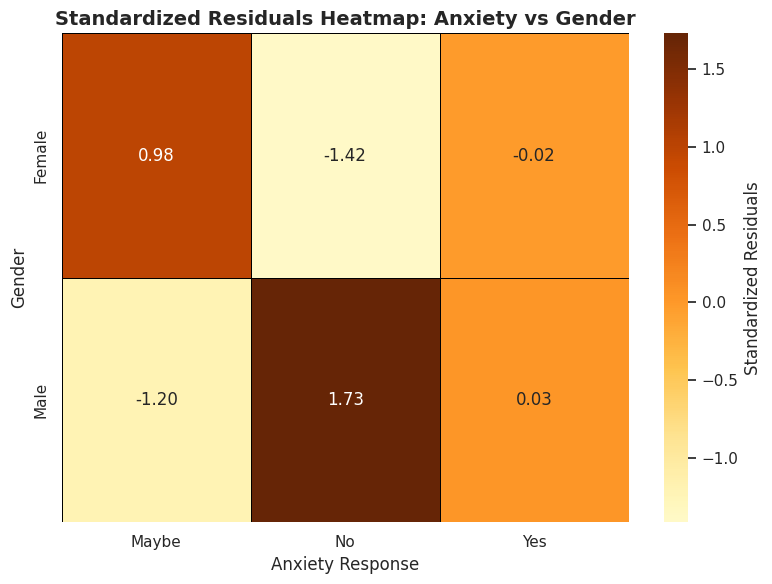

In [671]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Contingency table from your results
contingency_table = pd.DataFrame({
    'Maybe': [56, 26],
    'No': [16, 22],
    'Yes': [34, 23]
}, index=['Female', 'Male'])

# Perform Chi-square test to get expected counts
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate standardized residuals
observed = contingency_table.values
std_residuals = (observed - expected) / np.sqrt(expected)

# Create a DataFrame for easier plotting
std_residuals_df = pd.DataFrame(std_residuals,
                                index=contingency_table.index,
                                columns=contingency_table.columns)

# Plotting the standardized residuals heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(std_residuals_df,
            annot=True,
            cmap='YlOrBr',  # yellow-orange-brown palette
            center=0,
            linewidths=0.5,
            linecolor='black',
            cbar_kws={'label': 'Standardized Residuals'},
            fmt=".2f")

plt.title('Standardized Residuals Heatmap: Anxiety vs Gender', fontsize=14, fontweight='bold')
plt.ylabel('Gender')
plt.xlabel('Anxiety Response')
plt.tight_layout()
plt.show()


# CHI-square TESTS: Sociodemographics vs. Health Monitoring Perceptions on Well-being

In [672]:
def chi_square_with_posthoc(data, outcome_var, group_var, bonferroni=True):
    print(f"\n\n--- {outcome_var} vs {group_var} ---")

    # Contingency table
    table = pd.crosstab(data[group_var], data[outcome_var])

    # Remove empty rows and columns
    table = table.loc[(table.sum(axis=1) > 0), (table.sum(axis=0) > 0)]

    print("\nContingency Table (after cleaning):")
    print(table)

    if table.shape[0] < 2 or table.shape[1] < 2:
        print("\nNot enough data to run Chi-square (need at least 2x2 table). Skipping...\n")
        return

    # Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print("\nChi-square Test Results:")
    print(f"Chi2 Statistic = {chi2:.4f}")
    print(f"Degrees of Freedom = {dof}")
    print(f"P-value = {p:.4f}")

    if p < 0.05:
        print("\nChi-square is significant! Running post-hoc pairwise comparisons...\n")

        # Post-hoc pairwise Chi-square (2x2 tables)
        pairs = list(itertools.combinations(table.index, 2))
        p_values = []

        for pair in pairs:
            sub_table = table.loc[list(pair)]
            if sub_table.shape[0] < 2 or sub_table.shape[1] < 2:
                p_values.append(1.0)  # If not a valid 2x2 table, assign p=1.0
                continue
            chi2_pair, p_pair, _, _ = stats.chi2_contingency(sub_table)
            p_values.append(p_pair)

        # Bonferroni correction
        if bonferroni:
            corrected = multipletests(p_values, method='bonferroni')
            p_values_corrected = corrected[1]
        else:
            p_values_corrected = p_values

        # Summarize post-hoc results
        posthoc_results = pd.DataFrame({
            'Comparison': [f"{pair[0]} vs {pair[1]}" for pair in pairs],
            'Raw p-value': p_values,
            'Bonferroni Adjusted p-value': p_values_corrected,
            'Significant': p_values_corrected < 0.05
        })
        print(posthoc_results)

        # Standardized residuals heatmap
        residuals = (table - expected) / np.sqrt(expected)
        plt.figure(figsize=(8,6))
        sns.heatmap(residuals, annot=True, cmap='copper', center=0, fmt=".2f")
        plt.title(f"Standardized Residuals Heatmap: {outcome_var} vs {group_var}")
        plt.show()

    else:
        print("\nChi-square is NOT significant. Skipping post-hoc and heatmap.\n")


In [673]:
# Ensure that 'gender' and other relevant grouping variables are in your DataFrame's columns
# For example, if your original DataFrame is in 'original_data', copy it:
data = original_data.copy()

# If gender is actually represented as 'Gender' in your DataFrame:
data.rename(columns={'Gender': 'gender'}, inplace=True)  # Adjust if a different casing is used

# Now run your chi-square function:
#chi_square_with_posthoc(data, outcome_var, group_var)

In [674]:
import pandas as pd
import numpy as np
from scipy import stats # Added import for stats
import itertools
from scipy.stats import chi2_contingency
from itertools import combinations
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

def chi_square_with_posthoc(data, outcome_var, group_var, bonferroni=True):
    print(f"\n\n--- {outcome_var} vs {group_var} ---")

    # Contingency table
    table = pd.crosstab(data[group_var], data[outcome_var])

    # Remove empty rows and columns
    table = table.loc[(table.sum(axis=1) > 0), (table.sum(axis=0) > 0)]

    print("\nContingency Table (after cleaning):")
    print(table)

    # Check if the table has enough data for the Chi-square test
    # The Chi-square test is valid only if each cell has an expected frequency of at least 5.
    # We'll use a more relaxed condition here: at least 1 observation in each cell
    if table.shape[0] < 2 or table.shape[1] < 2 or np.any(table.values < 1):
        print("\nNot enough data to run Chi-square (need at least 2x2 table and at least 1 observation in each cell). Skipping...\n")
        return  # Exit the function if not enough data

    # Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(table) # changed chi2_contingency to stats.chi2_contingency
    print("\nChi-square Test Results:")
    print(f"Chi2 Statistic = {chi2:.4f}")
    print(f"Degrees of Freedom = {dof}")
    print(f"P-value = {p:.4f}")

    if p < 0.05:
        print("\nChi-square is significant! Running post-hoc pairwise comparisons...\n")

        # Post-hoc pairwise Chi-square (2x2 tables)
        pairs = list(itertools.combinations(table.index, 2))
        p_values = []

        for pair in pairs:
            sub_table = table.loc[list(pair)] #This line was not indented correctly

            # Clean the sub_table
            sub_table = sub_table.loc[(sub_table.sum(axis=1) > 0), (sub_table.sum(axis=0) > 0)]

            # Check again for a valid 2x2 table
            if sub_table.shape[0] < 2 or sub_table.shape[1] < 2 or np.any(sub_table.values < 1):
                p_values.append(1.0)  # If not valid, assign p=1.0
                continue

            # Perform chi-square
            chi2_pair, p_pair, _, _ = stats.chi2_contingency(sub_table)
            p_values.append(p_pair)


        # Bonferroni correction
        if bonferroni:
            corrected = multipletests(p_values, method='bonferroni')
            p_values_corrected = corrected[1]
        else:
            p_values_corrected = p_values

        # Summarize post-hoc results
        posthoc_results = pd.DataFrame({
            'Comparison': [f"{pair[0]} vs {pair[1]}" for pair in pairs],
            'Raw p-value': p_values,
            'Bonferroni Adjusted p-value': p_values_corrected,
            'Significant': p_values_corrected < 0.05
        })
        print(posthoc_results)

        # Standardized residuals heatmap
        residuals = (table - expected) / np.sqrt(expected)
        plt.figure(figsize=(8,6))
        sns.heatmap(residuals, annot=True, cmap='copper', center=0, fmt=".2f")
        plt.title(f"Standardized Residuals Heatmap: {outcome_var} vs {group_var}")
        plt.show()

    else:
        print("\nChi-square is NOT significant. Skipping post-hoc and heatmap.\n")

In [675]:
def chi_square_with_posthoc(data, outcome_var, group_var, bonferroni=True):
    print(f"\n\n--- {outcome_var} vs {group_var} ---")

    # Contingency table
    table = pd.crosstab(data[group_var], data[outcome_var])

    # Remove empty rows and columns
    table = table.loc[(table.sum(axis=1) > 0), (table.sum(axis=0) > 0)]

    print("\nContingency Table (after cleaning):")
    print(table)

    # Check if the table has enough shape
    if table.shape[0] < 2 or table.shape[1] < 2:
        print("\nNot enough groups or categories to run Chi-square. Skipping...\n")
        return

    try:
        # Chi-square test
        chi2, p, dof, expected = stats.chi2_contingency(table)
        print("\nChi-square Test Results:")
        print(f"Chi2 Statistic = {chi2:.4f}")
        print(f"Degrees of Freedom = {dof}")
        print(f"P-value = {p:.4f}")

        if p < 0.05:
            print("\nChi-square is significant! Running post-hoc pairwise comparisons...\n")

            # Post-hoc pairwise Chi-square (2x2 tables)
            pairs = list(itertools.combinations(table.index, 2))
            p_values = []

            for pair in pairs:
                sub_table = table.loc[list(pair)]
                if sub_table.shape[0] < 2 or sub_table.shape[1] < 2:
                    p_values.append(1.0)
                    continue
                chi2_pair, p_pair, _, _ = stats.chi2_contingency(sub_table)
                p_values.append(p_pair)

            # Bonferroni correction
            if bonferroni:
                corrected = multipletests(p_values, method='bonferroni')
                p_values_corrected = corrected[1]
            else:
                p_values_corrected = p_values

            # Summarize post-hoc results
            posthoc_results = pd.DataFrame({
                'Comparison': [f"{pair[0]} vs {pair[1]}" for pair in pairs],
                'Raw p-value': p_values,
                'Bonferroni Adjusted p-value': p_values_corrected,
                'Significant': p_values_corrected < 0.05
            })
            print(posthoc_results)

            # Standardized residuals heatmap
            residuals = (table - expected) / np.sqrt(expected)
            plt.figure(figsize=(8,6))
            sns.heatmap(residuals, annot=True, cmap='copper', center=0, fmt=".2f")
            plt.title(f"Standardized Residuals Heatmap: {outcome_var} vs {group_var}")
            plt.show()

        else:
            print("\nChi-square is NOT significant. Skipping post-hoc and heatmap.\n")

    except ValueError as e:
        print(f"\nSkipping due to error: {e}\n")


In [676]:
# Correct the column name in the rename operation, replacing the original column name (with the special character)
data.rename(columns={'health_monitoring_perceptions_on__well-being': 'health_monitoring_perceptions_on_well-being'}, inplace=True)

In [677]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

def chi_square_with_posthoc(data, outcome_var, group_var, bonferroni=True):
    print(f"\n\n--- {outcome_var} vs {group_var} ---")

    # Contingency table
    table = pd.crosstab(data[group_var], data[outcome_var])

    # Remove empty rows and columns
    table = table.loc[(table.sum(axis=1) > 0), (table.sum(axis=0) > 0)]

    print("\nContingency Table (after cleaning):")
    print(table)

    # Check if the table has enough data for the Chi-square test
    if table.shape[0] < 2 or table.shape[1] < 2 or np.any(table.values < 1):
        print("\nNot enough data to run Chi-square (need at least 2x2 table and at least 1 observation in each cell). Skipping...\n")
        return

    # Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print("\nChi-square Test Results:")
    print(f"Chi2 Statistic = {chi2:.4f}")
    print(f"Degrees of Freedom = {dof}")
    print(f"P-value = {p:.4f}")

    if p < 0.05:
        print("\nChi-square is significant! Running post-hoc pairwise comparisons...\n")

        # Post-hoc pairwise Chi-square (2x2 tables)
        pairs = list(itertools.combinations(table.index, 2))
        p_values = []

        for pair in pairs:
            sub_table = table.loc[list(pair)]

            # Clean the sub_table
            sub_table = sub_table.loc[(sub_table.sum(axis=1) > 0), (sub_table.sum(axis=0) > 0)]

            # Check for valid 2x2 table
            if sub_table.shape[0] < 2 or sub_table.shape[1] < 2 or np.any(sub_table.values < 1):
                p_values.append(1.0)  # Skip invalid
                continue

            # Perform Chi-square
            chi2_pair, p_pair, _, _ = stats.chi2_contingency(sub_table)
            p_values.append(p_pair)

        # Bonferroni correction
        if bonferroni:
            corrected = multipletests(p_values, method='bonferroni')
            p_values_corrected = corrected[1]
        else:
            p_values_corrected = p_values

        # Summarize post-hoc results
        posthoc_results = pd.DataFrame({
            'Comparison': [f"{pair[0]} vs {pair[1]}" for pair in pairs],
            'Raw p-value': p_values,
            'Bonferroni Adjusted p-value': p_values_corrected,
            'Significant': p_values_corrected < 0.05
        })
        print(posthoc_results)

        # Standardized residuals heatmap
        residuals = (table - expected) / np.sqrt(expected)
        plt.figure(figsize=(10,8))
        sns.heatmap(residuals, annot=True, cmap='copper', center=0, fmt=".2f")
        plt.title(f"Standardized Residuals Heatmap: {outcome_var} vs {group_var}")
        plt.show()

    else:
        print("\nChi-square is NOT significant. Skipping post-hoc and heatmap.\n")


In [678]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assume df is your dataframe

# Sociodemographic variables to test
sociodemographic_vars = ['age', 'gender', 'country_of_origin', 'education', 'religion', 'chronic_health_conditions']

# Outcome variable
outcome_var = 'health_monitoring_perceptions_on_well-being'

print("\n--- Chi-square tests: Sociodemographics vs. Health Monitoring Perceptions on Well-being ---")

# Loop through each socio-demographic variable
for socio_var in sociodemographic_vars:
    print(f"\n{socio_var} vs {outcome_var}")

    # Create a contingency table
    contingency_table = pd.crosstab(data[socio_var], data[outcome_var])

    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print(f"Chi2 Statistic = {chi2:.2f}")
    print(f"Degrees of Freedom = {dof}")
    print(f"P-value = {p:.4f}")

    if p < 0.05:
        print("Result: Significant association (p < .05)")
    else:
        print("Result: No significant association (p >= .05)")



--- Chi-square tests: Sociodemographics vs. Health Monitoring Perceptions on Well-being ---

age vs health_monitoring_perceptions_on_well-being
Chi2 Statistic = 5.30
Degrees of Freedom = 10
P-value = 0.8705
Result: No significant association (p >= .05)

gender vs health_monitoring_perceptions_on_well-being
Chi2 Statistic = 3.77
Degrees of Freedom = 2
P-value = 0.1516
Result: No significant association (p >= .05)

country_of_origin vs health_monitoring_perceptions_on_well-being
Chi2 Statistic = 140.91
Degrees of Freedom = 118
P-value = 0.0739
Result: No significant association (p >= .05)

education vs health_monitoring_perceptions_on_well-being
Chi2 Statistic = 10.27
Degrees of Freedom = 6
P-value = 0.1139
Result: No significant association (p >= .05)

religion vs health_monitoring_perceptions_on_well-being
Chi2 Statistic = 150.78
Degrees of Freedom = 142
P-value = 0.2912
Result: No significant association (p >= .05)

chronic_health_conditions vs health_monitoring_perceptions_on_well-b

# CHI-square AND POST-HOC OF: 'active_data_monitoring', 'hm_program_participation_willingness','data_integration', health_monitoring_perceptions_on_well-being','data_reliability' VS SOCIODEMOGRAPHICS

**Chi-square and Post-hoc of:**

'active_data_monitoring'

'hm_program_participation_willingness'

'data_integration'

'health_monitoring_perceptions_on_well-being'

'data_reliability'

**vs sociodemographics**



--- active_data_monitoring vs gender ---

Contingency Table (after cleaning):
active_data_monitoring  At times  No  Yes
gender                                   
Female                        27  25   54
Male                          21  16   34

Chi-square Test Results:
Chi2 Statistic = 0.3644
Degrees of Freedom = 2
P-value = 0.8334

Chi-square is NOT significant. Skipping post-hoc and heatmap.



--- active_data_monitoring vs religion ---

Contingency Table (after cleaning):
active_data_monitoring  At times  No  Yes
religion                                 
Anglican                       1   0    0
Anglican                       0   1    0
Asatru                         1   0    0
Atheist                        0   0    1
Atheist                        0   0    1
...                          ...  ..  ...
non-relgious                   0   0    1
non-religious                  1   0    1
non-religious                  1   1    0
spiritual personal             1   0    0
no_answer   

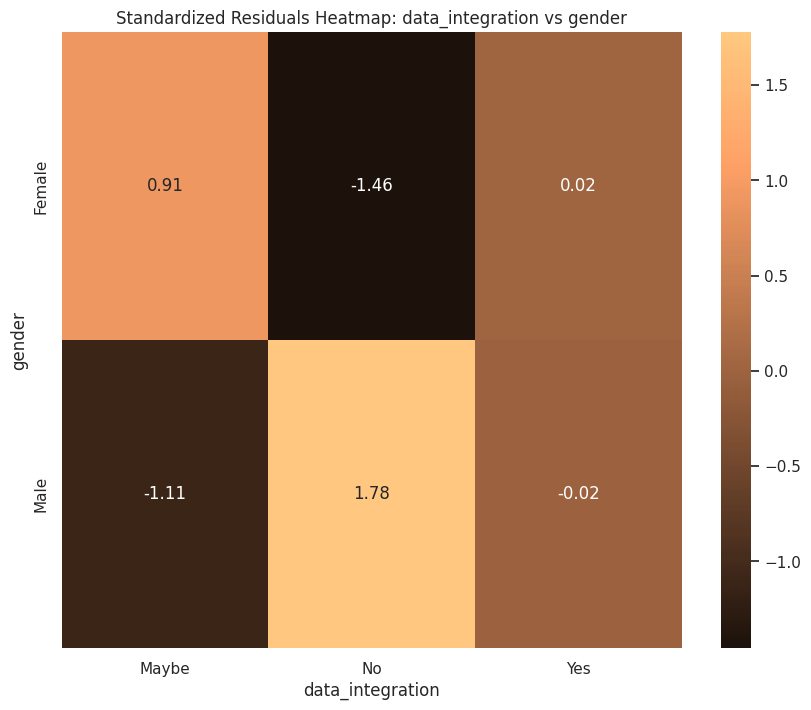



--- data_integration vs religion ---

Contingency Table (after cleaning):
data_integration     Maybe  No  Yes
religion                           
Anglican                 0   0    1
Anglican                 0   0    1
Asatru                   0   0    1
Atheist                  0   0    1
Atheist                  0   0    1
...                    ...  ..  ...
non-relgious             0   0    1
non-religious            2   0    0
non-religious            1   0    1
spiritual personal       1   0    0
no_answer                3   1    7

[72 rows x 3 columns]

Not enough data to run Chi-square (need at least 2x2 table and at least 1 observation in each cell). Skipping...



--- data_integration vs country_of_origin ---

Contingency Table (after cleaning):
data_integration           Maybe  No  Yes
country_of_origin                        
1963                           0   0    1
Argentina                      1   0    0
Australia                      5   3   16
Australia              

In [679]:
outcome_variables = ['active_data_monitoring', 'hm_program_participation_willingness', 'data_integration', 'health_monitoring_perceptions_on_well-being', 'data_reliability']
grouping_variables = ['gender', 'religion', 'country_of_origin', 'education', 'chronic_health_conditions']

for outcome_var in outcome_variables:
    for group_var in grouping_variables:
        chi_square_with_posthoc(data, outcome_var, group_var)


# COUNTS AND PERCENTAGES FOR: PROGRAM PARTICIPATION WILLINGNESS, DATA INTEGRATION, PERCEPTIONS ON WELL-BEING, ACTIVE DATA MONITORING, CONSENT, ANXIETY, DATA RELIABILITY

**Counts and percentages for MC questions**

In [680]:
import pandas as pd

# List of columns/features to analyze
columns_of_interest = [
    'hm_program_participation_willingness',
    'data_integration',
    'health_monitoring_perceptions_on_well-being',
    'active_data_monitoring',
    'consent',
    'anxiety',
    'data_reliability'
]

# Function to get counts and percentages for each column
def get_counts_and_percentages(dataframe, columns):
    for column in columns:
        print(f"\n--- {column.upper()} ---")
        counts = dataframe[column].value_counts(dropna=False)  # Include NaN values if needed
        percentages = (counts / len(dataframe)) * 100  # Calculate percentages
        result = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
        print(result)

# Apply the function to your dataset
get_counts_and_percentages(data, columns_of_interest)



--- HM_PROGRAM_PARTICIPATION_WILLINGNESS ---
                                      Count  Percentage
hm_program_participation_willingness                   
Yes                                     108       61.02
Maybe                                    50       28.25
No                                       19       10.73

--- DATA_INTEGRATION ---
                  Count  Percentage
data_integration                   
Yes                 115       64.97
Maybe                44       24.86
No                   18       10.17

--- HEALTH_MONITORING_PERCEPTIONS_ON_WELL-BEING ---
                                             Count  Percentage
health_monitoring_perceptions_on_well-being                   
Yes                                            123       69.49
Maybe                                           46       25.99
No                                               8        4.52

--- ACTIVE_DATA_MONITORING ---
                        Count  Percentage
active_data_monitoring    

#CIA APA STYLE FOR: PROGRAM PARTICIPATION WILLINGNESS, DATA INTEGRATION, PERCEPTIONS ON WELL-BEING, ACTIVE DATA MONITORING, CONSENT, ANXIETY, DATA RELIABILITY

**CI APA style reporting**

In [681]:
import math

# Function to calculate the Wilson score confidence interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)

    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator

    return lower_bound, upper_bound

# Sample size (n)
n = 177

# Data
categories = {
    "HM_PROGRAM_PARTICIPATION_WILLINGNESS": {
        "Yes": 61.02,
        "Maybe": 28.25,
        "No": 10.73
    },
    "DATA_INTEGRATION": {
        "Yes": 64.97,
        "Maybe": 24.86,
        "No": 10.17
    },
    "HEALTH_MONITORING_PERCEPTIONS_ON_WELL_BEING": {
        "Yes": 69.49,
        "Maybe": 25.99,
        "No": 4.52
    },
    "ACTIVE_DATA_MONITORING": {
        "Yes": 49.72,
        "At times": 27.12,
        "No": 23.16
    },
    "CONSENT": {
        "Opt-in, opt-out at any time": 84.18,
        "One time consent": 9.60,
        "I would not consent at all": 5.65,
        "Other": 0.56
    },
    "ANXIETY": {
        "Maybe": 46.33,
        "Yes": 32.20,
        "No": 21.47
    },
    "DATA_RELIABILITY": {
        "Yes": 59.32,
        "Maybe": 33.33,
        "No": 7.34
    }
}

# Calculating CI for each category
for category, values in categories.items():
    print(f"\n--- {category} ---")
    for value, percentage in values.items():
        p = percentage / 100  # Convert percentage to decimal
        lower_bound, upper_bound = wilson_score_interval(p, n)
        print(f"{value}: {percentage}% (95% CI [{lower_bound*100:.2f}%, {upper_bound*100:.2f}%])")



--- HM_PROGRAM_PARTICIPATION_WILLINGNESS ---
Yes: 61.02% (95% CI [53.67%, 67.90%])
Maybe: 28.25% (95% CI [22.13%, 35.29%])
No: 10.73% (95% CI [6.98%, 16.15%])

--- DATA_INTEGRATION ---
Yes: 64.97% (95% CI [57.69%, 71.61%])
Maybe: 24.86% (95% CI [19.07%, 31.72%])
No: 10.17% (95% CI [6.53%, 15.50%])

--- HEALTH_MONITORING_PERCEPTIONS_ON_WELL_BEING ---
Yes: 69.49% (95% CI [62.35%, 75.80%])
Maybe: 25.99% (95% CI [20.09%, 32.91%])
No: 4.52% (95% CI [2.31%, 8.66%])

--- ACTIVE_DATA_MONITORING ---
Yes: 49.72% (95% CI [42.44%, 57.01%])
At times: 27.12% (95% CI [21.11%, 34.10%])
No: 23.16% (95% CI [17.56%, 29.91%])

--- CONSENT ---
Opt-in, opt-out at any time: 84.18% (95% CI [78.09%, 88.82%])
One time consent: 9.6% (95% CI [6.08%, 14.84%])
I would not consent at all: 5.65% (95% CI [3.10%, 10.09%])
Other: 0.56% (95% CI [0.10%, 3.12%])

--- ANXIETY ---
Maybe: 46.33% (95% CI [39.14%, 53.68%])
Yes: 32.2% (95% CI [25.76%, 39.40%])
No: 21.47% (95% CI [16.06%, 28.09%])

--- DATA_RELIABILITY ---
Yes: 

# PERCENTAGES AND CI APA STYLE ENTITIES INFLUENCE

**Percentages for answers in Likert scale question about entities influence in PHI**

In [682]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['entity_inflence__in_adoption'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

moderately_influential: 40.11% (95% CI [33.18%, 47.47%])
very_influential: 26.55% (95% CI [20.6%, 33.51%])
slightly_influential: 14.12% (95% CI [9.75%, 20.02%])
not_influential: 9.6% (95% CI [6.08%, 14.84%])
extremely_influential: 9.6% (95% CI [6.08%, 14.84%])


# CIA APA STYLE ATTITUDES TOWARD HM FOR HEALTH

In [683]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['attitudes_towards_hm_for_health'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

approve: 54.24% (95% CI [46.89%, 61.41%])
indifferent: 20.34% (95% CI [15.07%, 26.87%])
strongly_approve: 17.51% (95% CI [12.62%, 23.79%])
disapprove: 5.65% (95% CI [3.1%, 10.09%])
strongly_disapprove: 2.26% (95% CI [0.88%, 5.67%])


# ADOPTION HESITATION FACTORS COUNTS, PERCENTAGES AND CI APA STYLE

**Counts, percentages and CI APA style for reasons for hesitation of PHI**

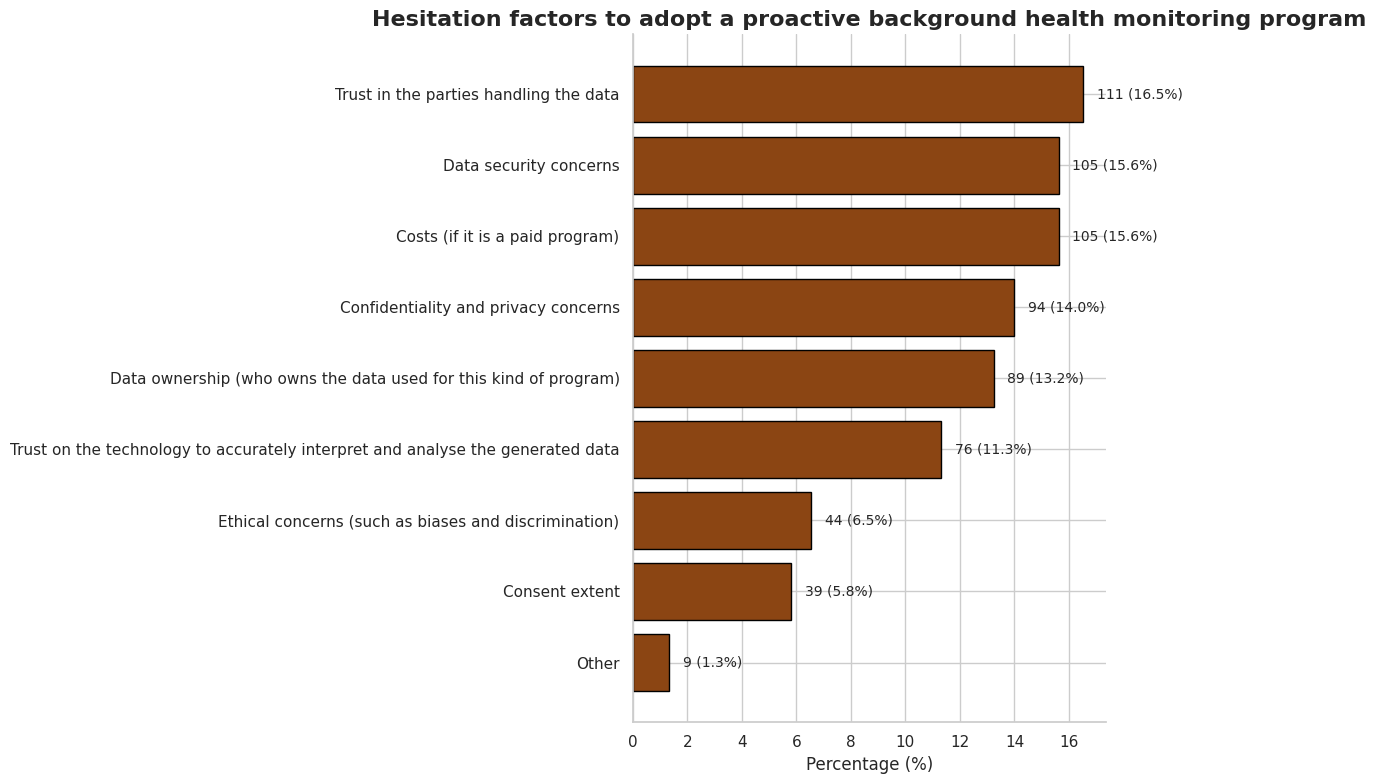

                                             Concern  Count  \
2             Trust in the parties handling the data    111   
0                             Data security concerns    105   
4                    Costs (if it is a paid program)    105   
1               Confidentiality and privacy concerns     94   
7  Data ownership (who owns the data used for thi...     89   
6  Trust on the technology to accurately interpre...     76   
5  Ethical concerns (such as biases and discrimin...     44   
3                                     Consent extent     39   
8                                              Other      9   

                        APA Format  
2  16.52% (95% CI [13.71%, 0.19%])  
0  15.62% (95% CI [12.88%, 0.18%])  
4  15.62% (95% CI [12.88%, 0.18%])  
1  13.99% (95% CI [11.37%, 0.17%])  
7  13.24% (95% CI [10.68%, 0.16%])  
6   11.31% (95% CI [8.91%, 0.14%])  
5    6.55% (95% CI [4.68%, 0.08%])  
3    5.80% (95% CI [4.04%, 0.08%])  
8    1.34% (95% CI [0.47%, 0.02%])  

In [684]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data: Counts provided
data = {
    "Data security concerns": 105,
    "Confidentiality and privacy concerns": 94,
    "Trust in the parties handling the data": 111,
    "Consent extent": 39,
    "Costs (if it is a paid program)": 105,
    "Ethical concerns (such as biases and discrimination)": 44,
    "Trust on the technology to accurately interpret and analyse the generated data": 76,
    "Data ownership (who owns the data used for this kind of program)": 89,
    "Other": 9
}

# Total respondents
total = sum(data.values())

# Prepare DataFrame
df = pd.DataFrame(list(data.items()), columns=['Concern', 'Count'])
df['Proportion'] = df['Count'] / total
df['Percentage'] = df['Proportion'] * 100

# Calculate 95% CI for proportions
z = 1.96  # z-score for 95% confidence
df['SE'] = np.sqrt(df['Proportion'] * (1 - df['Proportion']) / total)
df['CI Lower'] = (df['Proportion'] - z * df['SE']).clip(0) * 100
df['CI Upper'] = (df['Proportion'] + z * df['SE']).clip(0, 100)

# Sort by percentage
df = df.sort_values(by='Percentage', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Brown color palette
bar_colors = ['#8B4513'] * len(df)  # SaddleBrown for all bars

bars = ax.barh(df['Concern'], df['Percentage'], color=bar_colors, edgecolor='black')

# Invert y-axis to have highest on top
ax.invert_yaxis()
ax.set_xlabel('Percentage (%)')
ax.set_title('Hesitation factors to adopt a proactive background health monitoring program', fontsize=16, weight='bold')

# Annotate bars with counts and percentages
for bar, count, perc in zip(bars, df['Count'], df['Percentage']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f'{count} ({perc:.1f}%)', va='center', fontsize=10)

# Remove top and right spines for cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

# Display DataFrame with APA-style CI formatting
df['APA Format'] = df.apply(
    lambda x: f"{x['Percentage']:.2f}% (95% CI [{x['CI Lower']:.2f}%, {x['CI Upper']:.2f}%])", axis=1
)

# Print APA-style output
print(df[['Concern', 'Count', 'APA Format']])


# ADOPTION HESITATION FACTORS STATISTTICS (CHi-Square)

In [685]:
print(df.columns.tolist())


['Concern', 'Count', 'Proportion', 'Percentage', 'SE', 'CI Lower', 'CI Upper', 'APA Format']


In [686]:
# Load the original dataframe from pickle
import pickle
import pandas as pd

with open('data/patient_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Now 'data' is your original Pandas DataFrame

# Standardize 'country_of_origin' values
data['country_of_origin'] = data['country_of_origin'].replace({
    'United States': 'USA',
    'United States of America': 'USA',
    'US': 'USA',
    'England': 'UK',
    'United kingdom': 'UK',
    'United kingdom': 'UK',
    'UK': 'United Kingdom'
})

# Standardize 'religion' values (optional cleaning based on your data)
data['religion'] = data['religion'].replace({
    'Christian': 'Christianity',
    'Non-religious': 'None',
    'Catholic': 'Christianity',
    'Roman-Catholic': 'Christianity'
})

# Combine small categories in 'adoption_hesitation_factors' into 'Other' (if needed)
# Replace float values with an empty string before applying the split
data['adoption_hesitation_factors'] = data['adoption_hesitation_factors'].astype(str).apply(lambda x: 'Other' if len(x.split(',')) > 5 else x)

# Filter out rows with missing values in relevant columns
df_cleaned = data.dropna(subset=['adoption_hesitation_factors', 'age', 'gender', 'education', 'country_of_origin', 'religion'])

# ... (rest of your code)

# Now you can proceed with the Chi-square test again
for socio_var in sociodemographic_vars:
    print(f"Concern: adoption_hesitation_factors vs. {socio_var}")

    # Build contingency table
    contingency_table = pd.crosstab(df_cleaned[socio_var], df_cleaned['adoption_hesitation_factors'])

    # Apply Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print(f"Chi2 Statistic = {chi2_stat}")
    print(f"Degrees of Freedom = {dof}")
    print(f"P-value = {p_value}")
    if p_value < 0.05:
        print("Result: Significant association (p < .05)")
    else:
        print("Result: No significant association (p >= .05)")
    print("\n")


Concern: adoption_hesitation_factors vs. age
Chi2 Statistic = 495.2332921395422
Degrees of Freedom = 460
P-value = 0.12403438964158497
Result: No significant association (p >= .05)


Concern: adoption_hesitation_factors vs. gender
Chi2 Statistic = 93.66532781595231
Degrees of Freedom = 92
P-value = 0.43205850019527847
Result: No significant association (p >= .05)


Concern: adoption_hesitation_factors vs. country_of_origin
Chi2 Statistic = 5419.7120719954655
Degrees of Freedom = 5152
P-value = 0.004667595761016929
Result: Significant association (p < .05)


Concern: adoption_hesitation_factors vs. education
Chi2 Statistic = 305.43181928702353
Degrees of Freedom = 276
P-value = 0.10769324615039699
Result: No significant association (p >= .05)


Concern: adoption_hesitation_factors vs. religion
Chi2 Statistic = 6353.670925625301
Degrees of Freedom = 6256
P-value = 0.1908888716544589
Result: No significant association (p >= .05)


Concern: adoption_hesitation_factors vs. chronic_health_co

<ipython-input-686-acc316b5f113>:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['country_of_origin'] = data['country_of_origin'].replace({
<ipython-input-686-acc316b5f113>:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['religion'] = data['religion'].replace({


In [710]:
# Strip whitespace and standardize casing
data['country_of_origin'] = data['country_of_origin'].str.strip().str.title()


In [711]:
import pandas as pd

# Step 1: Normalize country names (if needed)
country_map = {
    'USA': 'United States',
    'US': 'United States',
    'Sverige': 'Sweden',
}
data['country_of_origin'] = data['country_of_origin'].replace(country_map)

# Step 2: Get top 5 most frequent countries
top_countries = (
    data['country_of_origin']
    .value_counts()
    .head(5)
    .index
    .tolist()
)

# Step 3: Filter for top countries
filtered_data = data[data['country_of_origin'].isin(top_countries)].copy()

# Step 4: Split factors and clean them
filtered_data['hesitation_factors_list'] = filtered_data['adoption_hesitation_factors'].str.lower().str.split(',')

# Step 5: Explode into long format
exploded = filtered_data.explode('hesitation_factors_list')
exploded['hesitation_factors_list'] = exploded['hesitation_factors_list'].str.strip()

# Step 6: Define keyword filters
keywords = {
    'Data security concerns': 'data security',
    'Confidentiality and privacy concerns': 'confidentiality',
    'Trust in the parties handling the data': 'trust in the parties',
    'Costs (if it is a paid program)': 'cost'
}

# Step 7: Tag matching concerns
def match_reason(factor):
    for label, keyword in keywords.items():
        if keyword in factor:
            return label
    return None

exploded['matched_reason'] = exploded['hesitation_factors_list'].apply(match_reason)

# Step 8: Filter out non-matching rows
exploded_filtered = exploded.dropna(subset=['matched_reason'])

# Step 9: Count per country and matched reason
summary = (
    exploded_filtered
    .groupby(['country_of_origin', 'matched_reason'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=keywords.keys())
)

# Step 10: Show result
print(summary)


matched_reason     Data security concerns  \
country_of_origin                           
Australia                              20   
India                                   9   
Sweden                                  4   
United States                          13   
Venezuela                              16   

matched_reason     Confidentiality and privacy concerns  \
country_of_origin                                         
Australia                                            18   
India                                                 8   
Sweden                                                3   
United States                                        12   
Venezuela                                            16   

matched_reason     Trust in the parties handling the data  \
country_of_origin                                           
Australia                                              31   
India                                                   9   
Sweden                    

In [705]:
print(data['healthcare_providers_trust'].unique())


['some_trust' 'high_trust' 'low_trust' 'complete_trust' 'no_trust']


In [708]:
# Strip whitespace and standardize casing
data['country_of_origin'] = data['country_of_origin'].str.strip().str.title()


In [709]:
import pandas as pd

# Step 1: Normalize country names (optional — reuse previous mapping)
country_map = {
    'USA': 'United States',
    'US': 'United States',
    'Sverige': 'Sweden',
    'Uk': 'United Kingdom',
    'United kingdom': 'United Kingdom',
    'United states': 'United States',
}
data['country_of_origin'] = data['country_of_origin'].replace(country_map)

# Step 2: Get top N most frequent countries (e.g., top 5)
top_countries = (
    data['country_of_origin']
    .value_counts()
    .head(5)
    .index
)

# Step 3: Filter data to top countries
filtered = data[data['country_of_origin'].isin(top_countries)]

# Step 4: Cross-tabulate country vs. healthcare provider trust
trust_summary = pd.crosstab(
    filtered['country_of_origin'],
    filtered['healthcare_providers_trust'],
    normalize='index'  # Set to False if you want raw counts instead of proportions
).round(2)

# Optional: Sort columns in Likert scale order
likert_order = ['complete_trust', 'high_trust', 'some_trust', 'low_trust', 'no_trust']
trust_summary = trust_summary.reindex(columns=likert_order)

# Display the summary
print(trust_summary)


healthcare_providers_trust  complete_trust  high_trust  some_trust  low_trust  \
country_of_origin                                                               
Australia                             0.05        0.26        0.38       0.26   
India                                 0.00        0.29        0.29       0.12   
Sweden                                0.09        0.82        0.09       0.00   
United States                         0.11        0.33        0.39       0.11   
Venezuela                             0.12        0.28        0.44       0.12   

healthcare_providers_trust  no_trust  
country_of_origin                     
Australia                       0.05  
India                           0.29  
Sweden                          0.00  
United States                   0.06  
Venezuela                       0.04  


# CI APA Style BENEFITS CATEGORIES

**Sudden health changes**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['hm_benefits_on_sudden_health_changes'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

**Chronic diseases**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['hm_benefits_for_chronic_disease'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

**Health issues detection**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['hm_benefits_on_health_issues_detection'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

**On health habits**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['hm_benefits_on_health_habits'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

**On health recommendations**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['hm_benefits_on_health_recommendations'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

# MEAN AND STANDARD DEVIATIONS

BENEFITS

In [ ]:
import numpy as np
from collections import Counter

# Map of response text to Likert scores
response_scores = {
    "not_beneficial": 1,
    "rarely_beneficial": 2,
    "somewhat_beneficial": 3,
    "very_beneficial": 4,
    "extremely_beneficial": 5
}

# Example raw responses for 5 survey questions (lists of text responses)
hm_benefits_on_sudden_health_changes = [
    "very_beneficial", "somewhat_beneficial", "very_beneficial", "extremely_beneficial",
    "rarely_beneficial", "very_beneficial", "very_beneficial", "somewhat_beneficial"
]

hm_benefits_on_health_issues_detection = [
    "extremely_beneficial", "very_beneficial", "very_beneficial", "somewhat_beneficial",
    "very_beneficial", "rarely_beneficial", "very_beneficial", "somewhat_beneficial"
]

hm_benefits_for_chronic_disease = [
    "somewhat_beneficial", "somewhat_beneficial", "very_beneficial", "rarely_beneficial",
    "very_beneficial", "very_beneficial", "not_beneficial", "extremely_beneficial"
]

hm_benefits_on_health_habits = [
    "very_beneficial", "very_beneficial", "somewhat_beneficial", "extremely_beneficial",
    "very_beneficial", "somewhat_beneficial", "very_beneficial", "rarely_beneficial"
]

hm_benefits_on_health_recommendations = [
    "extremely_beneficial", "very_beneficial", "very_beneficial", "somewhat_beneficial",
    "somewhat_beneficial", "very_beneficial", "extremely_beneficial", "somewhat_beneficial"
]

# All questions together
survey_data = {
    "hm_benefits_on_sudden_health_changes": hm_benefits_on_sudden_health_changes,
    "hm_benefits_on_health_issues_detection": hm_benefits_on_health_issues_detection,
    "hm_benefits_for_chronic_disease": hm_benefits_for_chronic_disease,
    "hm_benefits_on_health_habits": hm_benefits_on_health_habits,
    "hm_benefits_on_health_recommendations": hm_benefits_on_health_recommendations
}

# Function to calculate and print stats
def analyze_responses(responses, label):
    counts = Counter(responses)
    total = sum(counts.values())
    percentages = {k: (v / total) * 100 for k, v in counts.items()}
    scores = [response_scores[r] for r in responses]
    mean = np.mean(scores)
    sd = np.std(scores, ddof=0)  # Use ddof=1 for sample SD
    print(f"\n{label}")
    print("Counts:", dict(counts))
    print("Percentages:", {k: f"{v:.1f}%" for k, v in percentages.items()})
    print(f"Mean: {mean:.2f}, SD: {sd:.2f}")

# Run analysis for each question
for question, responses in survey_data.items():
    analyze_responses(responses, question)


TRUST

In [ ]:
import numpy as np
from collections import Counter

# Map of response text to Likert scores
response_scores = {
    "not_trus": 1,
    "low_trust": 2,
    "some_trust": 3,
    "high_trust": 4,
    "complete_trust": 5,
}

# Example raw responses for 5 survey questions (lists of text responses)
healthcare_providers_trust = [
    "complete_trust", "high_trust", "high_trust", "complete_trust",
    "low_trust", "high_trust", "high_trust", "some_trust",
]

government_agencies_trust = [
    "complete_trust", "high_trust", "some_trust", "low_trust",
    "complete_trust", "high_trust", "high_trust", "some_trust",
]

technology_companies_trust = [
    "high_trust", "some_trust", "high_trust", "complete_trust",
    "low_trust", "high_trust", "high_trust", "some_trust",
]

researchers_trust = [
    "complete_trust", "high_trust", "high_trust", "some_trust",
    "high_trust", "high_trust", "complete_trust", "some_trust",
]

insurance_companies_trust = [
    "complete_trust", "high_trust", "some_trust", "low_trust",
    "complete_trust", "high_trust", "high_trust", "some_trust",
]

# All questions together
survey_data = {
    "healthcare_providers_trust": healthcare_providers_trust,
    "government_agencies_trust": government_agencies_trust,
    "technology_companies_trust": technology_companies_trust,
    "researchers_trust": researchers_trust,
    "insurance_companies_trust": insurance_companies_trust,
}

# Function to calculate and print stats
def analyze_responses(responses, label):
    counts = Counter(responses)
    total = sum(counts.values())
    percentages = {k: (v / total) * 100 for k, v in counts.items()}
    scores = [response_scores[r] for r in responses]
    mean = np.mean(scores)
    sd = np.std(scores, ddof=0)  # Use ddof=1 for sample SD
    print(f"\n{label}")
    print("Counts:", dict(counts))
    print("Percentages:", {k: f"{v:.1f}%" for k, v in percentages.items()})
    print(f"Mean: {mean:.2f}, SD: {sd:.2f}")

# Run analysis for each question
for question, responses in survey_data.items():
    analyze_responses(responses, question)


CONCERNS

In [ ]:
import numpy as np
from collections import Counter

# Map of response text to Likert scores
response_scores = {
    "not_beneficial": 1,
    "rarely_beneficial": 2,
    "somewhat_beneficial": 3,
    "very_beneficial": 4,
    "extremely_beneficial": 5
}

# Example raw responses for 5 survey questions (lists of text responses)
hm_benefits_on_sudden_health_changes = [
    "very_beneficial", "somewhat_beneficial", "very_beneficial", "extremely_beneficial",
    "rarely_beneficial", "very_beneficial", "very_beneficial", "somewhat_beneficial"
]

hm_benefits_on_health_issues_detection = [
    "extremely_beneficial", "very_beneficial", "very_beneficial", "somewhat_beneficial",
    "very_beneficial", "rarely_beneficial", "very_beneficial", "somewhat_beneficial"
]

hm_benefits_for_chronic_disease = [
    "somewhat_beneficial", "somewhat_beneficial", "very_beneficial", "rarely_beneficial",
    "very_beneficial", "very_beneficial", "not_beneficial", "extremely_beneficial"
]

hm_benefits_on_health_habits = [
    "very_beneficial", "very_beneficial", "somewhat_beneficial", "extremely_beneficial",
    "very_beneficial", "somewhat_beneficial", "very_beneficial", "rarely_beneficial"
]

hm_benefits_on_health_recommendations = [
    "extremely_beneficial", "very_beneficial", "very_beneficial", "somewhat_beneficial",
    "somewhat_beneficial", "very_beneficial", "extremely_beneficial", "somewhat_beneficial"
]

# All questions together
survey_data = {
    "": hm_benefits_on_sudden_health_changes,
    "hm_benefits_on_health_issues_detection": hm_benefits_on_health_issues_detection,
    "hm_benefits_for_chronic_disease": hm_benefits_for_chronic_disease,
    "hm_benefits_on_health_habits": hm_benefits_on_health_habits,
    "hm_benefits_on_health_recommendations": hm_benefits_on_health_recommendations
}

# Function to calculate and print stats
def analyze_responses(responses, label):
    counts = Counter(responses)
    total = sum(counts.values())
    percentages = {k: (v / total) * 100 for k, v in counts.items()}
    scores = [response_scores[r] for r in responses]
    mean = np.mean(scores)
    sd = np.std(scores, ddof=0)  # Use ddof=1 for sample SD
    print(f"\n{label}")
    print("Counts:", dict(counts))
    print("Percentages:", {k: f"{v:.1f}%" for k, v in percentages.items()})
    print(f"Mean: {mean:.2f}, SD: {sd:.2f}")

# Run analysis for each question
for question, responses in survey_data.items():
    analyze_responses(responses, question)


In [ ]:
import numpy as np
from collections import Counter

# Map of response text to Likert scores
response_scores = {
    "not_beneficial": 1,
    "rarely_beneficial": 2,
    "somewhat_beneficial": 3,
    "very_beneficial": 4,
    "extremely_beneficial": 5
}

# Example raw responses for 5 survey questions (lists of text responses)
hm_benefits_on_sudden_health_changes = [
    "very_beneficial", "somewhat_beneficial", "very_beneficial", "extremely_beneficial",
    "rarely_beneficial", "very_beneficial", "very_beneficial", "somewhat_beneficial"
]

hm_benefits_on_health_issues_detection = [
    "extremely_beneficial", "very_beneficial", "very_beneficial", "somewhat_beneficial",
    "very_beneficial", "rarely_beneficial", "very_beneficial", "somewhat_beneficial"
]

hm_benefits_for_chronic_disease = [
    "somewhat_beneficial", "somewhat_beneficial", "very_beneficial", "rarely_beneficial",
    "very_beneficial", "very_beneficial", "not_beneficial", "extremely_beneficial"
]

hm_benefits_on_health_habits = [
    "very_beneficial", "very_beneficial", "somewhat_beneficial", "extremely_beneficial",
    "very_beneficial", "somewhat_beneficial", "very_beneficial", "rarely_beneficial"
]

hm_benefits_on_health_recommendations = [
    "extremely_beneficial", "very_beneficial", "very_beneficial", "somewhat_beneficial",
    "somewhat_beneficial", "very_beneficial", "extremely_beneficial", "somewhat_beneficial"
]

# All questions together
survey_data = {
    "hm_benefits_on_sudden_health_changes": hm_benefits_on_sudden_health_changes,
    "hm_benefits_on_health_issues_detection": hm_benefits_on_health_issues_detection,
    "hm_benefits_for_chronic_disease": hm_benefits_for_chronic_disease,
    "hm_benefits_on_health_habits": hm_benefits_on_health_habits,
    "hm_benefits_on_health_recommendations": hm_benefits_on_health_recommendations
}

# Function to calculate and print stats
def analyze_responses(responses, label):
    counts = Counter(responses)
    total = sum(counts.values())
    percentages = {k: (v / total) * 100 for k, v in counts.items()}
    scores = [response_scores[r] for r in responses]
    mean = np.mean(scores)
    sd = np.std(scores, ddof=0)  # Use ddof=1 for sample SD
    print(f"\n{label}")
    print("Counts:", dict(counts))
    print("Percentages:", {k: f"{v:.1f}%" for k, v in percentages.items()})
    print(f"Mean: {mean:.2f}, SD: {sd:.2f}")

# Run analysis for each question
for question, responses in survey_data.items():
    analyze_responses(responses, question)


In [ ]:
import matplotlib.pyplot as plt

# Your summarized stats from earlier
results = {
    "hm_benefits_on_sudden_health_changes": (3.62, 0.86),
    "hm_benefits_on_health_issues_detection": (3.62, 0.86),
    "hm_benefits_for_chronic_disease": (3.25, 1.20),
    "hm_benefits_on_health_habits": (3.62, 0.86),
    "hm_benefits_on_health_recommendations": (3.88, 0.78)
}

# Sort for cleaner visualization (optional)
results = dict(sorted(results.items()))

labels = [label.replace("hm_benefits_on_", "").replace("_", " ").title() for label in results.keys()]
means = [v[0] for v in results.values()]
sds = [v[1] for v in results.values()]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, means, yerr=sds, capsize=6, color="skyblue", edgecolor="black")
plt.ylim(0, 5)
plt.axhline(3, color='gray', linestyle='--', linewidth=1)
plt.ylabel("Mean Likert Score")
plt.title("Perceived Benefits of Health Monitoring Across Diffrent Health Interventions")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


# CI APA Style AGE

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['age'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

# CI APA Style TRUST CATEGORIES

**Researchers trust**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['researchers_trust'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

**Healthcare Providers Trust**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['healthcare_providers_trust'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

**Government agencies trust**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['government_agencies_trust'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

**Technology companies trust**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['technology_companies_trust'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

**Insurance companies trust**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['insurance_companies_trust'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

# LIKERT SCALE PLOTTING FOR CONCERNS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the Likert scale responses in order
likert_scale = ['not-concerned', 'slightly_concerned', 'somewhat_concerned','very_concerned','extremely_concerned']

# List of Likert-type survey questions (adjust based on your data)
likert_columns = [
    'unauthorized_access_concerns',
    'data_use_without_consent',
    'data_misuse_concerns',
    'biases_or_inaccuracies_concerns',
    'discrimination_concerns',
    'third_party_policies_concerns',
]

# Ensure responses have no extra spaces
#data[likert_columns] = data[likert_columns].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Count occurrences for each Likert category per question
likert_counts = pd.DataFrame({col: data[col].value_counts() for col in likert_columns})

# Reindex to match Likert scale order (ensuring all categories appear)
likert_counts = likert_counts.reindex(likert_scale, fill_value=0)

# Transpose so questions are on the Y-axis
likert_counts = likert_counts.T

# Plot horizontal stacked bar chart
ax = likert_counts.plot(kind='barh', stacked=True, figsize=(10, 7), colormap='coolwarm', edgecolor='black')

# Add labels and title
plt.title('Likert Scale Concerns Responses')
plt.ylabel('Concerns')  # Y-axis represents questions
plt.xlabel('Count')  # X-axis represents response count
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()



# CI APA Style CONCERNS : TOP 2


**Data misuse concerns**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name: 'entity_inflence__in_adoption'
counts = data['data_misuse_concerns'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

**Data use without consent**

In [ ]:
import pandas as pd
import math

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Step 1: Calculate counts and percentages
# Corrected column name
counts = data['data_use_without_consent'].value_counts(dropna=False)
percentages = (counts / n) * 100

# Step 2: Calculate Confidence Intervals
results = []
for category, count in counts.items():
    p = count / n
    lower, upper = wilson_score_interval(p, n)
    results.append({
        "Category": category,
        "Count": count,
        "Percentage": round(p * 100, 2),
        "CI_Lower": round(lower * 100, 2),
        "CI_Upper": round(upper * 100, 2)
    })

# Step 3: Create a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 4: Print results APA style
for index, row in results_df.iterrows():
    print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")

# CI APA Style CONCERNS BOTTOM 4 AND HEALTHCARE HOLDERS DATA SHARING, CONSENT, DATA RELIABILITY AND ANXIETY

In [ ]:
import pandas as pd
import math

# List of columns to analyze
columns_to_analyze = [
    'biases_or_inaccuracies_concerns',
    'discrimination_concerns',
    'third_party_policies_concerns',
    'unauthorized_access_concerns',
    'healthcare_stakeholders_data_sharing',
    'consent',
    'data_reliability',
    'anxiety'
]

# Sample size
n = len(data)

# Function to calculate Wilson score interval
def wilson_score_interval(p, n, z=1.96):
    denominator = 1 + (z**2 / n)
    centre_adjusted_probability = p + (z**2 / (2 * n))
    adjusted_standard_deviation = math.sqrt((p * (1 - p) + (z**2 / (4 * n))) / n)
    lower_bound = (centre_adjusted_probability - z * adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z * adjusted_standard_deviation) / denominator
    return lower_bound, upper_bound

# Loop through each column and compute results
for col in columns_to_analyze:
    print(f"\n--- {col} ---")
    counts = data[col].value_counts(dropna=False)

    results = []
    for category, count in counts.items():
        p = count / n
        lower, upper = wilson_score_interval(p, n)
        results.append({
            "Category": category,
            "Count": count,
            "Percentage": round(p * 100, 2),
            "CI_Lower": round(lower * 100, 2),
            "CI_Upper": round(upper * 100, 2)
        })

    # APA-style output
    results_df = pd.DataFrame(results)
    for _, row in results_df.iterrows():
        print(f"{row['Category']}: {row['Percentage']}% (95% CI [{row['CI_Lower']}%, {row['CI_Upper']}%])")


# LIKERT SCALE QUESTIONS MAPPING TO NUMERICAL DATA TYPES

In [ ]:
likert_mappings = {
    'attitudes_towards_hm_for_health': {
        'strongly_disapprove': 1,
        'disapprove': 2,
        'indifferent': 3,
        'approve': 4,
        'strongly_approve': 5
    },
    'entity_inflence__in_adoption': {
        'not_influential': 1,
        'slightly_influential': 2,
        'moderately_influential': 3,
        'very_influential': 4,
        'extremely_influential': 5
    },
    'healthcare_providers_trust': {
        'no_trust': 1,
        'low_trust': 2,
        'some_trust': 3,
        'high_trust': 4,
        'complete_trust': 5
    },
    'government_agencies_trust': {
        'no_trust': 1,
        'low_trust': 2,
        'some_trust': 3,
        'high_trust': 4,
        'complete_trust': 5
    },
    'technology_companies_trust': {
        'no_trust': 1,
        'low_trust': 2,
        'some_trust': 3,
        'high_trust': 4,
        'complete_trust': 5
    },
    'researchers_trust': {
        'no_trust': 1,
        'low_trust': 2,
        'some_trust': 3,
        'high_trust': 4,
        'complete_trust': 5
    },
    'insurance_companies_trust': {
        'no_trust': 1,
        'low_trust': 2,
        'some_trust': 3,
        'high_trust': 4,
        'complete_trust': 5
    },
    'hm_benefits_on_sudden_health_changes': {
        'not_beneficial_at_all': 1,
        'rarely_beneficial': 2,
        'somewhat_beneficial': 3,
        'very_beneficial': 4,
        'extremely_beneficial': 5
    },
    'hm_benefits_on_health_issues_detection': {
        'not_beneficial_at_all': 1,
        'rarely_beneficial': 2,
        'somewhat_beneficial': 3,
        'very_beneficial': 4,
        'extremely_beneficial': 5
    },
    'hm_benefits_for_chronic_disease': {
        'not_beneficial_at_all': 1,
        'rarely_beneficial': 2,
        'somewhat_beneficial': 3,
        'very_beneficial': 4,
        'extremely_beneficial': 5
    },
    'hm_benefits_on_health_habits': {
        'not_beneficial_at_all': 1,
        'rarely_beneficial': 2,
        'somewhat_beneficial': 3,
        'very_beneficial': 4,
        'extremely_beneficial': 5
    },
    'hm_benefits_on_health_recommendations': {
        'not_beneficial_at_all': 1,
        'rarely_beneficial': 2,
        'somewhat_beneficial': 3,
        'very_beneficial': 4,
        'extremely_beneficial': 5
    },
    'unauthorized_access_concerns': {
        'not_concerned': 1,
        'slightly_concerned': 2,
        'somewhat_concerned': 3,
        'very_concerned': 4,
        'extremely_concerned': 5
    },
     'data_use_without_consent': {
        'not_concerned': 1,
        'slightly_concerned': 2,
        'somewhat_concerned': 3,
        'very_concerned': 4,
        'extremely_concerned': 5
    },
    'data_misuse_concerns': {
        'not_concerned': 1,
        'slightly_concerned': 2,
        'somewhat_concerned': 3,
        'very_concerned': 4,
        'extremely_concerned': 5
    },
    'biases_or_inaccuracies_concerns': {
        'not_concerned': 1,
        'slightly_concerned': 2,
        'somewhat_concerned': 3,
        'very_concerned': 4,
        'extremely_concerned': 5
    },
    'discrimination_concerns': {
        'not_concerned': 1,
        'slightly_concerned': 2,
        'somewhat_concerned': 3,
        'very_concerned': 4,
        'extremely_concerned': 5
    },
    'healthcare_stakeholders_data_sharing': {
        'no_comfortable': 1,
        'slightly_comfortable': 2,
        'somewhat_comfortable': 3,
        'mostly_comfortable': 4,
        'totally_comfortable': 5
    }
}


In [ ]:
for base_var, scale_map in likert_mappings.items():
    for level, num_value in scale_map.items():
        col_name = f"{base_var}_{level}"
        if col_name in df.columns:
            df[col_name] = df[col_name].map(lambda x: num_value if pd.notnull(x) else x)


In [ ]:
for var, scale_map in likert_mappings.items():
    if var in df.columns:
        df[var] = df[var].map(scale_map)


In [ ]:
print(df.dtypes)
print(df.head())


In [ ]:
# Assuming 'data' is your full DataFrame
categorical_columns = [
    'attitudes_towards_hm_for_health',
    'entity_inflence__in_adoption',
    'hm_benefits_on_sudden_health_changes',
    'hm_benefits_on_health_issues_detection',
    'hm_benefits_for_chronic_disease',
    'hm_benefits_on_health_habits',
    'hm_benefits_on_health_recommendations',
    'data_use_without_consent',
    'data_misuse_concerns',
    'biases_or_inaccuracies_concerns',
    'discrimination_concerns',
    'healthcare_stakeholders_data_sharing',
    'healthcare_providers_trust',
    'government_agencies_trust',
    'technology_companies_trust',
    'researchers_trust',
    'insurance_companies_trust',
]

# Subset the DataFrame and ensure values are already numerically coded
df_categorical = data[categorical_columns]  # Assuming 'data' is your main DataFrame

# Optional: convert to numeric (if not already)
df_encoded = df_categorical.apply(pd.to_numeric, errors='coerce')


# EXPLORATORY FACTOR ANALYSIS (EFA) /  Kaiser-Meyer-Olkin (KMO) FOR LIKERT SCALE QUESTIONS

In [ ]:
!pip install factor-analyzer

In [ ]:
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity


In [ ]:
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import pandas as pd

# Assuming 'data' is your DataFrame and Likert-scale variables have already been mapped to numeric values

# Define the columns you want to use for factor analysis
likert_columns = [
    'attitudes_towards_hm_for_health',
    'entity_inflence__in_adoption',
    'hm_benefits_on_sudden_health_changes',
    'hm_benefits_on_health_issues_detection',
    'hm_benefits_for_chronic_disease',
    'hm_benefits_on_health_habits',
    'hm_benefits_on_health_recommendations',
    'data_use_without_consent',
    'data_misuse_concerns',
    'biases_or_inaccuracies_concerns',
    'discrimination_concerns',
    'unauthorized_access_concerns',
    'healthcare_stakeholders_data_sharing',
    'healthcare_providers_trust',
    'government_agencies_trust',
    'technology_companies_trust',
    'researchers_trust',
    'insurance_companies_trust',
]

# Subset the DataFrame to include only the Likert-type columns
df_likert = data[likert_columns]

# Optional: check for missing values and handle them
# For example, you can drop rows with any missing values:
df_likert_clean = df_likert.dropna()

# Convert categorical columns to numerical representation
# This is the crucial step to fix the TypeError
for col in df_likert_clean.select_dtypes(include=['category']).columns:
    df_likert_clean[col] = df_likert_clean[col].cat.codes  # Use .cat.codes to get numerical codes

# Perform KMO Measure of Sampling Adequacy
kmo_all, kmo_model = calculate_kmo(df_likert_clean)
print(f"KMO Score: {kmo_model:.3f}")

# Bartlett’s Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df_likert_clean)
print(f"Bartlett’s Test p-value: {p_value:.3e}")

In [ ]:
# Assuming 'data' is your full DataFrame
categorical_columns = [
    'attitudes_towards_hm_for_health',
    'entity_inflence__in_adoption',
    'hm_benefits_on_sudden_health_changes',
    'hm_benefits_on_health_issues_detection',
    'hm_benefits_for_chronic_disease',
    'hm_benefits_on_health_habits',
    'hm_benefits_on_health_recommendations',
    'data_use_without_consent',
    'data_misuse_concerns',
    'biases_or_inaccuracies_concerns',
    'discrimination_concerns',
    'unauthorized_access_concerns',
    'healthcare_stakeholders_data_sharing',
    'healthcare_providers_trust',
    'government_agencies_trust',
    'technology_companies_trust',
    'researchers_trust',
    'insurance_companies_trust',
]

# Subset the DataFrame and ensure values are already numerically coded
df_categorical = data[categorical_columns]  # Assuming 'data' is your main DataFrame

# Optional: convert to numeric (if not already)
df_encoded = df_categorical.apply(pd.to_numeric, errors='coerce')


In [ ]:
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# Initialize and fit FactorAnalyzer (without specifying number of factors yet)
fa = FactorAnalyzer()

# Use the cleaned DataFrame (df_likert_clean) created in cell `ipython-input-555-f178c5c5a5ef`
fa.fit(df_likert_clean)  # Replacing df_encoded with df_likert_clean

# Get eigenvalues and plot scree plot
eigenvalues, _ = fa.get_eigenvalues()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.axhline(1, color='red', linestyle='--', label='Kaiser Criterion (Eigenvalue = 1)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Fit the factor model with chosen number of factors and Varimax rotation
n_factors = 6  # Adjust based on scree plot
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df_likert_clean)

# Loadings: how each variable loads onto each factor
loadings = pd.DataFrame(fa.loadings_,
                        index=df_encoded.columns,
                        columns=[f'Factor_{i+1}' for i in range(n_factors)])

# Display top loadings
print(loadings.sort_values(by='Factor_1', ascending=False).head(10))


In [ ]:
from factor_analyzer import FactorAnalyzer
import pandas as pd

# Choose the number of factors you want to keep based on the scree plot
# Let's use 6 as identified earlier
n_factors = 6

# Initialize the FactorAnalyzer with Varimax rotation
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df_likert_clean)

# Get the rotated factor loadings
loadings = pd.DataFrame(fa.loadings_,
                        index=df_encoded.columns,
                        columns=[f'Factor_{i+1}' for i in range(n_factors)])

# Display the loadings
print(loadings.round(3))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Rotated Factor Loadings (Varimax)")
plt.tight_layout()
plt.show()


# DISCRIMINANT VALIDITY


In [ ]:
from factor_analyzer import FactorAnalyzer
import pandas as pd

# Assuming your dataframe is called df_final and includes only the items from retained factors (F1, F2, F5)

# Run EFA with oblique rotation (e.g., 'promax')
fa = FactorAnalyzer(n_factors=3, rotation='promax', method='ml')  # 'ml' for Maximum Likelihood
fa.fit(df_likert_clean)

# Extract factor correlation matrix
# The 'rotation' parameter must be set to an oblique rotation like 'promax' or 'oblimin' for the rotator_ attribute to be available.
factor_corr_matrix = fa.phi_  # Access phi_ directly for factor correlations
factor_corr_df = pd.DataFrame(factor_corr_matrix,
                              columns=['Factor1', 'Factor2', 'Factor5'],
                              index=['Factor1', 'Factor2', 'Factor5'])

print("Factor Correlation Matrix:")
print(factor_corr_df)

# Cronbach's Alpha

Factor 1


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Function to compute Cronbach's alpha
def cronbach_alpha(df):
    # Convert categorical columns to numerical representation
    df_numeric = df.apply(lambda x: x.cat.codes)

    df_standardized = StandardScaler().fit_transform(df_numeric)  # Use the numeric DataFrame
    df = pd.DataFrame(df_standardized)
    itemscores = df.values
    itemvars = itemscores.var(axis=0, ddof=1)
    totalvar = itemscores.sum(axis=1).var(ddof=1)
    n_items = df.shape[1]
    return n_items / (n_items - 1) * (1 - itemvars.sum() / totalvar)


# Example: Suppose these items load most on Factor 1
factor1_items = [
    'hm_benefits_on_sudden_health_changes',
    'hm_benefits_on_health_issues_detection',
    'hm_benefits_for_chronic_disease',
    'hm_benefits_on_health_habits',
    'hm_benefits_on_health_recommendations',
]

# Subset the DataFrame with original numeric data
factor1_df = data[factor1_items]  # 'data' is your numeric DataFrame

# Calculate Cronbach's Alpha for Factor 1
alpha_factor1 = cronbach_alpha(factor1_df)
print(f"Cronbach's Alpha for Factor 1: {alpha_factor1:.3f}")

Factor 2

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Function to compute Cronbach's alpha
def cronbach_alpha(df):
    # Convert categorical columns to numerical representation
    df_numeric = df.apply(lambda x: x.cat.codes)

    df_standardized = StandardScaler().fit_transform(df_numeric)  # Use the numeric DataFrame
    df = pd.DataFrame(df_standardized)
    itemscores = df.values
    itemvars = itemscores.var(axis=0, ddof=1)
    totalvar = itemscores.sum(axis=1).var(ddof=1)
    n_items = df.shape[1]
    return n_items / (n_items - 1) * (1 - itemvars.sum() / totalvar)


# Example: Suppose these items load most on Factor 2
factor2_items = [
    'data_misuse_concerns',
    'data_use_without_consent',
    'biases_or_inaccuracies_concerns',
    'discrimination_concerns',
]

# Subset the DataFrame with original numeric data
factor2_df = data[factor2_items]  # 'data' is your numeric DataFrame

# Calculate Cronbach's Alpha for Factor 2
alpha_factor2 = cronbach_alpha(factor2_df)
print(f"Cronbach's Alpha for Factor 2: {alpha_factor2:.3f}")

Factor 3

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Function to compute Cronbach's alpha
def cronbach_alpha(df):
    # Convert categorical columns to numerical representation
    df_numeric = df.apply(lambda x: x.cat.codes)

    df_standardized = StandardScaler().fit_transform(df_numeric)  # Use the numeric DataFrame
    df = pd.DataFrame(df_standardized)
    itemscores = df.values
    itemvars = itemscores.var(axis=0, ddof=1)
    totalvar = itemscores.sum(axis=1).var(ddof=1)
    n_items = df.shape[1]
    return n_items / (n_items - 1) * (1 - itemvars.sum() / totalvar)


# Example: Suppose these items load most on Factor 3
factor3_items = [
    'healthcare_stakeholders_data_sharing',
    'healthcare_providers_trust',
]

# Subset the DataFrame with original numeric data
factor3_df = data[factor3_items]  # 'data' is your numeric DataFrame

# Calculate Cronbach's Alpha for Factor 3
alpha_factor3 = cronbach_alpha(factor3_df)
print(f"Cronbach's Alpha for Factor 3: {alpha_factor3:.3f}")

Factor 4

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Function to compute Cronbach's alpha
def cronbach_alpha(df):
    # Convert categorical columns to numerical representation
    df_numeric = df.apply(lambda x: x.cat.codes)

    df_standardized = StandardScaler().fit_transform(df_numeric)  # Use the numeric DataFrame
    df = pd.DataFrame(df_standardized)
    itemscores = df.values
    itemvars = itemscores.var(axis=0, ddof=1)
    totalvar = itemscores.sum(axis=1).var(ddof=1)
    n_items = df.shape[1]
    return n_items / (n_items - 1) * (1 - itemvars.sum() / totalvar)


# Example: Suppose these items load most on Factor 4
factor4_items = [
    'government_agencies_trust',
    'technology_companies_trust',
    'insurance_companies_trust',
]

# Subset the DataFrame with original numeric data
factor4_df = data[factor4_items]  # 'data' is your numeric DataFrame

# Calculate Cronbach's Alpha for Factor 4
alpha_factor4 = cronbach_alpha(factor4_df)
print(f"Cronbach's Alpha for Factor 4: {alpha_factor4:.3f}")

Factor 5

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Function to compute Cronbach's alpha
def cronbach_alpha(df):
    # Convert categorical columns to numerical representation
    df_numeric = df.apply(lambda x: x.cat.codes)

    df_standardized = StandardScaler().fit_transform(df_numeric)  # Use the numeric DataFrame
    df = pd.DataFrame(df_standardized)
    itemscores = df.values
    itemvars = itemscores.var(axis=0, ddof=1)
    totalvar = itemscores.sum(axis=1).var(ddof=1)
    n_items = df.shape[1]
    return n_items / (n_items - 1) * (1 - itemvars.sum() / totalvar)


# Example: Suppose these items load most on Factor 5
factor5_items = [
    'discrimination_concerns',
    'biases_or_inaccuracies_concerns',
]

# Subset the DataFrame with original numeric data
factor5_df = data[factor5_items]  # 'data' is your numeric DataFrame

# Calculate Cronbach's Alpha for Factor 4
alpha_factor5 = cronbach_alpha(factor5_df)
print(f"Cronbach's Alpha for Factor 5: {alpha_factor5:.3f}")

Factor 6

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Function to compute Cronbach's alpha
def cronbach_alpha(df):
    # Convert categorical columns to numerical representation
    df_numeric = df.apply(lambda x: x.cat.codes)

    df_standardized = StandardScaler().fit_transform(df_numeric)  # Use the numeric DataFrame
    df = pd.DataFrame(df_standardized)
    itemscores = df.values
    itemvars = itemscores.var(axis=0, ddof=1)
    totalvar = itemscores.sum(axis=1).var(ddof=1)
    n_items = df.shape[1]

    # Check if there is more than one item
    if n_items > 1:
        return n_items / (n_items - 1) * (1 - itemvars.sum() / totalvar)
    else:
        return float('nan')  # Or raise a more specific error if preferred


# Example: Suppose these items load most on Factor 6
factor6_items = [
    'entity_inflence__in_adoption',
]

# Subset the DataFrame with original numeric data
factor6_df = data[factor6_items]  # 'data' is your numeric DataFrame

# Calculate Cronbach's Alpha for Factor 6
alpha_factor6 = cronbach_alpha(factor6_df)
print(f"Cronbach's Alpha for Factor 6: {alpha_factor6:.3f}")

In [ ]:
data[factor6_items].describe()


#CFA FACTORS 1,2,5 ONLY

In [ ]:
!pip install semopy factor_analyzer pingouin


In [ ]:
model_desc = """
HealthBenefits =~ hm_benefits_on_sudden_health_changes + hm_benefits_on_health_issues_detection + \
                  hm_benefits_for_chronic_disease + hm_benefits_on_health_habits + \
                  hm_benefits_on_health_recommendations
PrivacyConcerns =~ data_use_without_consent + data_misuse_concerns + biases_or_inaccuracies_concerns + discrimination_concerns
"""


In [ ]:
import pandas as pd
from semopy import Model, semplot
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
#from semopy import inspect # This line needs to be updated
from semopy.inspector import inspect #Updated import statement

# Subset your data to CFA items
cfa_items = [
    'hm_benefits_on_sudden_health_changes',
    'hm_benefits_on_health_issues_detection',
    'hm_benefits_for_chronic_disease',
    'hm_benefits_on_health_habits',
    'hm_benefits_on_health_recommendations',
    'data_use_without_consent',
    'data_misuse_concerns',
    'biases_or_inaccuracies_concerns',
    'discrimination_concerns'
]
df_cfa = data[cfa_items].dropna()

# Convert categorical columns to numerical using Label Encoding
for col in df_cfa.select_dtypes(include=['object', 'category']):
    le = LabelEncoder()  # Create a LabelEncoder object
    df_cfa[col] = le.fit_transform(df_cfa[col])  # Fit and transform the data

# Fit the model
model = Model(model_desc)
model.fit(df_cfa)

# Print model fit stats

fit_stats = model.inspect()
print(fit_stats)

# Optional: Plot the model
semplot(model, "cfa_model.png")  # If you want to generate a visual

In [ ]:
!pip install semopy


In [ ]:
from semopy import Model
from semopy.inspector import inspect
from semopy.examples import political_democracy

# Assuming you've already fit the model as:
# model = Model(model_desc)
# model.fit(df_cfa)

# Now extract and view the fit indices:
stats = inspect(model)

# Print the full table
print(stats)


In [ ]:
print(stats)
print(stats.columns)
print(stats.index)


In [ ]:
from semopy import calc_stats

stats = calc_stats(model)
print(stats)


In [ ]:
fit_indices = {
    "Chi-Square": stats["chi2"]["Value"],
    "df": stats["DoF"]["Value"],
    "p-value": stats["chi2 p-value"]["Value"],
    "CFI": stats["CFI"]["Value"],
    "GFI": stats["GFI"]["Value"],
    "AGFI": stats["AGFI"]["Value"],
    "NFI": stats["NFI"]["Value"],
    "TLI": stats["TLI"]["Value"],
    "RMSEA": stats["RMSEA"]["Value"],
    "AIC": stats["AIC"]["Value"],
    "BIC": stats["BIC"]["Value"]
}


In [ ]:
for k, v in fit_indices.items():
    print(f"{k}: {v:.4f}")
